# Body Signal Smoking

## Table of contents
---------------------------------------------
-  Import CPU Python Libraries 
-  Function Helper
-  Import Dataset & Data Description
-  Data Understanding
-  Select the Featurs
-  Data Pre-Processing
-  Exploratory Data Analysis
-  Data Transformation
-  Feature Selection
-  Feature Engineering 
-  Statistics
-  Resampling Data
-  Data Splitting 
-  Machine Learning Models 
-  Machine Learning Optimization
-  Accuracy Score Summary 
---------------------------------------------

# 01. Import CPU Python Libraries

In [1]:
import pandas as pd
import numpy as np 
np.iinfo(np.uint64).max

import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored 
import seaborn as sns  
from tabulate import tabulate

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
le_orig = LabelEncoder()
ohe = OneHotEncoder()

# Data Transformation 
from sklearn.preprocessing import StandardScaler

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

# Import Resampling Library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import Pipeline

# Data Splitting 
from sklearn.model_selection import train_test_split

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

# sklearn Classifiers Evaluation libraries
from sklearn.metrics import classification_report # To get classification report
from sklearn.metrics import confusion_matrix # To get the confusion matrix
from sklearn.metrics import accuracy_score # To get the accuracy score 

# Supervised Machine Learning Models

## Random Forest Classifiers
from sklearn.ensemble import RandomForestClassifier

## Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
## Histogram-based Gradient Boosting Classification Tree
from sklearn.ensemble import HistGradientBoostingClassifier
## AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

## Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

## K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

## Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB # DV
## Naive Bayes classifier for multivariate Bernoulli models
from sklearn.naive_bayes import BernoulliNB # 2 | 3 DV

## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

## Logistic Regression Classifiers
from sklearn.linear_model import LogisticRegression
## Logistic Regression CV classifier
from sklearn.linear_model import LogisticRegressionCV
## Linear classifiers with stochastic gradient descent SGD training.
from sklearn.linear_model import SGDClassifier
## Linear Perceptron Classifier
from sklearn.linear_model import Perceptron

## XGBoost Classifiers
from xgboost import XGBClassifier

## Support Vector Machines Classifiers
from sklearn.svm import SVC
## Linear Support Vector Classification
from sklearn.svm import LinearSVC

## Multilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

# Model Optmization
from sklearn.model_selection import RandomizedSearchCV

# 02. Function Helper

In [2]:
'''
Drop Varibales
'''
def DropVariables(dfDrop, col):
      dfDrop = dfDrop.drop(col, axis=1)

      return dfDrop

'''
Convert Data Type
'''
def Convert_Data_Typt_to_str(Con_df_str, col):
      for colu in col :
            Con_df_str[colu] = Con_df_str[colu].apply(str)
            print ('\nData Type Changed to Objective for Variable: [', colu , '] Data type now is: ' , Con_df_str[colu].dtype)

      return Con_df_str
 
'''
Missong Value Information
'''
def missing_values(df_missing_value_per):
      missing_number = df_missing_value_per.isnull().sum().sort_values(ascending=False)
      missing_percent = (df_missing_value_per.isnull().sum()/df_missing_value_per.shape[0]).sort_values(ascending=False) 
      missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])

      return missing_values[missing_values['Missing_Number']>=0]
      
def missing_values_info(df_missing_value):
      print(colored(f"Missing Values for Catuogirical Dataset:\n", attrs=['bold']), missing_values(df_missing_value),'\n',  
            colored('-'*79, 'red', attrs=['bold']), sep='')

def SelectRowsHavingMissing_Value(df_Missing_Rows):
      null_data = df_Missing_Rows[df_Missing_Rows.isnull().any(axis=1)]
      
      return null_data

'''
Split the Dataset Variables to Obj and Num
'''
def Data_Splitting_Num_Obj(df_split):
      Obj = df_split.select_dtypes(include = ['object'])
      Num = df_split.select_dtypes(include = np.number) 

      return Obj, Num

'''
Exploratory Data Analysis (EDA)
'''
def EDA_target(df_EDA,target):
      if df_EDA[target].dtype=='object':
            print(df_EDA[target].value_counts())
            plt.figure(figsize=(10,10))
            explode = [0.1,0.1]
            plt.pie(df_EDA[target].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
            plt.title(target)
            plt.axis('off');

def obj_EDA(df_EDA, cols):
      for col in cols:
            table = pd.DataFrame(df_EDA[col].value_counts())
            print(tabulate(table, headers = 'keys', tablefmt = 'psql'))
            plt.figure(figsize = (8,5))
            df_EDA[col].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
            plt.title(col)
            plt.show()

def EDA_obj(df_EDA, cols, Target):
      for col in cols:
            print('Variable Name: ', df_EDA[col].name)
            pd.crosstab(df_EDA[col], df_EDA[Target]).iplot(kind="bar")

def EDA_num(df_EDA, cols):
    for col in cols: 
      fig, ax = plt.subplots(figsize=(20, 10))
      df_EDA.hist(column=[col], ax=ax  )
    df_EDA[cols].plot.box( figsize=(20, 10))
    df_EDA[cols].plot(subplots=True, figsize=(20, 10))
    
def EDA_num_with_DV(df_eda, NUMcols_eda): 
    for col in NUMcols_eda:
        sns.set_style('whitegrid')
        plt.figure(figsize=(20,10))
        sns.set_context('paper', font_scale=1.5)

        sns.histplot(x=col, data = df_eda, bins = 30, hue =target,palette="Blues", kde = True).set_title(col,fontsize=20)
        plt.legend(['not satisfaction','satisfaction'],shadow = True, loc = 0);

'''
Feature Selection
'''
def Feature_selection_forward(df_forward, target):
      ## Split the df to Obj and num
      obj, num = Data_Splitting_Num_Obj(df_forward)
      list_df_num = list(num.columns)
      list_df_num.append(target)
      print('All the Num Variables:',list_df_num)
      list_df_Obj = list(obj.columns)
      print('\nAll the obj Variables:',list_df_Obj)

      # Create New DataFrame Hvae only the Num Variables
      df_num = df_forward[list_df_num]

      # define dataset
      X = df_num.drop(target, axis=1)
      y = df_num[target]
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      forward_FS = SequentialFeatureSelector(RandomForestClassifier(n_jobs= -1, ), # How many course you want to use. '-1 mwans all the course'
                                                                  k_features= (1, X.shape[1]),
                                                                  forward=True,
                                                                  floating=False,
                                                                  verbose=2,
                                                                  scoring='accuracy',
                                                                  cv= 5
                  ).fit(X_train, y_train)

      print ('Most Variables Can Effect The Target Variables:\n',forward_FS.k_feature_names_)
      print ('\nWith Highest Score:\n',forward_FS.k_score_)

      new_list_num = list(forward_FS.k_feature_names_)
      print('All the Num Variables Selected:',new_list_num)

      new_df_list = new_list_num + list_df_Obj
      df_forward = df_forward[new_df_list]

      forward_FS = pd.DataFrame(forward_FS.get_metric_dict()).T

      return df_forward, forward_FS

'''
Data Transformation
'''
def NumStandardScaler(dataframe_series):
      for col in list(dataframe_series.columns):
            if (dataframe_series[col].dtype == 'float64' or dataframe_series[col].dtype == 'int64'):
                  print ('\nStandardization Applied On:', col)
                  dataframe_series[col] = StandardScaler().fit_transform(dataframe_series[col].values.reshape(-1,1))

      return dataframe_series

'''
Feature Engineering 
'''
def AllObjLabelEncoder(dataframe_series):
      if dataframe_series.dtype=='object':
            print('\nLableEncoding Applied On:', dataframe_series.name)
            dataframe_series = LabelEncoder().fit_transform(dataframe_series)
            

      return dataframe_series
def ObjOneHotEncoder(dataframe_series, col):
      print ('\nOneHoteEncodeing Applied On:', col)
      Futuer_array = ohe.fit_transform(dataframe_series[col]).toarray()
      Futuer_lable = ohe.get_feature_names_out(col)
      Futuer_lable = np.array(Futuer_lable).ravel()
      features = pd.DataFrame(Futuer_array, columns=Futuer_lable )
      dataframe_series = dataframe_series.drop(columns=col)
      dataframe_series = pd.concat([dataframe_series , features], axis=1)
      return dataframe_series

'''
Resampling Data
'''
def resampling_by_SMOTE(x_s, y_s): 
      model = DecisionTreeClassifier()
      cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

      # define SMOTE
      smote = SMOTE() 
      # fit predictor and target variable
      x_smote, y_smote = smote.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('SMOTE Resample dataset shape', Counter(y_smote))
      # Evaluate pipeline
      scores_SMOTE = cross_val_score(model, x_smote, y_smote, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_SMOTE = mean(scores_SMOTE)
      print('SMOTE Mean ROC AUC: ', scores_SMOTE)


      # Define SMOTESVM
      oversample = SVMSMOTE()
      # fit predictor and target variable
      X_svm, y_svm = oversample.fit_resample(x_s, y_s)
      # Summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('SMOTE SVM Resample dataset shape', Counter(y_svm))
      # Evaluate pipeline
      scores_SVM = cross_val_score(model, X_svm, y_svm, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_SVM = mean(scores_SVM)
      print('SMOTE SVM Mean ROC AUC: ', scores_SVM)


      # Define Standerd SMOTE pipeline
      under = RandomUnderSampler()
      over = SMOTE()
      steps = [('over', over), ('u', under)]
      pipeline = Pipeline(steps=steps)
      # transform the dataset
      x_smote_pip, y_smote_pip = pipeline.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('Standerd SMOTE pipeline Resample dataset shape', Counter(y_smote_pip))
      # Evaluate pipeline
      scores_pip = cross_val_score(model, x_smote_pip, y_smote_pip, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_pip = mean(scores_pip)
      print('Standerd SMOTE pipeline Mean ROC AUC: ', scores_pip)


      # Define K neighbors SMOTE pipeline
      over = SMOTE(k_neighbors=3)
      steps = [('over', over), ('u', under)]
      pipeline = Pipeline(steps=steps)
      # transform the dataset
      x_smote_k, y_smote_k = pipeline.fit_resample(x_s, y_s)
      # summarize the new class distribution
      print('\nOriginal dataset shape', Counter(y_s))
      print('K neighbors SMOTE pipeline Resample dataset shape', Counter(y_smote_k))
      # Evaluate pipeline
      scores_pip_K = cross_val_score(model, x_smote_k, y_smote_k, scoring='roc_auc', cv=cv, n_jobs=-1)
      scores_pip_K = mean(scores_pip_K)
      print('K neighbors SMOTE pipeline Mean ROC AUC: ', scores_pip_K)


      if ( (scores_SMOTE >= scores_SVM) and (scores_SMOTE >= scores_pip) and (scores_SMOTE >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_SMOTE)
            return x_smote, y_smote
      elif ( (scores_SVM >= scores_SMOTE) and (scores_SVM >= scores_pip) and (scores_SVM >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_SVM)
            return X_svm, y_svm
      elif ( (scores_pip >= scores_SMOTE) and (scores_pip >= scores_SVM) and (scores_pip >= scores_pip_K) ): 
            print('\n\tThe Highest ROC Score is: ', scores_pip)
            return x_smote_pip, y_smote_pip
      elif ( (scores_pip_K >= scores_SMOTE) and (scores_pip_K >= scores_SVM) and (scores_pip_K >= scores_pip) ): 
            print('\n\tThe Highest ROC Score is: ', scores_pip_K)
            return  x_smote_k, y_smote_k
      

# 03. Import Dataset & Data Description

In [3]:
data_path = 'C:/Users/rbani/OneDrive/Desktop/My Final AI/GitHub Codes/Classification/Body signal of smoking/smoking.csv'
df = pd.read_csv(data_path)
pd.DataFrame(df)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.300,1.200,1.000,1.000,1.000,114.000,73.000,94.000,215.000,82.000,73.000,126.000,12.900,1.000,0.700,18.000,19.000,27.000,Y,0,Y,0
1,1,F,40,160,60,81.000,0.800,0.600,1.000,1.000,119.000,70.000,130.000,192.000,115.000,42.000,127.000,12.700,1.000,0.600,22.000,19.000,18.000,Y,0,Y,0
2,2,M,55,170,60,80.000,0.800,0.800,1.000,1.000,138.000,86.000,89.000,242.000,182.000,55.000,151.000,15.800,1.000,1.000,21.000,16.000,22.000,Y,0,N,1
3,3,M,40,165,70,88.000,1.500,1.500,1.000,1.000,100.000,60.000,96.000,322.000,254.000,45.000,226.000,14.700,1.000,1.000,19.000,26.000,18.000,Y,0,Y,0
4,4,F,40,155,60,86.000,1.000,1.000,1.000,1.000,120.000,74.000,80.000,184.000,74.000,62.000,107.000,12.500,1.000,0.600,16.000,14.000,22.000,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.000,0.900,0.900,1.000,1.000,110.000,68.000,89.000,213.000,99.000,75.000,118.000,12.300,1.000,0.600,14.000,7.000,10.000,Y,1,Y,0
55688,55681,F,45,160,50,70.000,1.200,1.200,1.000,1.000,101.000,62.000,89.000,166.000,69.000,73.000,79.000,14.000,1.000,0.900,20.000,12.000,14.000,Y,0,Y,0
55689,55683,F,55,160,50,68.500,1.000,1.200,1.000,1.000,117.000,72.000,88.000,158.000,77.000,79.000,63.000,12.400,1.000,0.500,17.000,11.000,12.000,Y,0,N,0
55690,55684,M,60,165,60,78.000,0.800,1.000,1.000,1.000,133.000,76.000,107.000,210.000,79.000,48.000,146.000,14.400,1.000,0.700,20.000,19.000,18.000,Y,0,N,0


# 04. Data Understanding

In [4]:
print(df.info(), '\n', 
            colored('-'*79, 'red', attrs=['bold']), sep='')
missing_values_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [5]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

In [6]:
if len(NUMcols) != 0 :
    su_stat = pd.DataFrame(df.describe().T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+--------------+--------------+-------+---------+---------+---------+---------+
|                     |   count |         mean |          std |   min |     25% |     50% |     75% |     max |
|---------------------+---------+--------------+--------------+-------+---------+---------+---------+---------|
| ID                  |   55692 | 27845.5      | 16077        |   0   | 13922.8 | 27845.5 | 41768.2 | 55691   |
| age                 |   55692 |    44.1829   |    12.0714   |  20   |    40   |    40   |    55   |    85   |
| height(cm)          |   55692 |   164.649    |     9.1946   | 130   |   160   |   165   |   170   |   190   |
| weight(kg)          |   55692 |    65.8649   |    12.8203   |  30   |    55   |    65   |    75   |   135   |
| waist(cm)           |   55692 |    82.0464   |     9.27422  |  51   |    76   |    82   |    88   |   129   |
| eyesight(left)      |   55692 |     1.01262  |     0.486873 |   0.1 |     0.8 |     1   |     1.2 |   

In [7]:
if len(Objcols) != 0 :
    su_stat = pd.DataFrame(df.describe(include=object).T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+--------+---------+----------+-------+--------+
|        |   count |   unique | top   |   freq |
|--------+---------+----------+-------+--------|
| gender |   55692 |        2 | M     |  35401 |
| oral   |   55692 |        1 | Y     |  55692 |
| tartar |   55692 |        2 | Y     |  30940 |
+--------+---------+----------+-------+--------+


In [8]:
pd.DataFrame(df.var())

,0
ID,258471213.000
age,145.719
height(cm),84.541
weight(kg),164.360
waist(cm),86.011
eyesight(left),0.237
eyesight(right),0.236
hearing(left),0.025
hearing(right),0.025
systolic,187.033


# 05. Select The Featurs

In [9]:
'''
                1)        Target Varibale
'''
target = 'smoking'


'''
                2)        Drop Varibales 
'''
drop = 'Enable' # The Variable You Want to Drop
col_drop = [ 'oral', 'ID'
         
        ]

'''
                3)        Convert Data Type 
'''
# to convert variable type to str
convert_to_str = 'Enable' 
col_convert_str = [  'hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries', 'smoking'
        ]

# 06. Data Pre-Processing

## Drop Variables

In [10]:
df = DropVariables(df, col_drop)

## Convert Data Type

In [11]:
df = Convert_Data_Typt_to_str(df,col_convert_str)      


Data Type Changed to Objective for Variable: [ hearing(left) ] Data type now is:  object

Data Type Changed to Objective for Variable: [ hearing(right) ] Data type now is:  object

Data Type Changed to Objective for Variable: [ Urine protein ] Data type now is:  object

Data Type Changed to Objective for Variable: [ dental caries ] Data type now is:  object

Data Type Changed to Objective for Variable: [ smoking ] Data type now is:  object


## Missing Value

In [12]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

### Drop Missing Value

In [13]:
df = df.dropna()
df = df.reset_index()
df = df.drop(columns=['index'])
missing_values_info(df)

Missing Values for Catuogirical Dataset:
                     Missing_Number  Missing_Percent
gender                            0            0.000
triglyceride                      0            0.000
tartar                            0            0.000
dental caries                     0            0.000
Gtp                               0            0.000
ALT                               0            0.000
AST                               0            0.000
serum creatinine                  0            0.000
Urine protein                     0            0.000
hemoglobin                        0            0.000
LDL                               0            0.000
HDL                               0            0.000
Cholesterol                       0            0.000
age                               0            0.000
fasting blood sugar               0            0.000
relaxation                        0            0.000
systolic                          0            0.000
heari

# 07. Exploratory Data Analysis (EDA)

In [14]:
NUMcols = df.select_dtypes(np.number).columns

Objcols = df.select_dtypes(include = ['object']).columns
Objcols = Objcols.drop(target)

## Target

0    35237
1    20455
Name: smoking, dtype: int64


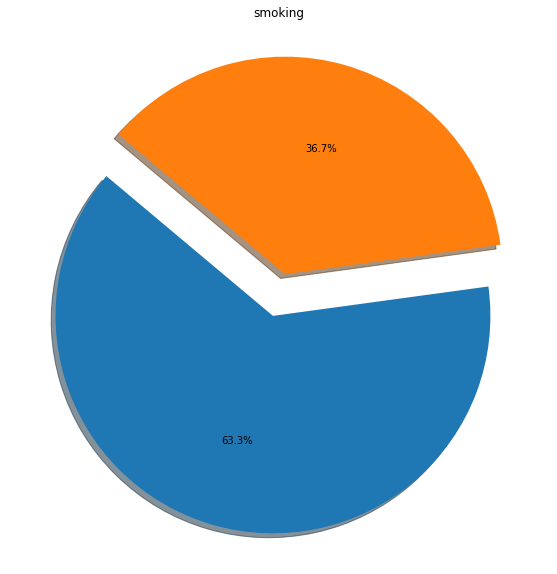

In [15]:
EDA_target(df, target)

## IDV

### IDV Objective

+----+----------+
|    |   gender |
|----+----------|
| M  |    35401 |
| F  |    20291 |
+----+----------+


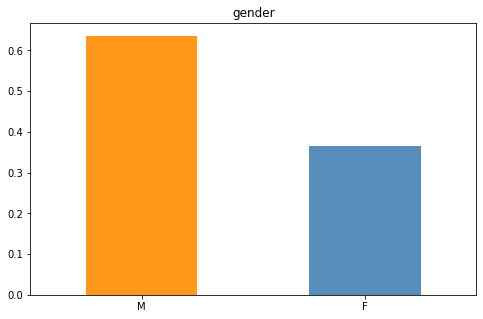

+----+-----------------+
|    |   hearing(left) |
|----+-----------------|
|  1 |           54267 |
|  2 |            1425 |
+----+-----------------+


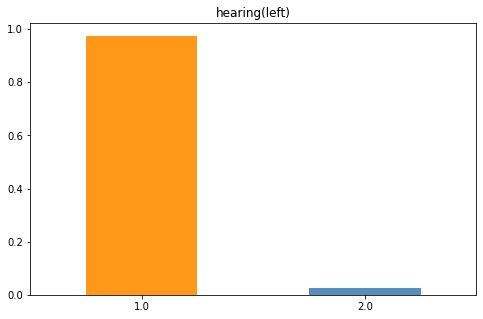

+----+------------------+
|    |   hearing(right) |
|----+------------------|
|  1 |            54236 |
|  2 |             1456 |
+----+------------------+


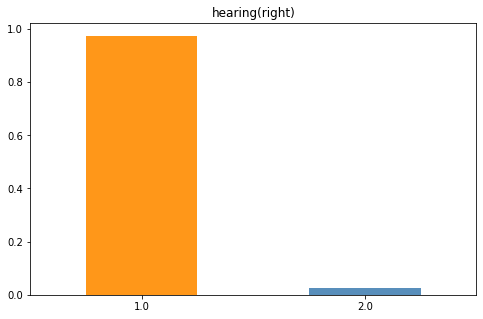

+----+-----------------+
|    |   Urine protein |
|----+-----------------|
|  1 |           52599 |
|  2 |            1795 |
|  3 |             940 |
|  4 |             260 |
|  5 |              88 |
|  6 |              10 |
+----+-----------------+


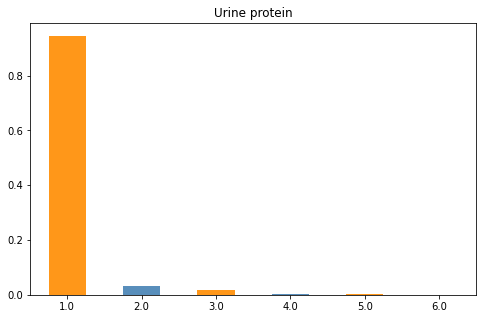

+----+-----------------+
|    |   dental caries |
|----+-----------------|
|  0 |           43811 |
|  1 |           11881 |
+----+-----------------+


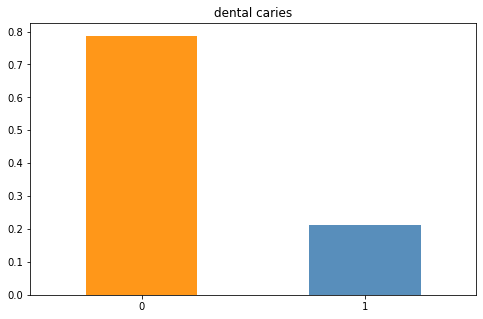

+----+----------+
|    |   tartar |
|----+----------|
| Y  |    30940 |
| N  |    24752 |
+----+----------+


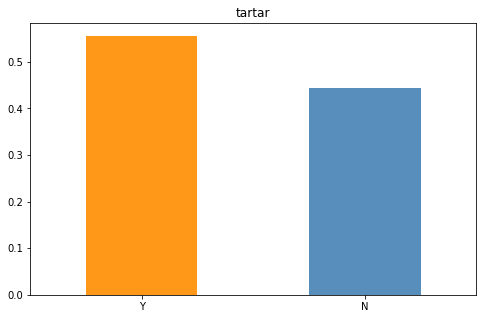

In [16]:
obj_EDA(df, Objcols)

### IDV Objective With DV

In [17]:
EDA_obj(df, Objcols, target)

Variable Name:  gender


Variable Name:  hearing(left)


Variable Name:  hearing(right)


Variable Name:  Urine protein


Variable Name:  dental caries


Variable Name:  tartar


### IDV Numrical

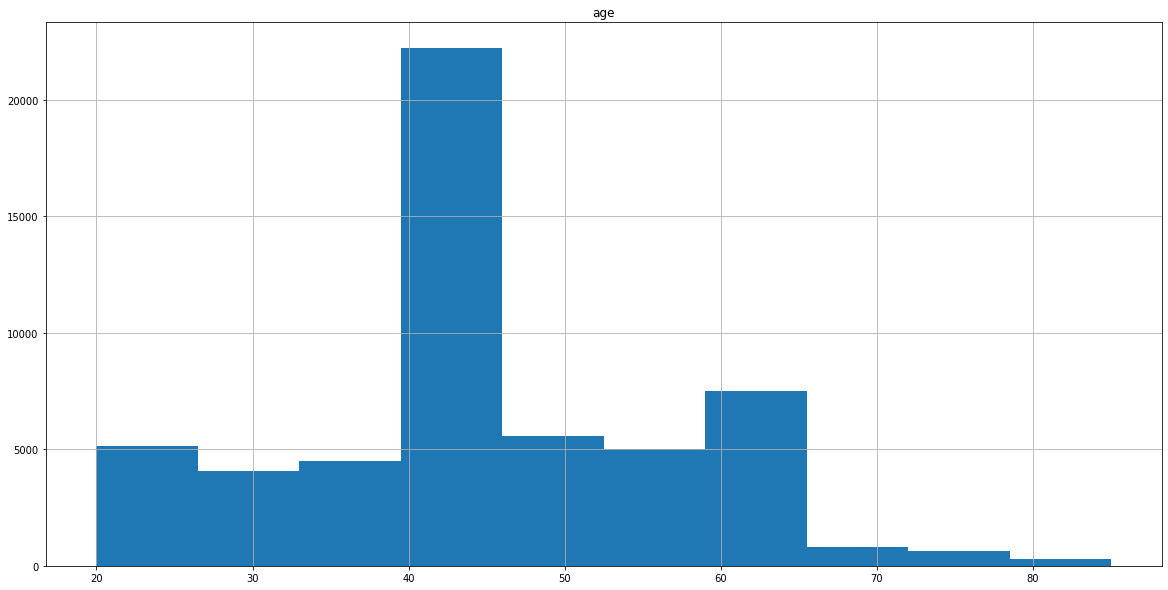

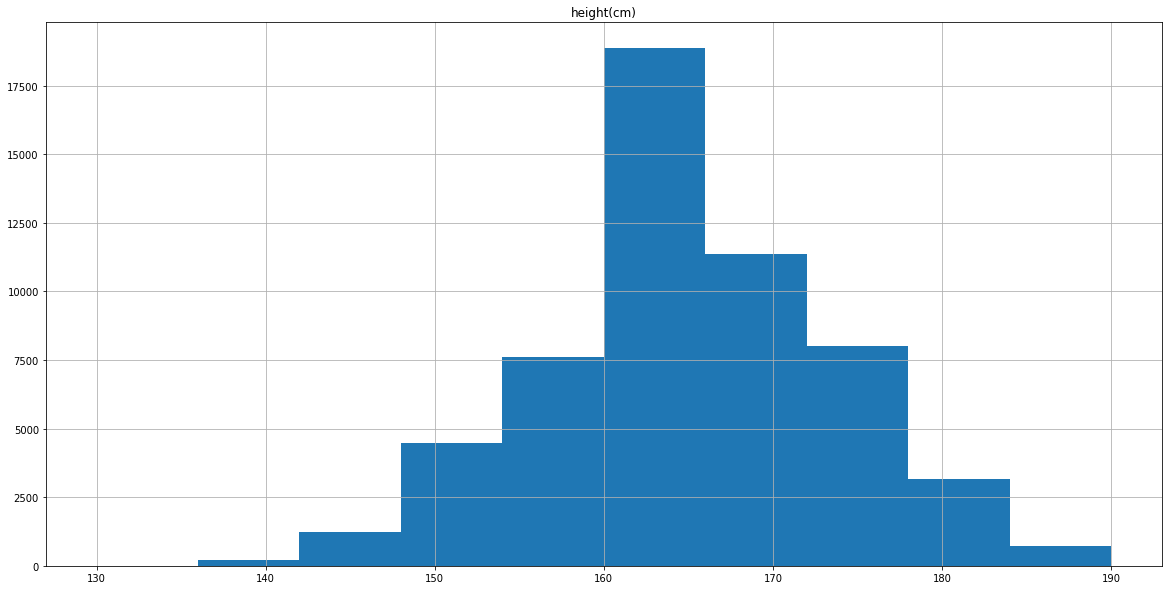

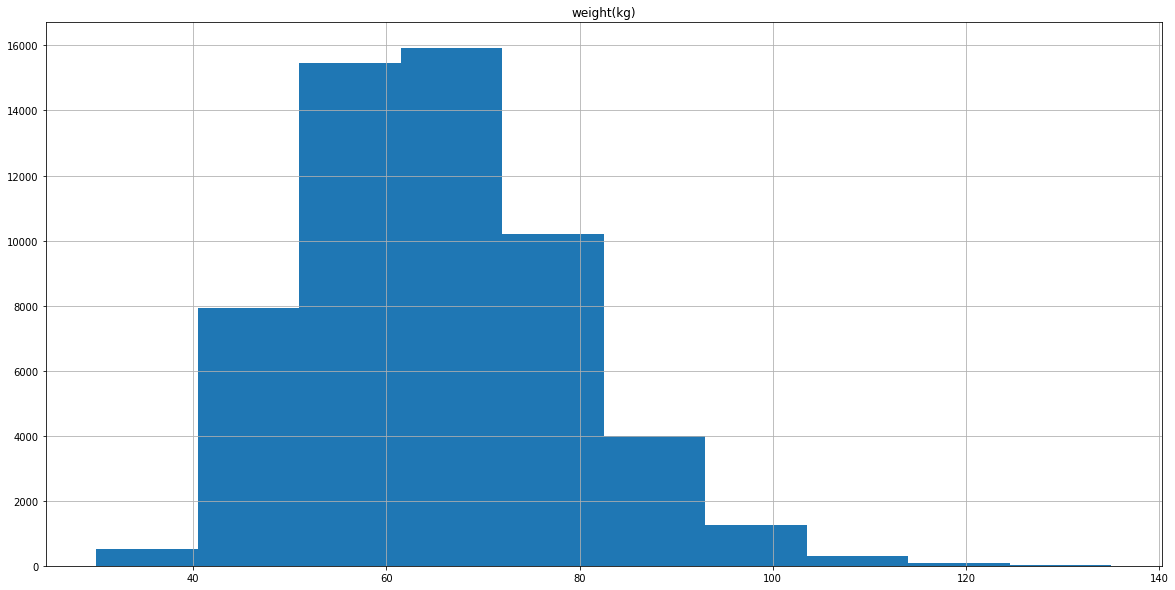

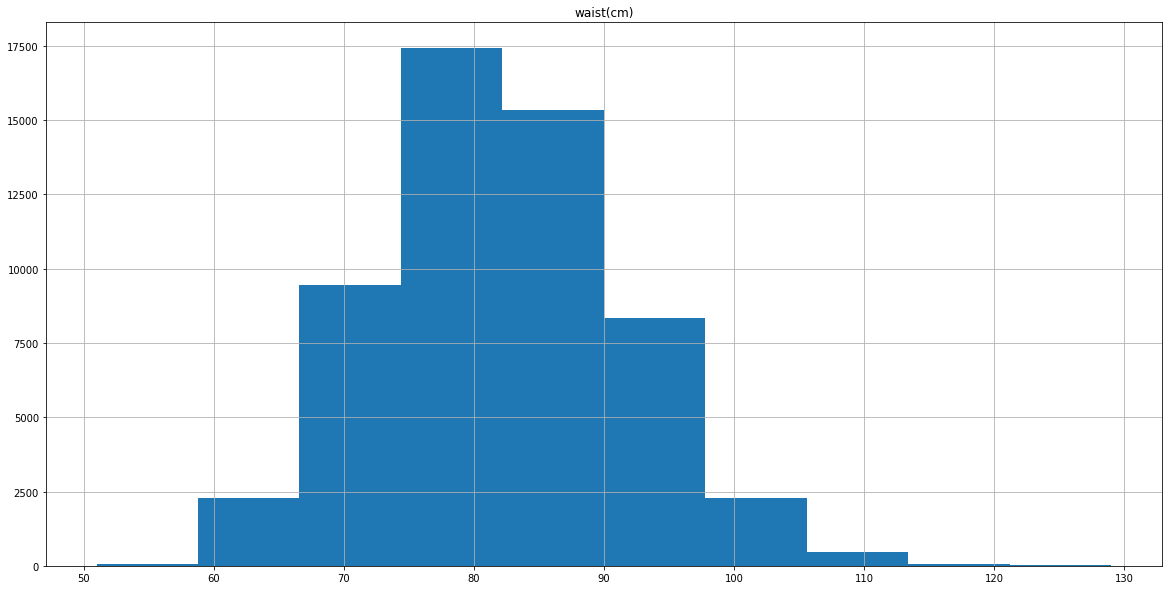

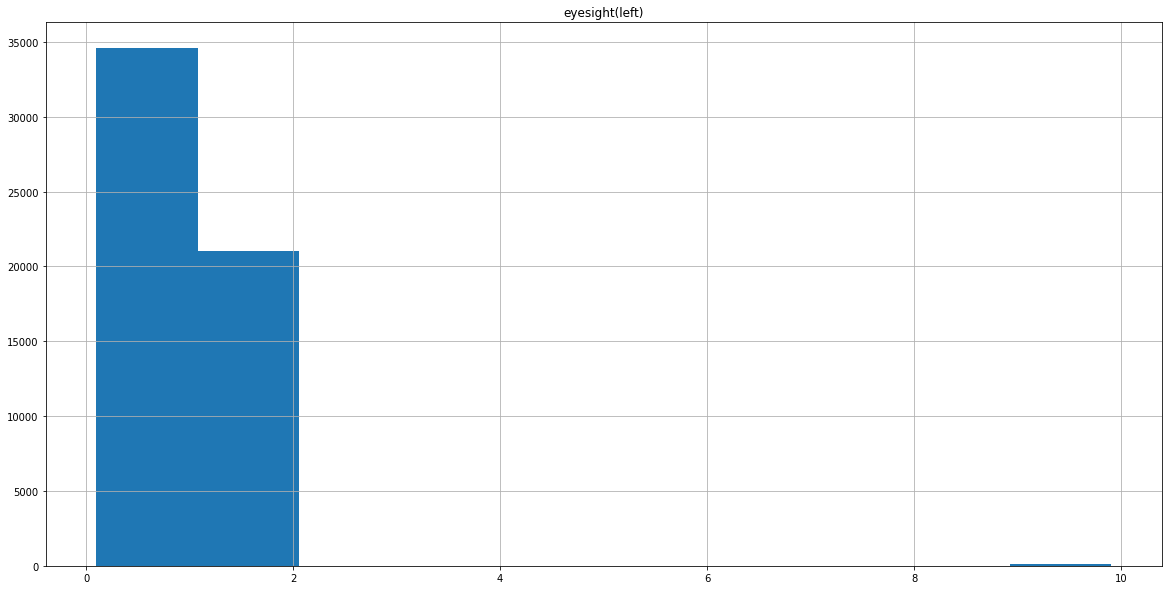

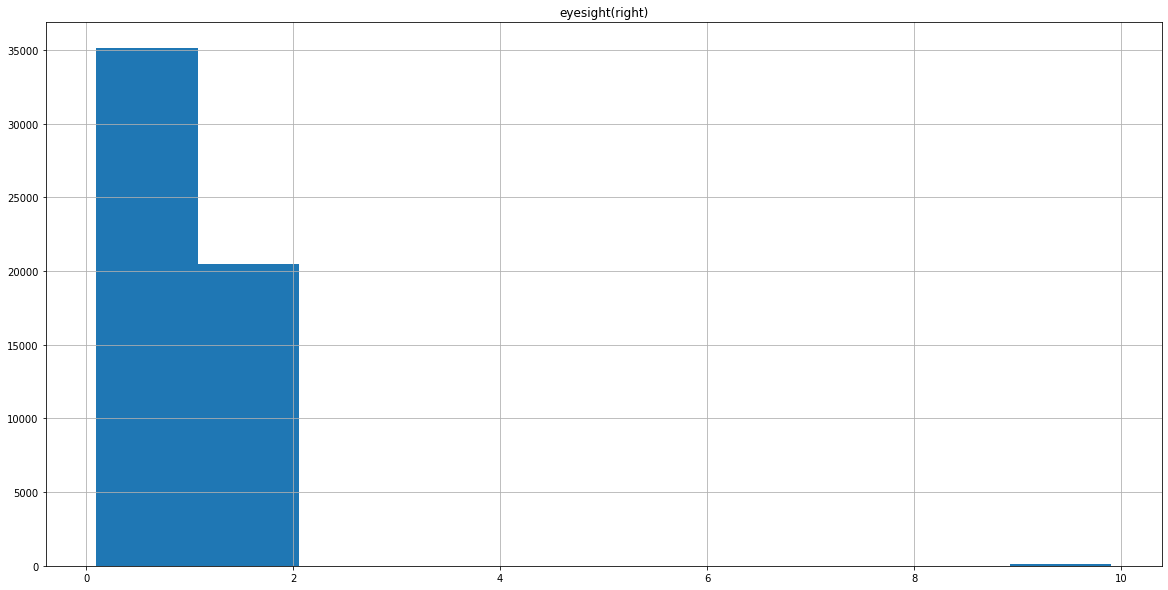

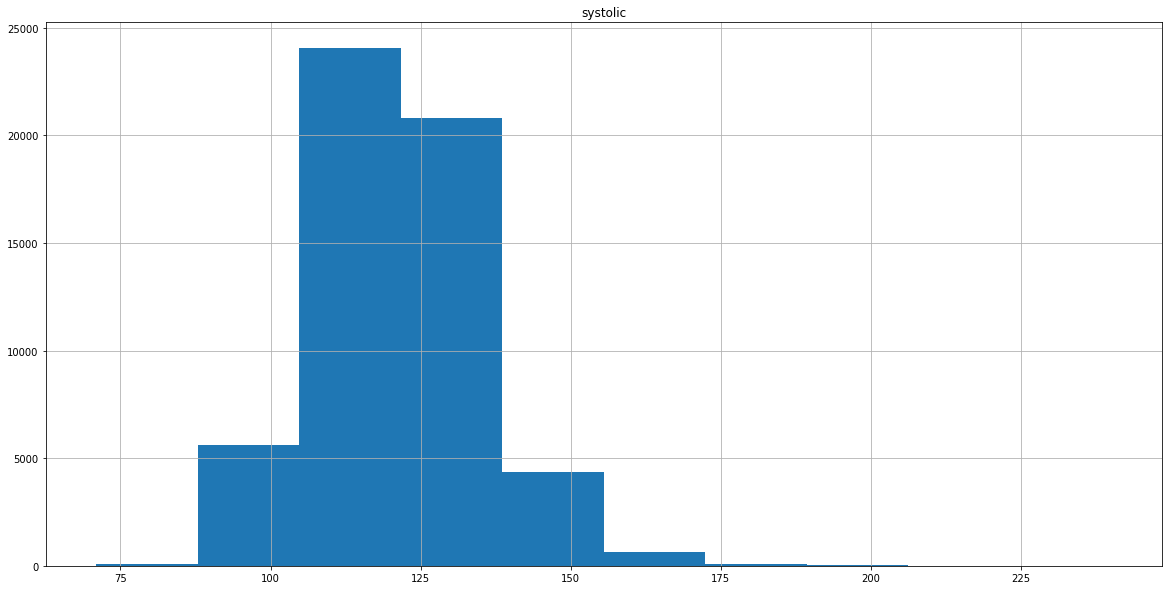

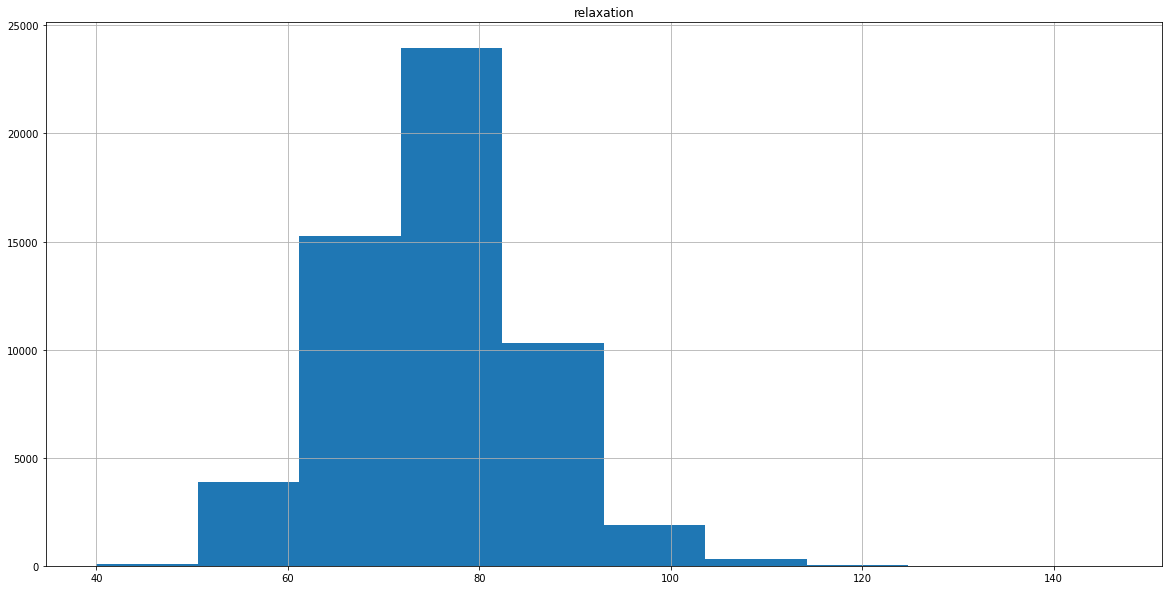

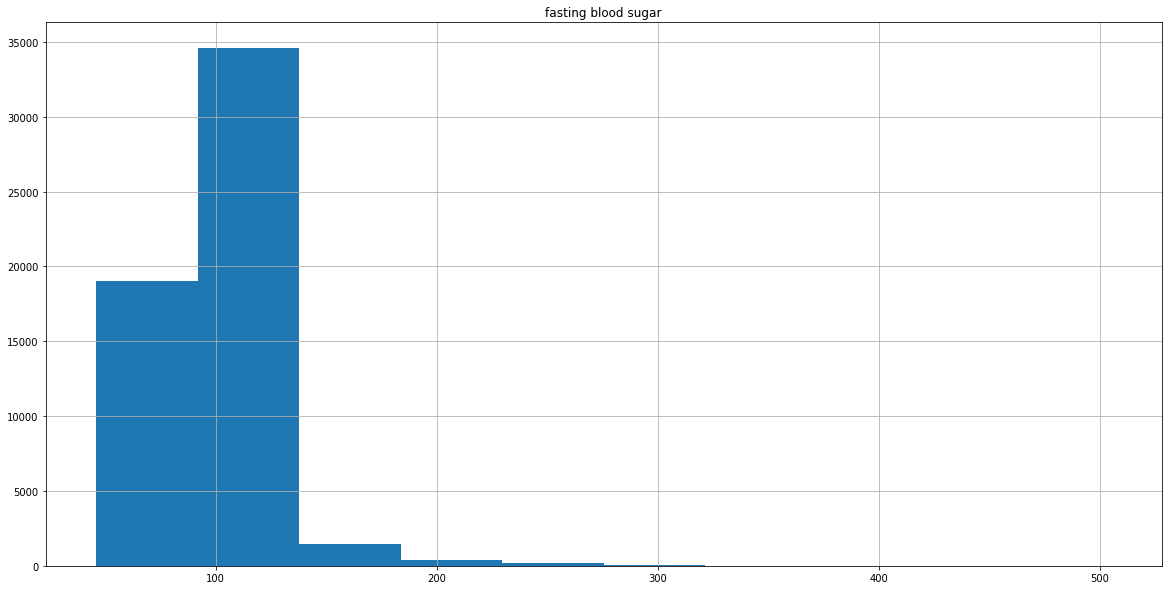

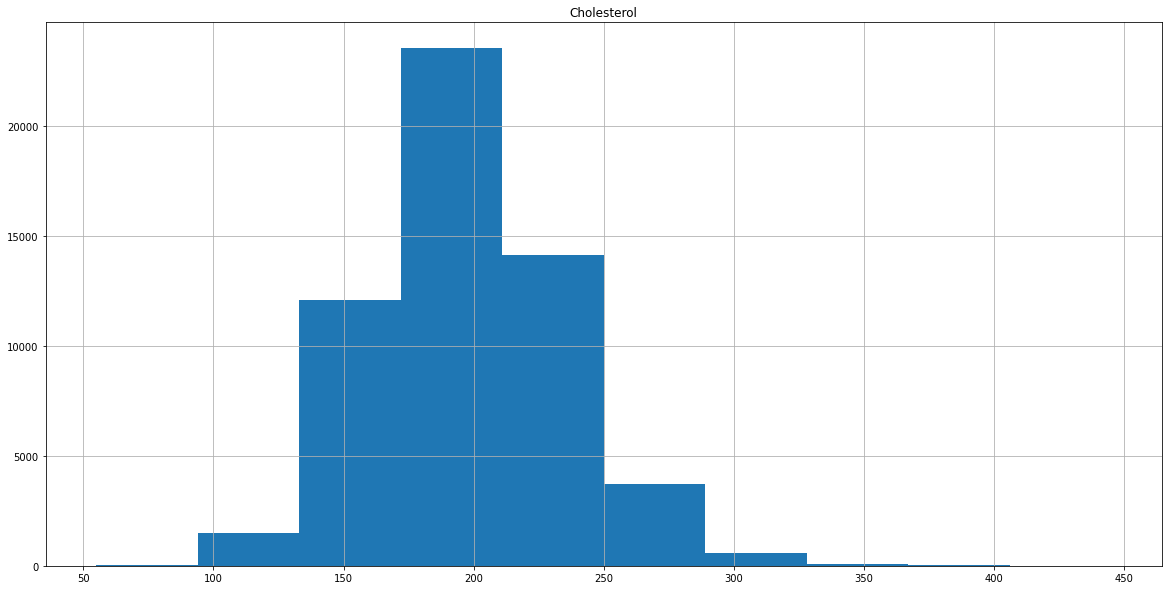

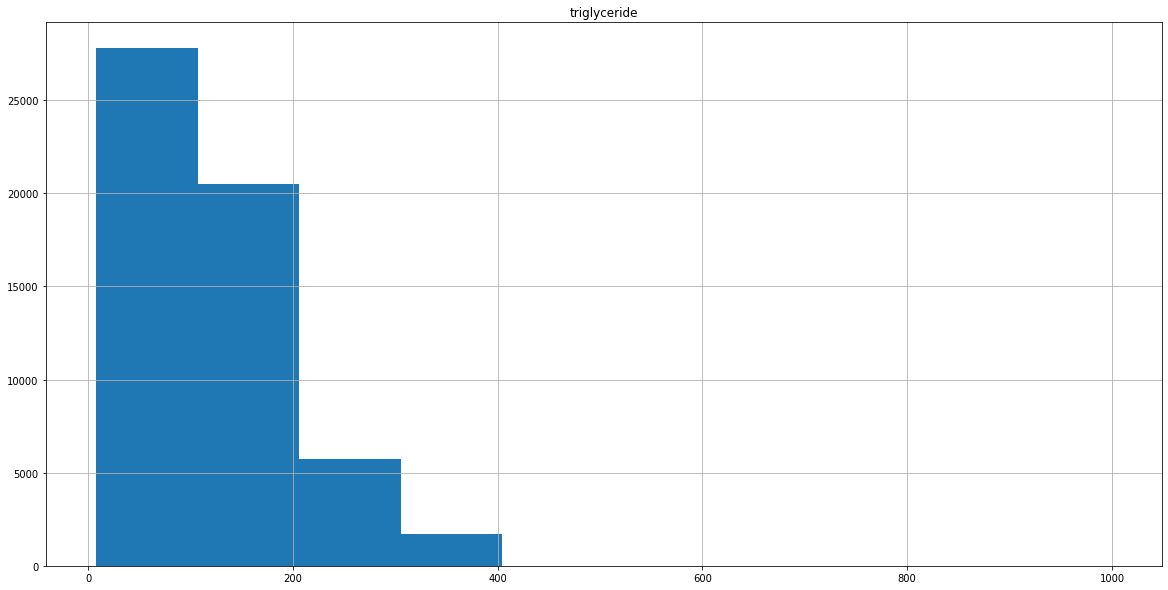

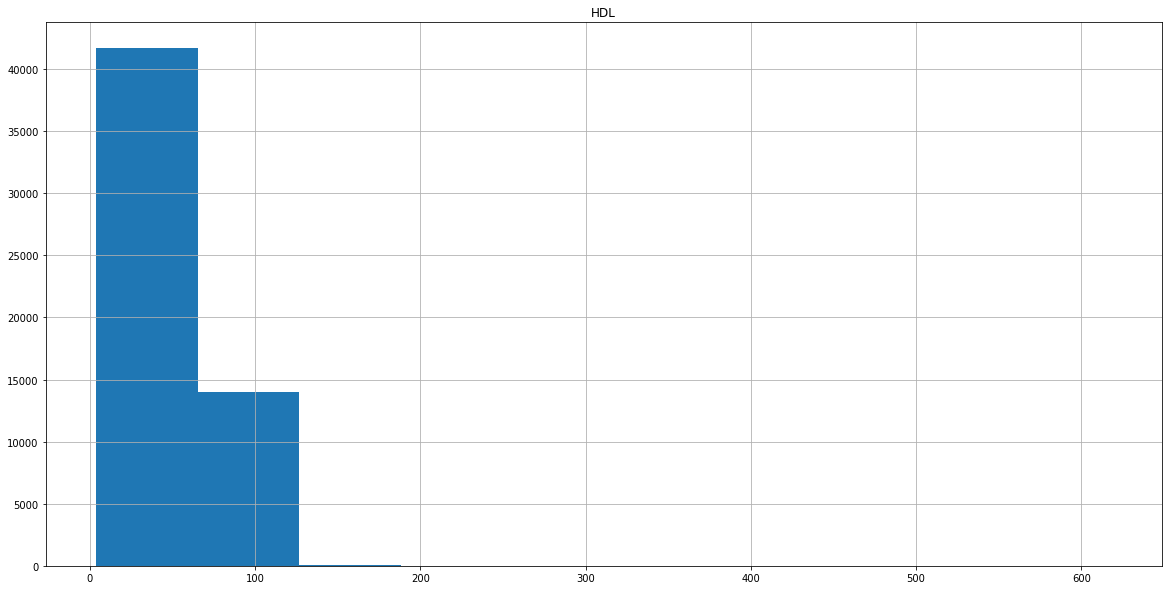

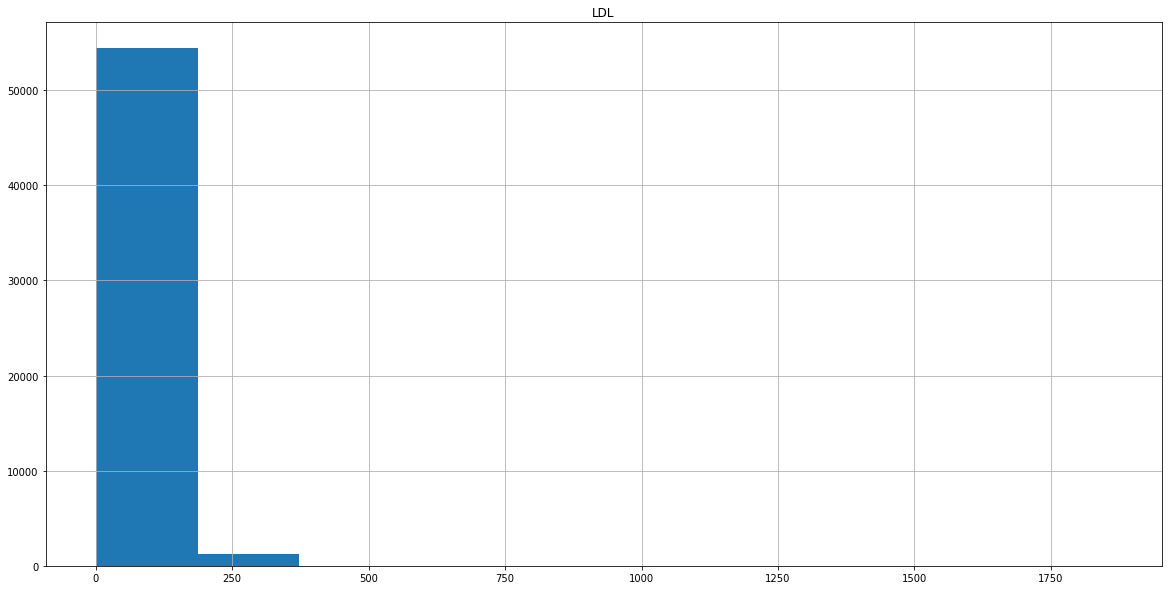

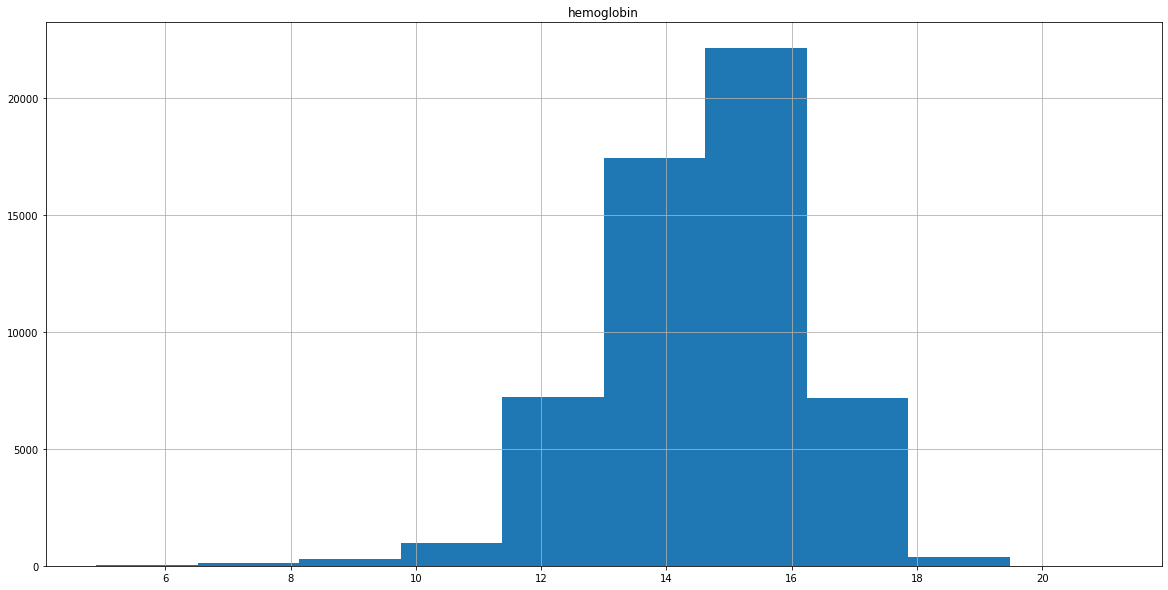

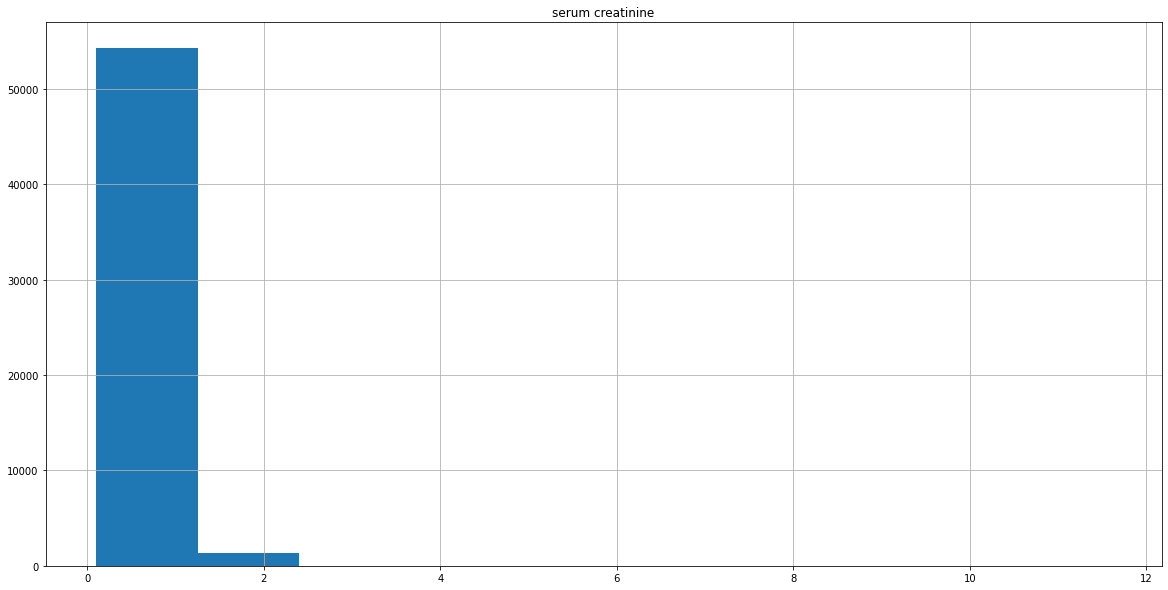

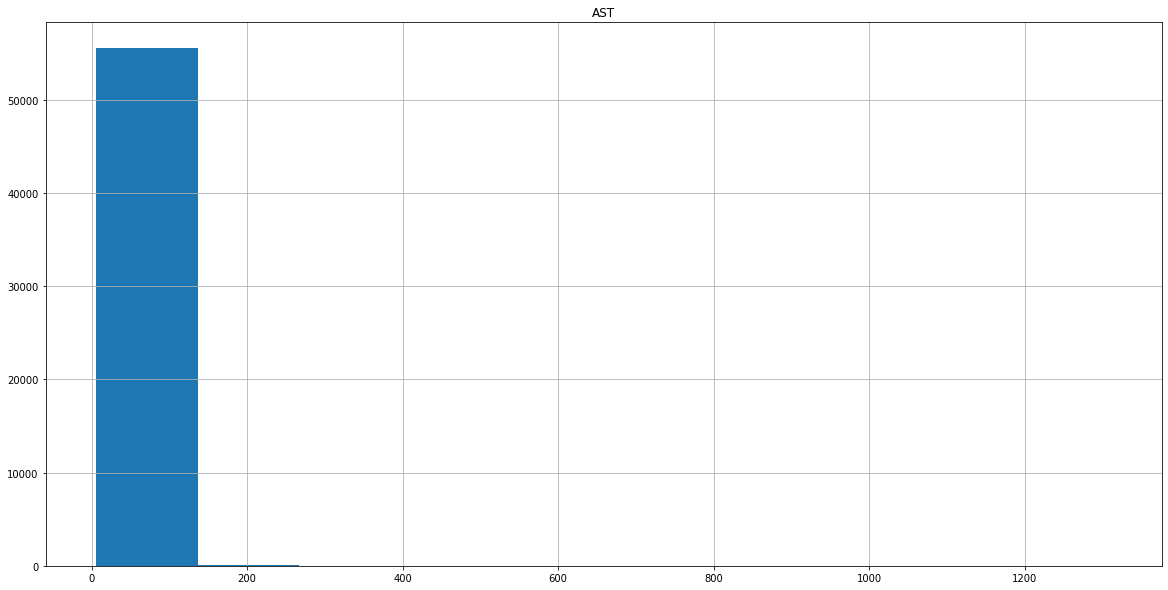

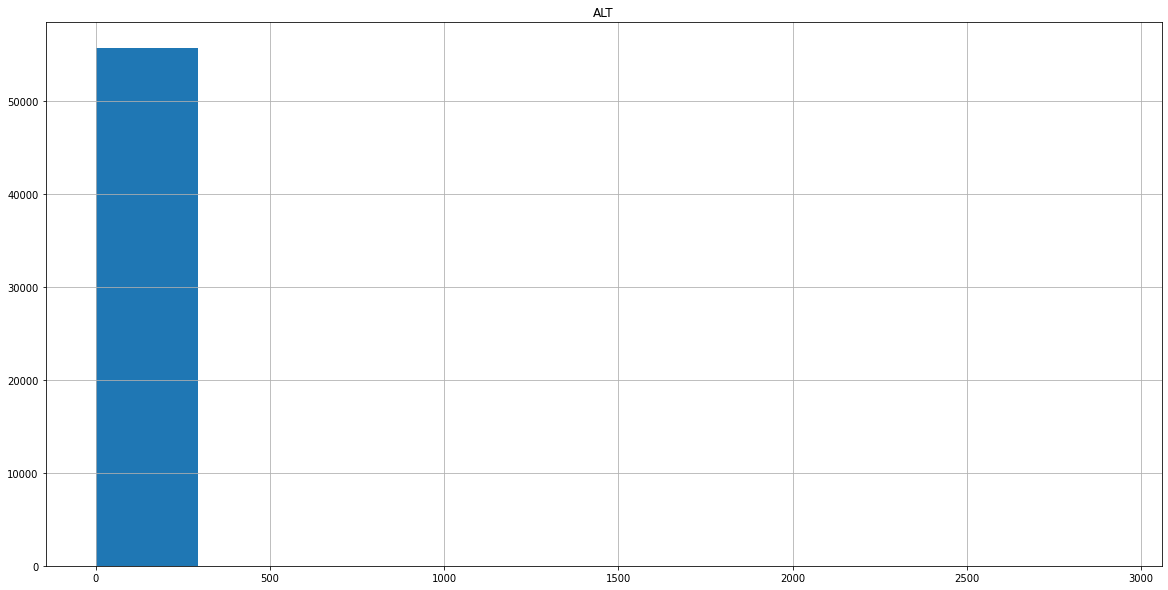

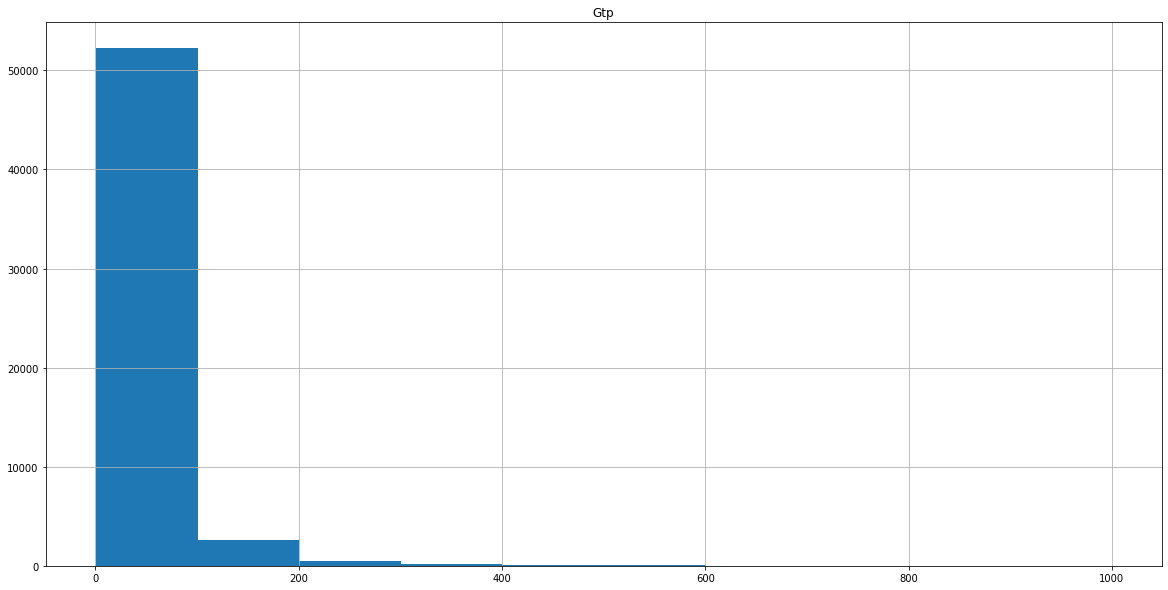

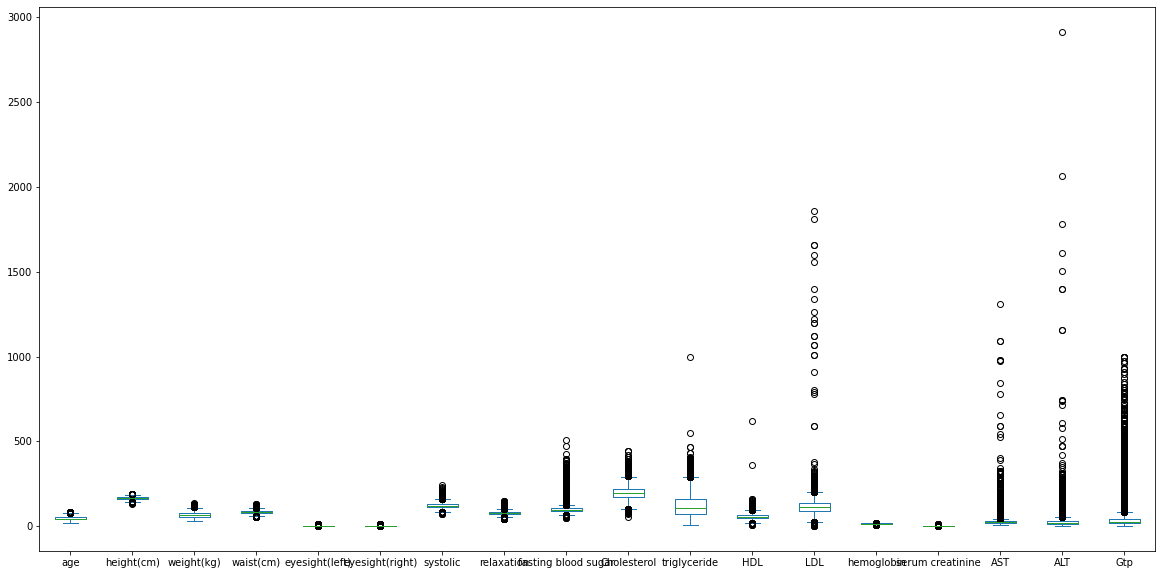

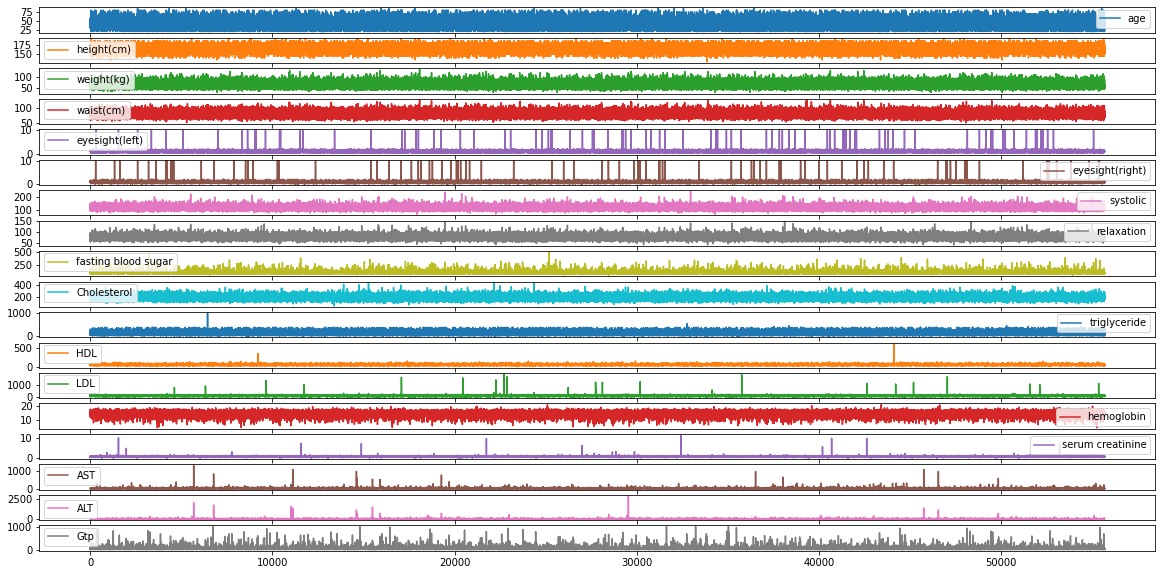

In [18]:
EDA_num(df, NUMcols)

### IDV Objective With DV

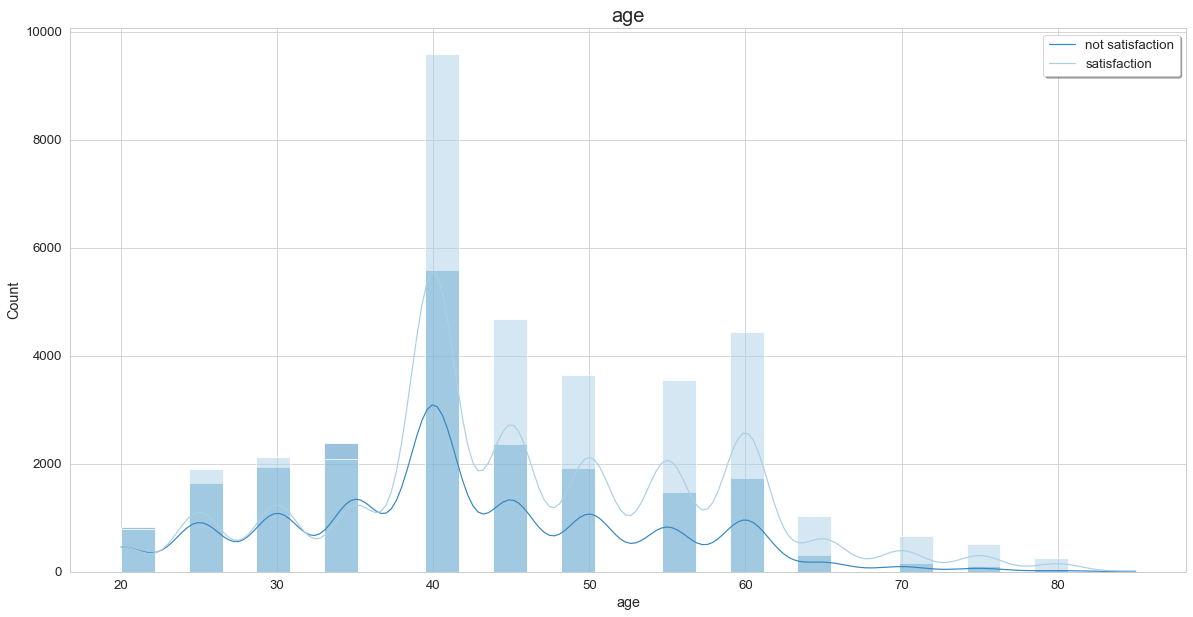

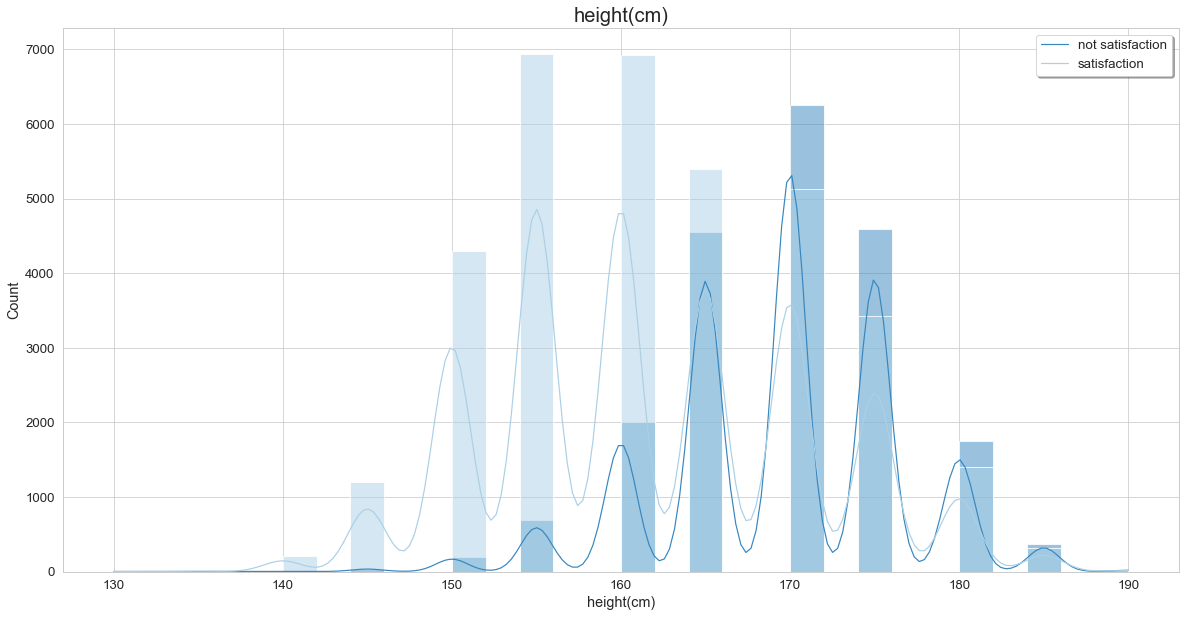

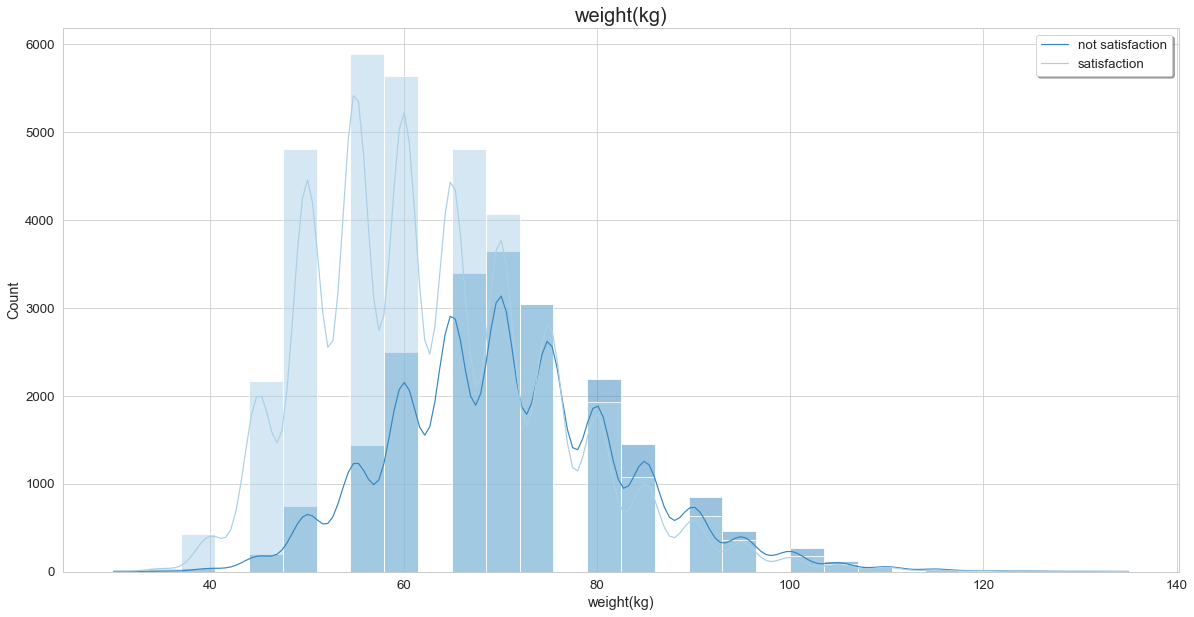

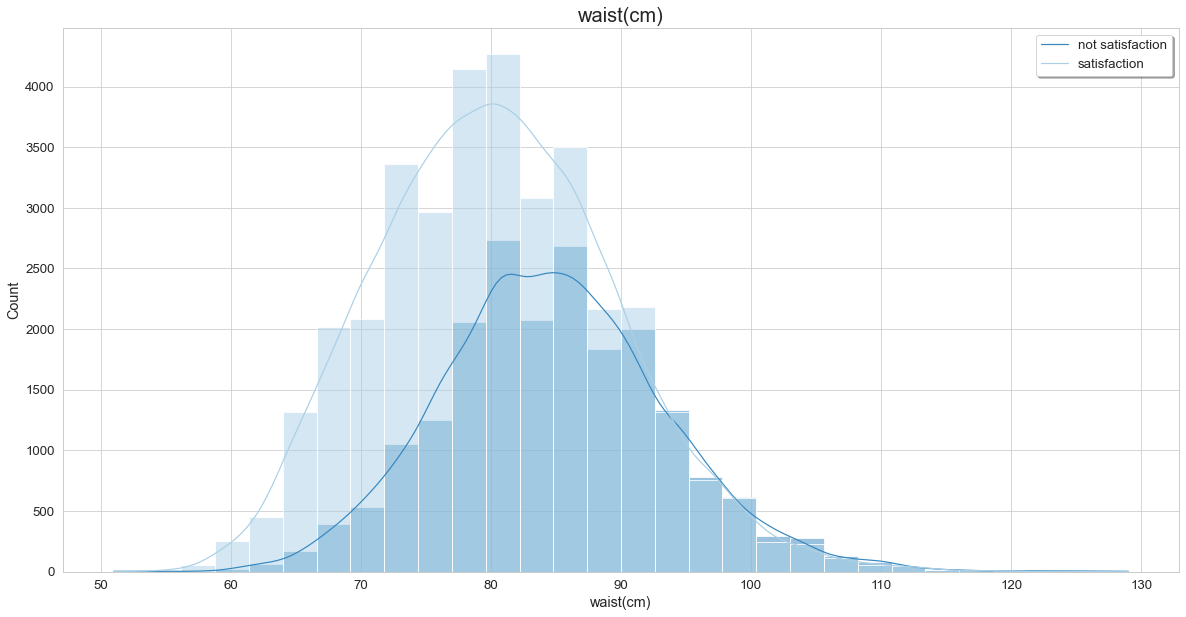

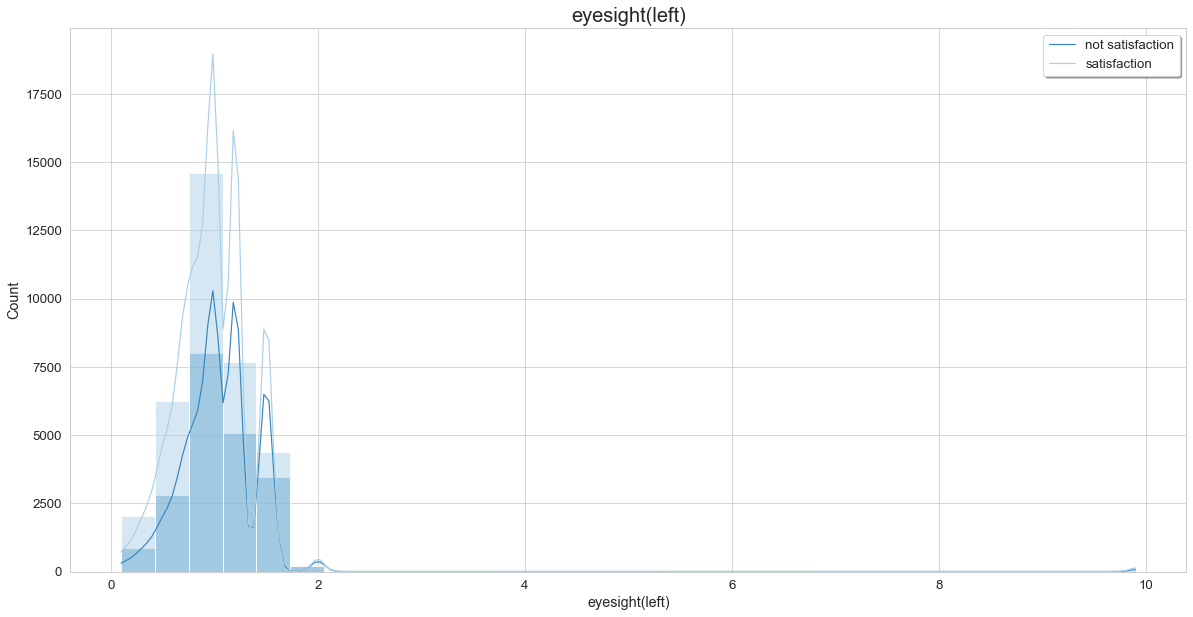

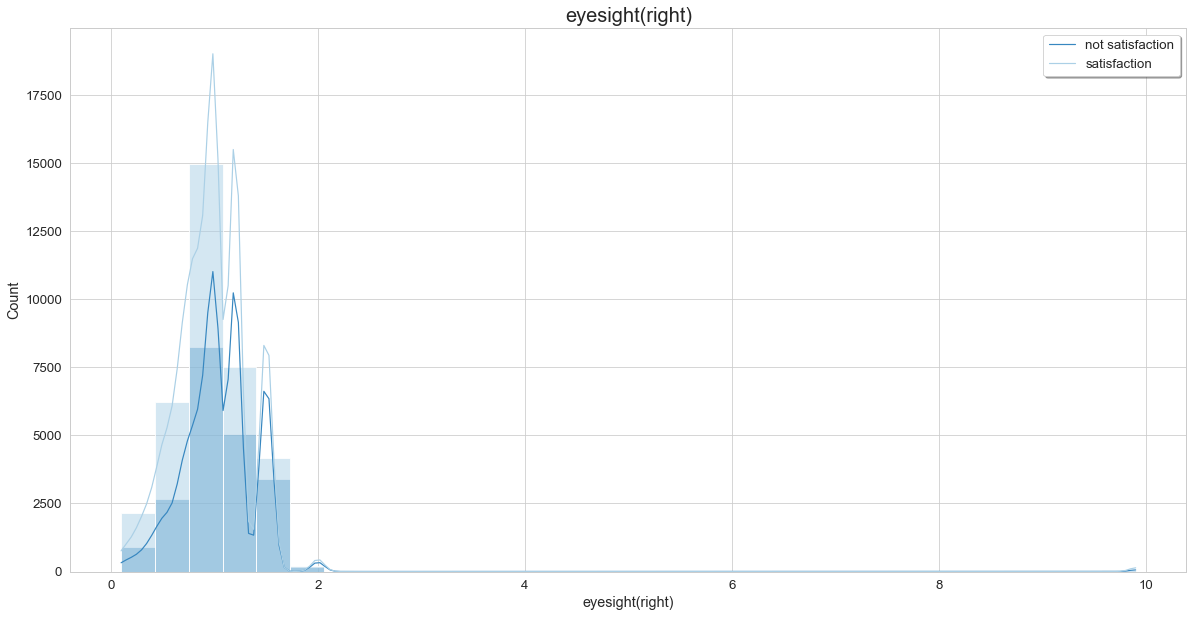

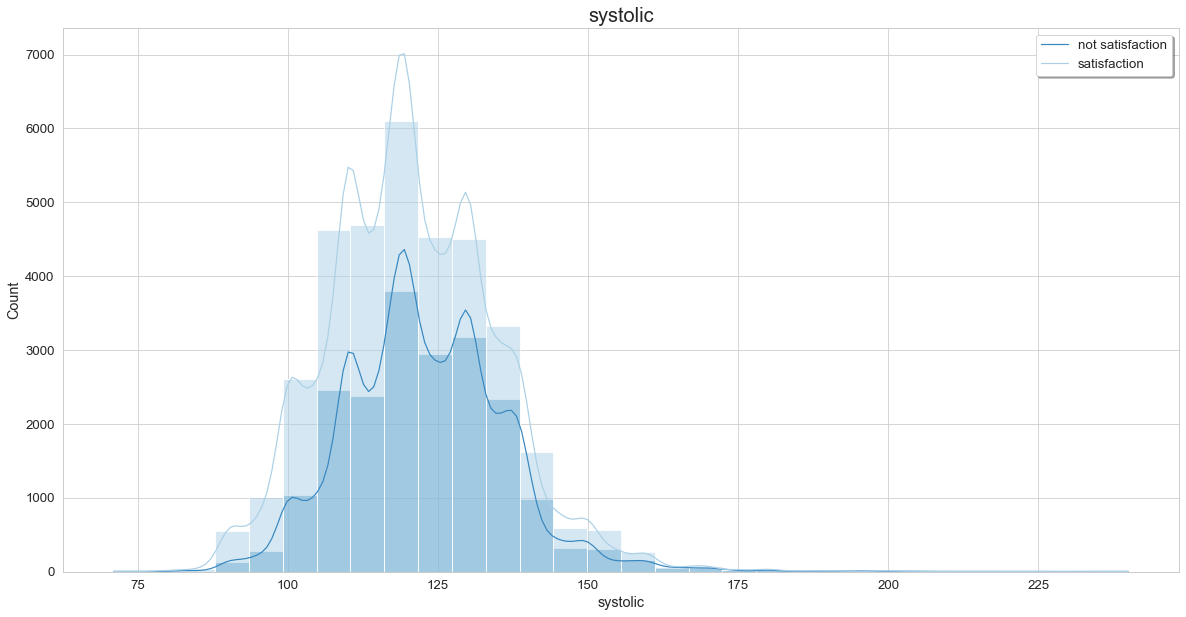

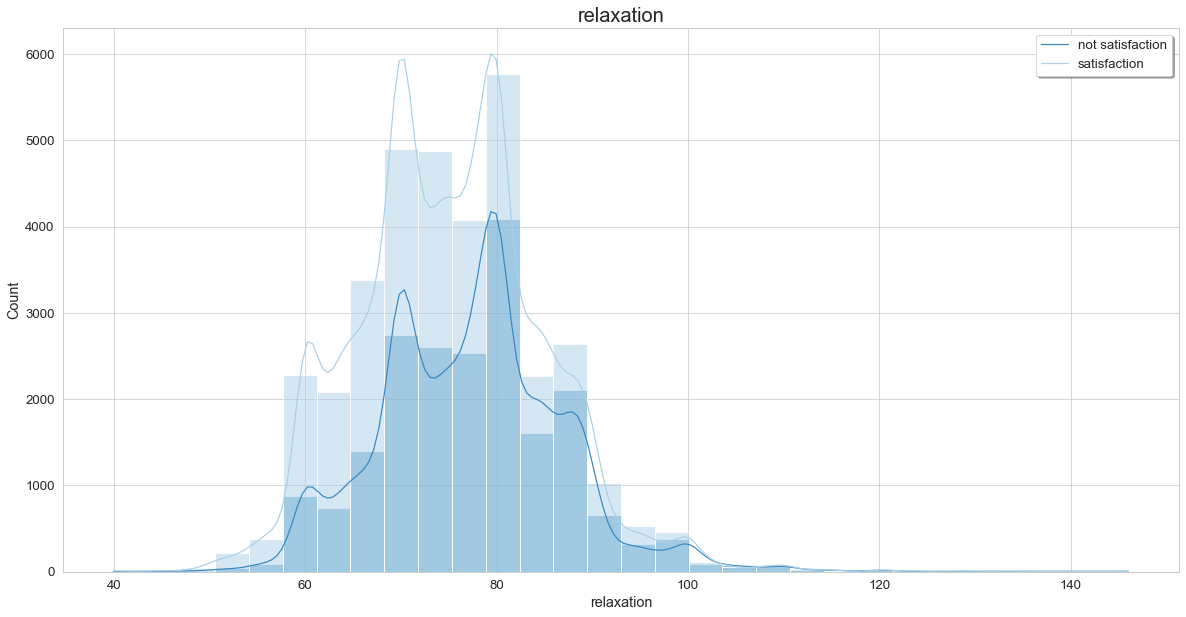

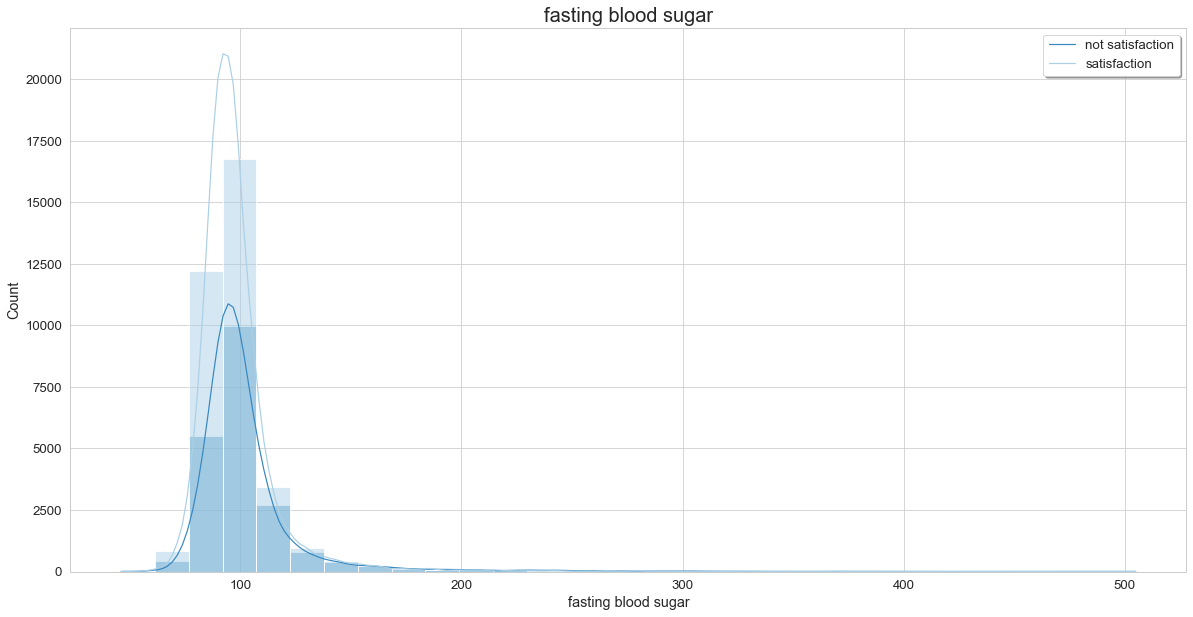

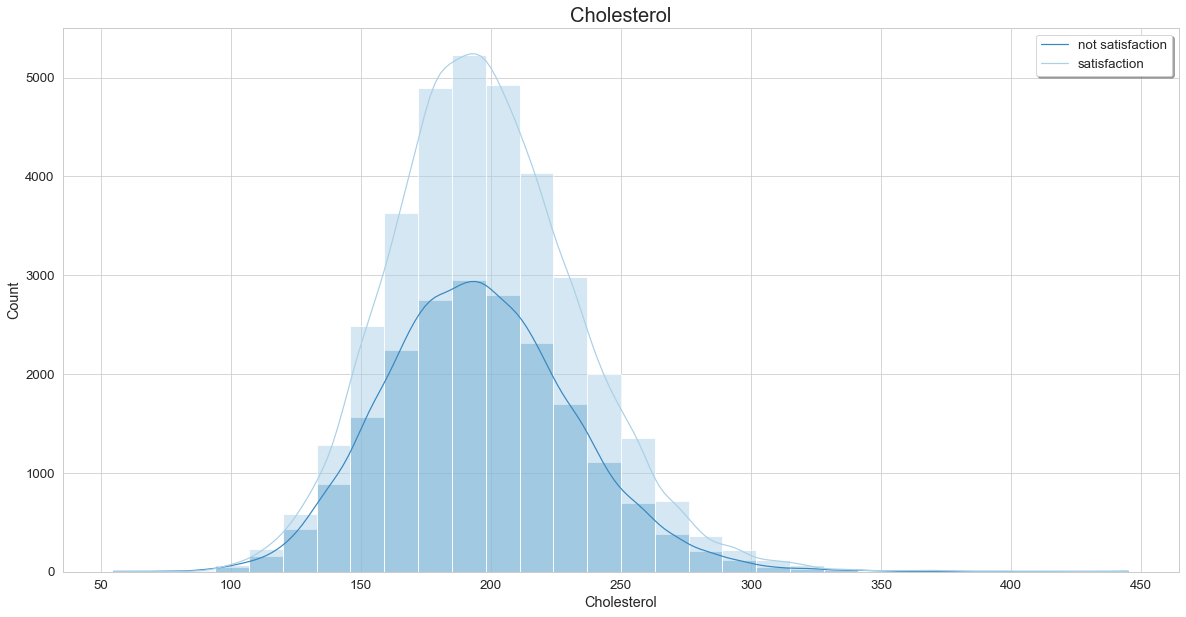

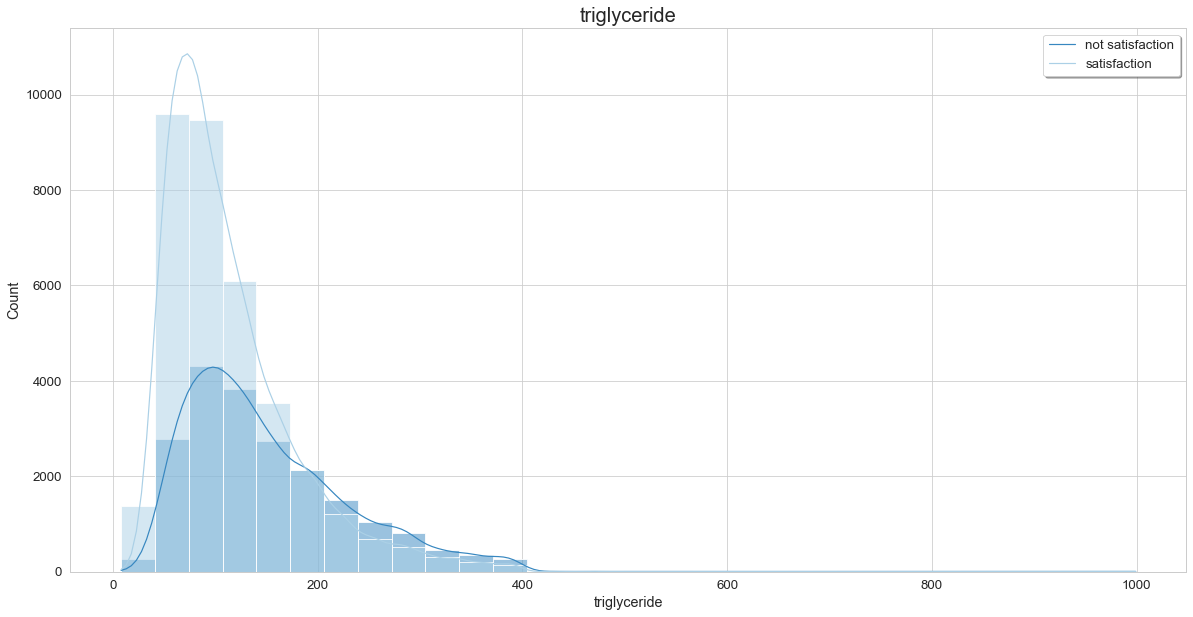

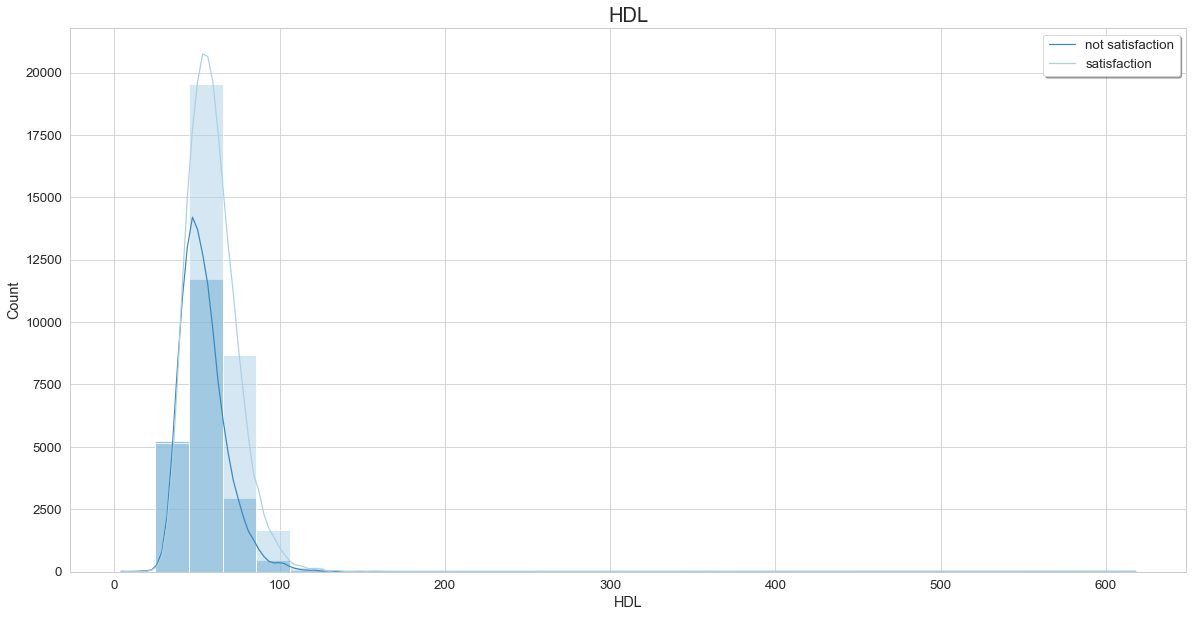

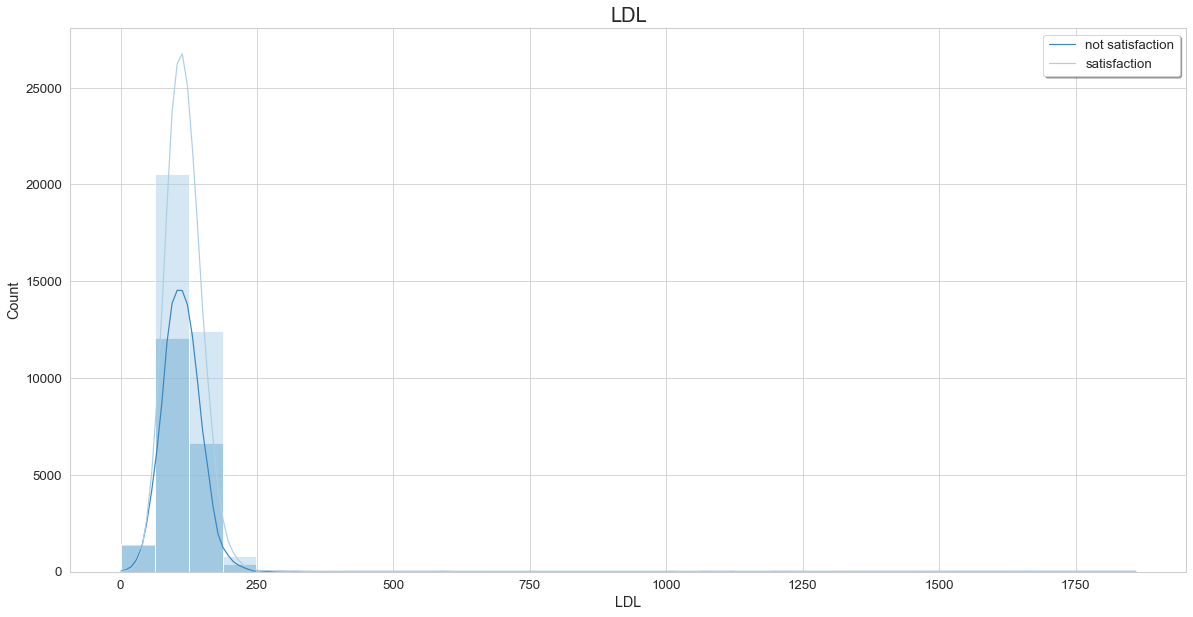

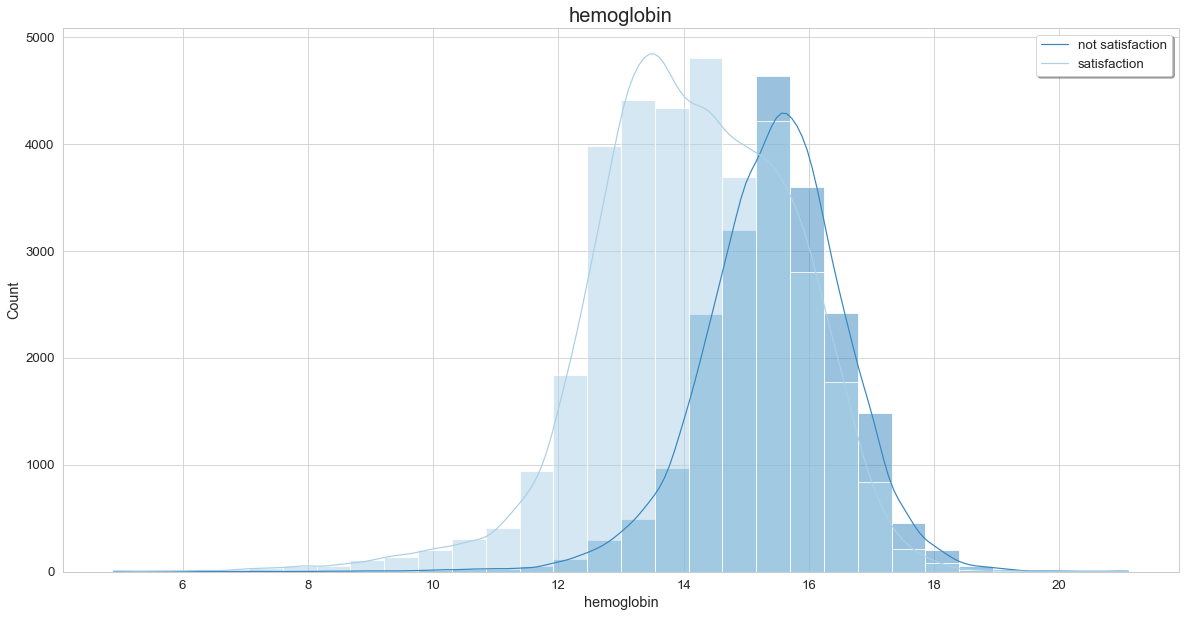

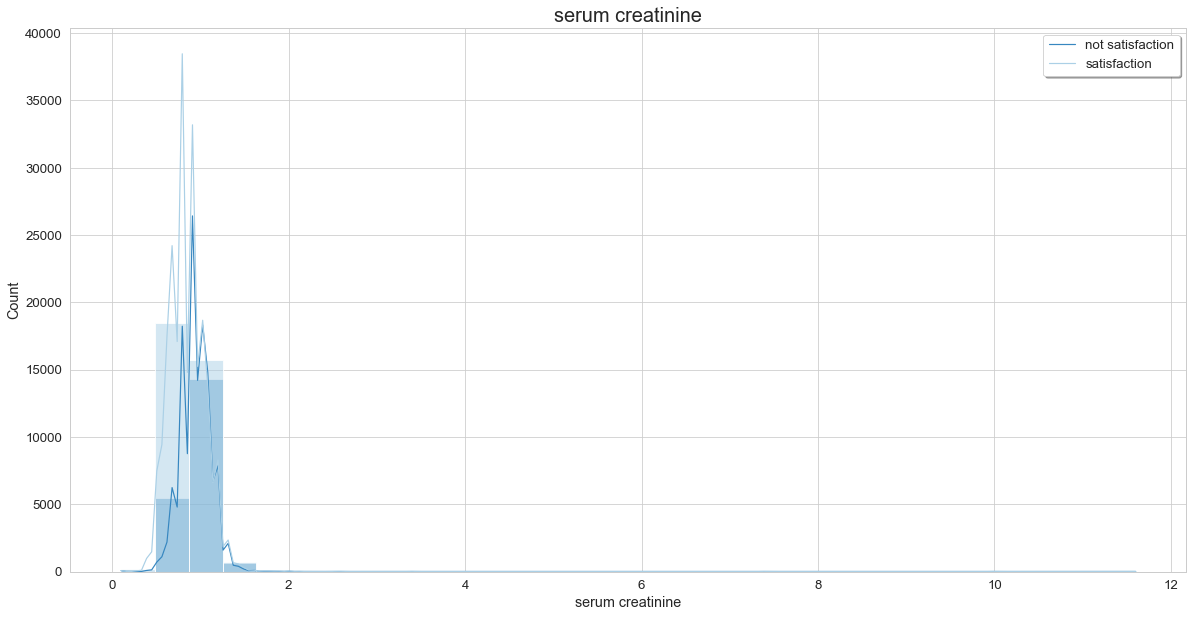

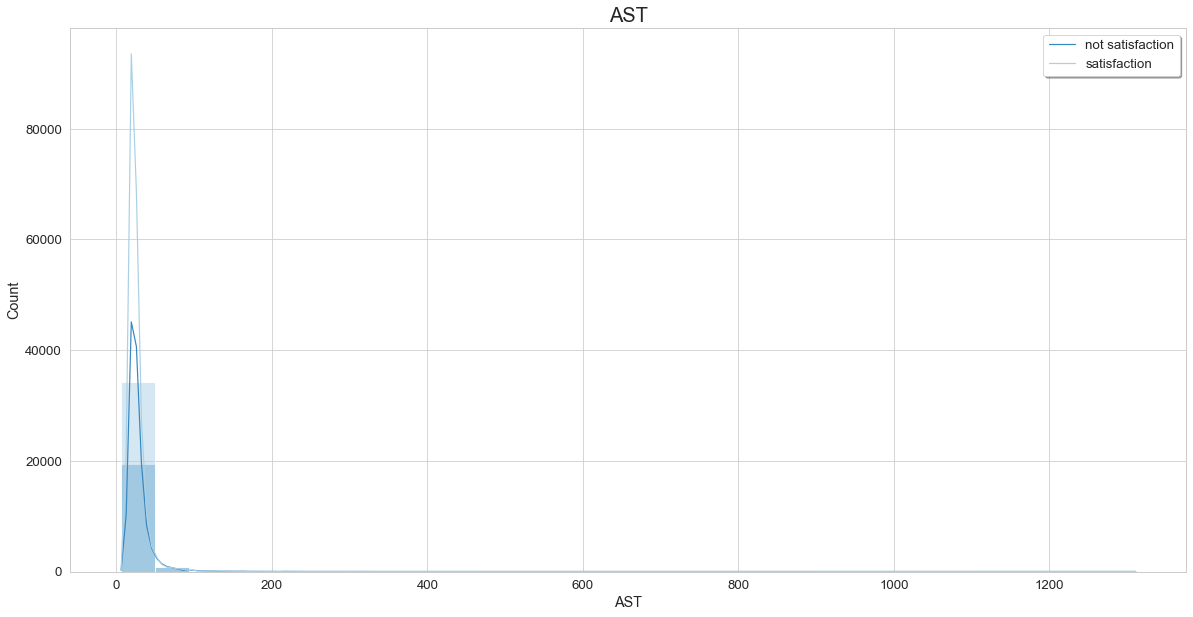

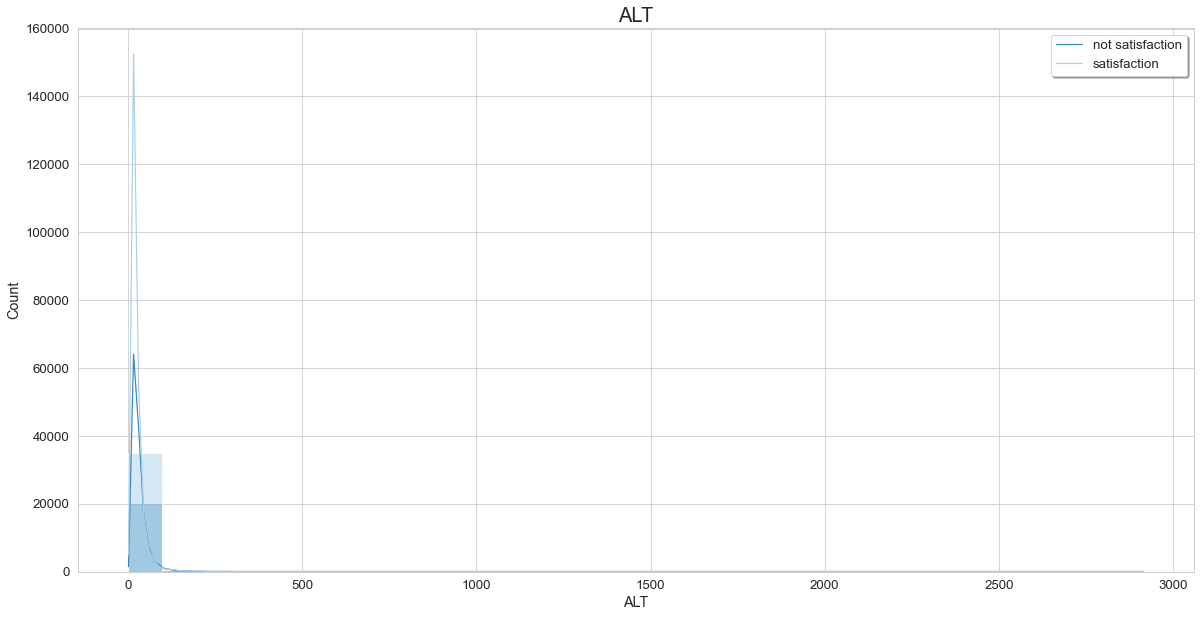

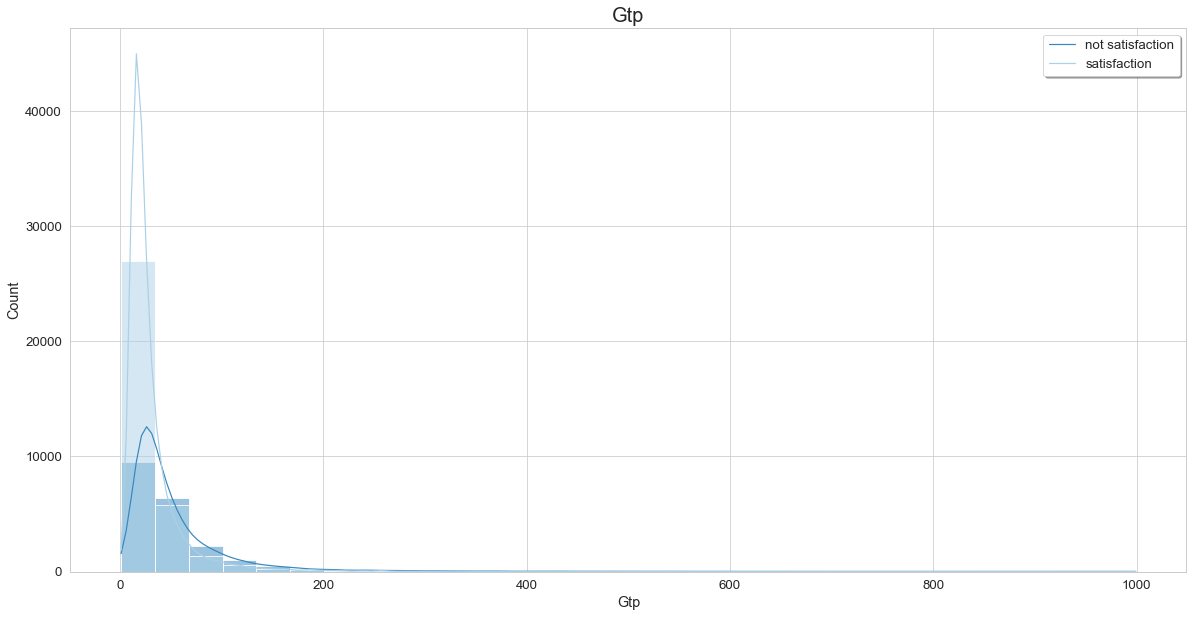

In [19]:
EDA_num_with_DV(df, NUMcols)

# 08. Data Transformation

In [20]:
# StandardScaler
df = NumStandardScaler(df)


Standardization Applied On: age

Standardization Applied On: height(cm)

Standardization Applied On: weight(kg)

Standardization Applied On: waist(cm)

Standardization Applied On: eyesight(left)

Standardization Applied On: eyesight(right)

Standardization Applied On: systolic

Standardization Applied On: relaxation

Standardization Applied On: fasting blood sugar

Standardization Applied On: Cholesterol

Standardization Applied On: triglyceride

Standardization Applied On: HDL

Standardization Applied On: LDL

Standardization Applied On: hemoglobin

Standardization Applied On: serum creatinine

Standardization Applied On: AST

Standardization Applied On: ALT

Standardization Applied On: Gtp


In [21]:
pd.DataFrame(df.head())

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,-0.347,-1.049,-0.457,-0.080,0.385,-0.015,1.0,1.0,-0.548,-0.310,-0.255,0.499,-0.623,1.066,0.270,-1.101,1.0,-0.838,-0.423,-0.260,-0.258,0,Y,0
1,F,-0.347,-0.506,-0.457,-0.113,-0.437,-0.838,1.0,1.0,-0.182,-0.620,1.476,-0.135,-0.163,-1.037,0.294,-1.229,1.0,-1.290,-0.216,-0.260,-0.437,0,Y,0
2,M,0.896,0.582,-0.457,-0.221,-0.437,-0.427,1.0,1.0,1.207,1.033,-0.496,1.242,0.772,-0.155,0.881,0.753,1.0,0.516,-0.268,-0.357,-0.357,0,N,1
3,M,-0.347,0.038,0.323,0.642,1.001,1.014,1.0,1.0,-1.572,-1.654,-0.159,3.446,1.777,-0.834,2.713,0.049,1.0,0.516,-0.371,-0.033,-0.437,0,Y,0
4,F,-0.347,-1.049,-0.457,0.426,-0.026,-0.015,1.0,1.0,-0.109,-0.207,-0.929,-0.355,-0.735,0.320,-0.195,-1.357,1.0,-1.290,-0.526,-0.421,-0.357,0,N,0


# 09. Feature Selection

## Wrapper "Forward", "Backward" 

In [22]:
df, fs = Feature_selection_forward(df, target)

All the Num Variables: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'smoking']

All the obj Variables: ['gender', 'hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries', 'tartar', 'smoking']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   24.0s finished

[2022-06-23 22:19:00] Features: 1/18 -- score: 0.6872038808514326[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   36.6s finished

[2022-06-23 22:19:37] Features: 2/18 -- score: 0.7030950208326485[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  1.1min finished

[2022-06-23 22:20:42] Features: 3/18 -- score: 0.7577042964212379[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Most Variables Can Effect The Target Variables:
 ('age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp')

With Highest Score:
 0.8101586873359589
All the Num Variables Selected: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s finished

[2022-06-23 22:30:36] Features: 18/18 -- score: 0.8087670102438367

In [23]:
pd.DataFrame(fs)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(13,)","[0.6908315565031983, 0.6950959488272921, 0.6811805633486702, 0.6830527497194164, 0.6858585858585858]",0.687,"(hemoglobin,)",0.007,0.005,0.003
2,"(13, 17)","[0.7028391875210415, 0.7097968802603524, 0.70418583772865, 0.6960718294051628, 0.7025813692480359]",0.703,"(hemoglobin, Gtp)",0.006,0.004,0.002
3,"(9, 13, 17)","[0.758388508584895, 0.7610818090001122, 0.7541241162608012, 0.7574635241301908, 0.7574635241301908]",0.758,"(Cholesterol, hemoglobin, Gtp)",0.003,0.002,0.001
4,"(9, 13, 15, 17)","[0.7715183481090787, 0.7733138817192234, 0.769835035349568, 0.7768799102132435, 0.7778900112233446]",0.774,"(Cholesterol, hemoglobin, AST, Gtp)",0.004,0.003,0.002
5,"(9, 10, 13, 15, 17)","[0.7787004825496577, 0.7916058803725732, 0.7847604084838963, 0.7820426487093154, 0.788327721661055]",0.785,"(Cholesterol, triglyceride, hemoglobin, AST, Gtp)",0.006,0.005,0.002
6,"(0, 9, 10, 13, 15, 17)","[0.7922792054763775, 0.7945236224890585, 0.7920547637751094, 0.786307519640853, 0.7913580246913581]",0.791,"(age, Cholesterol, triglyceride, hemoglobin, AST, Gtp)",0.003,0.003,0.001
7,"(0, 1, 9, 10, 13, 15, 17)","[0.7990124565144204, 0.7997980024688587, 0.8074290203119739, 0.795398428731762, 0.8003367003367003]",0.800,"(age, height(cm), Cholesterol, triglyceride, hemoglobin, AST, Gtp)",0.005,0.004,0.002
8,"(0, 1, 3, 9, 10, 13, 15, 17)","[0.7993491190663226, 0.8057457075524632, 0.8026035237347099, 0.802020202020202, 0.8065095398428732]",0.803,"(age, height(cm), waist(cm), Cholesterol, triglyceride, hemoglobin, AST, Gtp)",0.003,0.003,0.001
9,"(0, 1, 3, 9, 10, 13, 14, 15, 17)","[0.8012568735271013, 0.8063068118056335, 0.8064190326562676, 0.7983164983164983, 0.8124579124579124]",0.805,"(age, height(cm), waist(cm), Cholesterol, triglyceride, hemoglobin, serum creatinine, AST, Gtp)",0.006,0.005,0.002
10,"(0, 1, 3, 9, 10, 12, 13, 14, 15, 17)","[0.8047357198967569, 0.8111323083828975, 0.8085512288183144, 0.7983164983164983, 0.8074074074074075]",0.806,"(age, height(cm), waist(cm), Cholesterol, triglyceride, LDL, hemoglobin, serum creatinine, AST, Gtp)",0.006,0.004,0.002


In [24]:
pd.DataFrame(df.head())

,age,height(cm),weight(kg),waist(cm),eyesight(left),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,gender,hearing(left),hearing(right),Urine protein,dental caries,tartar,smoking
0,-0.347,-1.049,-0.457,-0.080,0.385,-0.548,-0.310,-0.255,0.499,-0.623,1.066,0.270,-1.101,-0.838,-0.423,-0.260,-0.258,F,1.0,1.0,1.0,0,Y,0
1,-0.347,-0.506,-0.457,-0.113,-0.437,-0.182,-0.620,1.476,-0.135,-0.163,-1.037,0.294,-1.229,-1.290,-0.216,-0.260,-0.437,F,1.0,1.0,1.0,0,Y,0
2,0.896,0.582,-0.457,-0.221,-0.437,1.207,1.033,-0.496,1.242,0.772,-0.155,0.881,0.753,0.516,-0.268,-0.357,-0.357,M,1.0,1.0,1.0,0,N,1
3,-0.347,0.038,0.323,0.642,1.001,-1.572,-1.654,-0.159,3.446,1.777,-0.834,2.713,0.049,0.516,-0.371,-0.033,-0.437,M,1.0,1.0,1.0,0,Y,0
4,-0.347,-1.049,-0.457,0.426,-0.026,-0.109,-0.207,-0.929,-0.355,-0.735,0.320,-0.195,-1.357,-1.290,-0.526,-0.421,-0.357,F,1.0,1.0,1.0,0,N,0


# 10. Feature Engineering 

In [25]:
df = ObjOneHotEncoder(df, Objcols)
df = df.apply(lambda x: AllObjLabelEncoder(x))


OneHoteEncodeing Applied On: Index(['gender', 'hearing(left)', 'hearing(right)', 'Urine protein',
       'dental caries', 'tartar'],
      dtype='object')

LableEncoding Applied On: smoking


In [26]:
pd.DataFrame(df.head())

,age,height(cm),weight(kg),waist(cm),eyesight(left),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,smoking,gender_F,gender_M,hearing(left)_1.0,hearing(left)_2.0,hearing(right)_1.0,hearing(right)_2.0,Urine protein_1.0,Urine protein_2.0,Urine protein_3.0,Urine protein_4.0,Urine protein_5.0,Urine protein_6.0,dental caries_0,dental caries_1,tartar_N,tartar_Y
0,-0.347,-1.049,-0.457,-0.080,0.385,-0.548,-0.310,-0.255,0.499,-0.623,1.066,0.270,-1.101,-0.838,-0.423,-0.260,-0.258,0,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
1,-0.347,-0.506,-0.457,-0.113,-0.437,-0.182,-0.620,1.476,-0.135,-0.163,-1.037,0.294,-1.229,-1.290,-0.216,-0.260,-0.437,0,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
2,0.896,0.582,-0.457,-0.221,-0.437,1.207,1.033,-0.496,1.242,0.772,-0.155,0.881,0.753,0.516,-0.268,-0.357,-0.357,1,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
3,-0.347,0.038,0.323,0.642,1.001,-1.572,-1.654,-0.159,3.446,1.777,-0.834,2.713,0.049,0.516,-0.371,-0.033,-0.437,0,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
4,-0.347,-1.049,-0.457,0.426,-0.026,-0.109,-0.207,-0.929,-0.355,-0.735,0.320,-0.195,-1.357,-1.290,-0.526,-0.421,-0.357,0,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000


# 11. Statistics 

## Correlation between IDV and DV

In [27]:
pd.DataFrame(df.corr()[target].sort_values(ascending = False).reset_index())

,index,smoking
0,smoking,1.000
1,gender_M,0.510
2,hemoglobin,0.401
3,height(cm),0.397
4,weight(kg),0.303
5,triglyceride,0.252
6,Gtp,0.237
7,waist(cm),0.226
8,serum creatinine,0.217
9,relaxation,0.108


## Correlation between all the Variables

In [28]:
pd.DataFrame(df.corr())

,age,height(cm),weight(kg),waist(cm),eyesight(left),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,smoking,gender_F,gender_M,hearing(left)_1.0,hearing(left)_2.0,hearing(right)_1.0,hearing(right)_2.0,Urine protein_1.0,Urine protein_2.0,Urine protein_3.0,Urine protein_4.0,Urine protein_5.0,Urine protein_6.0,dental caries_0,dental caries_1,tartar_N,tartar_Y
age,1.000,-0.480,-0.325,-0.026,-0.195,0.134,0.051,0.182,0.056,0.015,0.007,0.043,-0.263,-0.106,0.033,-0.064,0.013,-0.163,0.290,-0.290,-0.204,0.204,-0.209,0.209,-0.014,-0.014,0.024,0.023,0.022,-0.001,0.115,-0.115,0.082,-0.082
height(cm),-0.480,1.000,0.676,0.379,0.151,0.081,0.113,0.020,-0.082,0.157,-0.213,-0.048,0.539,0.384,0.042,0.127,0.140,0.397,-0.742,0.742,0.079,-0.079,0.078,-0.078,-0.010,0.017,-0.008,0.003,0.004,-0.002,-0.079,0.079,-0.056,0.056
weight(kg),-0.325,0.676,1.000,0.823,0.108,0.266,0.272,0.136,0.026,0.324,-0.359,0.041,0.493,0.325,0.120,0.251,0.210,0.303,-0.575,0.575,0.050,-0.050,0.053,-0.053,-0.030,0.015,0.017,0.022,0.011,-0.002,-0.074,0.074,-0.060,0.060
waist(cm),-0.026,0.379,0.823,1.000,0.027,0.317,0.293,0.211,0.065,0.362,-0.376,0.073,0.387,0.235,0.143,0.252,0.243,0.226,-0.420,0.420,-0.024,0.024,-0.019,0.019,-0.037,0.011,0.031,0.027,0.020,-0.004,-0.044,0.044,-0.046,0.046
eyesight(left),-0.195,0.151,0.108,0.027,1.000,-0.019,0.005,-0.042,-0.005,0.020,-0.015,-0.007,0.095,0.071,-0.008,0.019,0.004,0.061,-0.127,0.127,0.047,-0.047,0.049,-0.049,0.003,0.002,-0.007,-0.008,0.001,0.027,-0.004,0.004,-0.013,0.013
systolic,0.134,0.081,0.266,0.317,-0.019,1.000,0.761,0.173,0.060,0.199,-0.088,0.017,0.187,0.072,0.083,0.095,0.166,0.073,-0.167,0.167,-0.055,0.055,-0.049,0.049,-0.035,0.008,0.027,0.037,0.016,0.005,-0.030,0.030,-0.007,0.007
relaxation,0.051,0.113,0.272,0.293,0.005,0.761,1.000,0.148,0.095,0.216,-0.089,0.041,0.233,0.085,0.085,0.107,0.178,0.108,-0.178,0.178,-0.009,0.009,-0.002,0.002,-0.039,0.017,0.026,0.028,0.016,0.006,-0.032,0.032,-0.022,0.022
fasting blood sugar,0.182,0.020,0.136,0.211,-0.042,0.173,0.148,1.000,0.010,0.228,-0.121,-0.020,0.100,0.041,0.069,0.088,0.182,0.100,-0.098,0.098,-0.042,0.042,-0.041,0.041,-0.069,0.015,0.050,0.065,0.056,0.005,-0.001,0.001,-0.011,0.011
Cholesterol,0.056,-0.082,0.026,0.065,-0.005,0.060,0.095,0.010,1.000,0.248,0.169,0.739,0.062,-0.000,0.027,0.051,0.084,-0.029,0.085,-0.085,0.023,-0.023,0.023,-0.023,0.007,-0.007,-0.002,-0.005,0.004,0.008,0.001,-0.001,-0.015,0.015
triglyceride,0.015,0.157,0.324,0.362,0.020,0.199,0.216,0.228,0.248,1.000,-0.412,0.026,0.273,0.125,0.102,0.175,0.302,0.252,-0.242,0.242,-0.005,0.005,-0.000,0.000,-0.024,0.003,0.020,0.022,0.024,-0.003,-0.028,0.028,-0.042,0.042


In [29]:
df.corr().style.background_gradient(cmap="Blues") # YlOrBr Greys GnBu

,age,height(cm),weight(kg),waist(cm),eyesight(left),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,smoking,gender_F,gender_M,hearing(left)_1.0,hearing(left)_2.0,hearing(right)_1.0,hearing(right)_2.0,Urine protein_1.0,Urine protein_2.0,Urine protein_3.0,Urine protein_4.0,Urine protein_5.0,Urine protein_6.0,dental caries_0,dental caries_1,tartar_N,tartar_Y
age,1.000000,-0.479528,-0.324706,-0.026297,-0.195472,0.134023,0.050745,0.182351,0.055557,0.015102,0.007047,0.043007,-0.263078,-0.106118,0.032576,-0.063937,0.013031,-0.162557,0.290095,-0.290095,-0.203993,0.203993,-0.208722,0.208722,-0.013686,-0.013883,0.024458,0.023184,0.021980,-0.001313,0.114984,-0.114984,0.081796,-0.081796
height(cm),-0.479528,1.000000,0.675656,0.378902,0.151133,0.080585,0.113193,0.019619,-0.082161,0.156693,-0.213284,-0.048419,0.539367,0.383883,0.041737,0.126511,0.139720,0.396675,-0.741556,0.741556,0.078663,-0.078663,0.078323,-0.078323,-0.010272,0.017189,-0.007813,0.003042,0.003730,-0.002404,-0.079331,0.079331,-0.055513,0.055513
weight(kg),-0.324706,0.675656,1.000000,0.822842,0.108433,0.266131,0.271634,0.136237,0.026403,0.324429,-0.358868,0.040560,0.492970,0.324808,0.120130,0.250634,0.209625,0.302780,-0.574956,0.574956,0.050094,-0.050094,0.052836,-0.052836,-0.029536,0.014849,0.017363,0.021987,0.011068,-0.002472,-0.073536,0.073536,-0.059921,0.059921
waist(cm),-0.026297,0.378902,0.822842,1.000000,0.027458,0.316922,0.292627,0.211132,0.065467,0.361922,-0.376203,0.072817,0.387066,0.235024,0.142690,0.252478,0.243141,0.226259,-0.419568,0.419568,-0.023790,0.023790,-0.019286,0.019286,-0.037356,0.011084,0.031151,0.027233,0.019587,-0.003665,-0.044203,0.044203,-0.046197,0.046197
eyesight(left),-0.195472,0.151133,0.108433,0.027458,1.000000,-0.019330,0.005199,-0.041851,-0.004985,0.019717,-0.015296,-0.007257,0.095234,0.071410,-0.007966,0.019326,0.003850,0.061204,-0.127424,0.127424,0.046571,-0.046571,0.048788,-0.048788,0.002744,0.002431,-0.006833,-0.008268,0.000547,0.027178,-0.003684,0.003684,-0.012532,0.012532
systolic,0.134023,0.080585,0.266131,0.316922,-0.019330,1.000000,0.761051,0.172700,0.059572,0.198826,-0.088487,0.016569,0.186514,0.072288,0.083204,0.094893,0.165724,0.073109,-0.167289,0.167289,-0.055219,0.055219,-0.049095,0.049095,-0.035144,0.007693,0.027178,0.036509,0.016016,0.004807,-0.029894,0.029894,-0.006542,0.006542
relaxation,0.050745,0.113193,0.271634,0.292627,0.005199,0.761051,1.000000,0.147879,0.095357,0.215541,-0.089410,0.041017,0.232899,0.085033,0.085151,0.106648,0.177648,0.108309,-0.177891,0.177891,-0.008754,0.008754,-0.001651,0.001651,-0.039415,0.016915,0.026418,0.028268,0.015953,0.005670,-0.031634,0.031634,-0.021659,0.021659
fasting blood sugar,0.182351,0.019619,0.136237,0.211132,-0.041851,0.172700,0.147879,1.000000,0.009903,0.227746,-0.121274,-0.019615,0.099921,0.041341,0.068772,0.087616,0.182414,0.100279,-0.098117,0.098117,-0.042314,0.042314,-0.041339,0.041339,-0.069302,0.015495,0.049699,0.065396,0.055750,0.004568,-0.001231,0.001231,-0.010902,0.010902
Cholesterol,0.055557,-0.082161,0.026403,0.065467,-0.004985,0.059572,0.095357,0.009903,1.000000,0.247581,0.168623,0.738975,0.061503,-0.000129,0.026594,0.050676,0.083531,-0.028548,0.085270,-0.085270,0.023276,-0.023276,0.023058,-0.023058,0.007225,-0.007266,-0.002313,-0.004916,0.003720,0.008491,0.001119,-0.001119,-0.015246,0.015246
triglyceride,0.015102,0.156693,0.324429,0.361922,0.019717,0.198826,0.215541,0.227746,0.247581,1.000000,-0.411752,0.025739,0.273353,0.124986,0.101696,0.175164,0.301876,0.251799,-0.241520,0.241520,-0.004750,0.004750,-0.000267,0.000267,-0.024106,0.002953,0.020240,0.021958,0.023667,-0.003342,-0.028310,0.028310,-0.042277,0.042277


# 12. Resampling Data

In [30]:
# Define X, y
X = df.drop(target, axis=1)
y = df[target]

X, y = resampling_by_SMOTE(X, y)


Original dataset shape Counter({0: 35237, 1: 20455})
SMOTE Resample dataset shape Counter({0: 35237, 1: 35237})
SMOTE Mean ROC AUC:  0.8312047155877129

Original dataset shape Counter({0: 35237, 1: 20455})
SMOTE SVM Resample dataset shape Counter({0: 35237, 1: 35237})
SMOTE SVM Mean ROC AUC:  0.8294641308523449

Original dataset shape Counter({0: 35237, 1: 20455})
Standerd SMOTE pipeline Resample dataset shape Counter({0: 35237, 1: 35237})
Standerd SMOTE pipeline Mean ROC AUC:  0.8296346429586712

Original dataset shape Counter({0: 35237, 1: 20455})
K neighbors SMOTE pipeline Resample dataset shape Counter({0: 35237, 1: 35237})
K neighbors SMOTE pipeline Mean ROC AUC:  0.8306325284286633

	The Highest ROC Score is:  0.8312047155877129


In [31]:
print('\nOriginal dataset shape', Counter(y))


Original dataset shape Counter({0: 35237, 1: 35237})


# 13. Data Splitting 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(56379, 33)
(56379,)
(14095, 33)
(14095,)


# 14. Machine Learning Models 

## Build the Models using CPU

In [33]:
# Random Forest Classifier
rf_m_1_cpu = RandomForestClassifier().fit(X_train, y_train)
print ('Random Forest Classifier Built')

# Gradient Boosting Classifier
gb_m_1_cpu = GradientBoostingClassifier().fit(X_train, y_train)
print ('Gradient Boosting Classifier Built')

# Histogram-based Gradient Boosting Classification Tree
hgb_m_1_cpu = HistGradientBoostingClassifier().fit(X_train, y_train)
print ('Histogram-based Gradient Boosting Classification Tree Built')

# AdaBoost Classifier
ad_m_1_cpu = AdaBoostClassifier().fit(X_train, y_train)
print ('AdaBoost Classifier Built')

# Extra Trees Classifier
et_m_1_cpu = ExtraTreesClassifier().fit(X_train, y_train)
print ('Extra Trees Classifier Built')

# K Neighbors Classifier
knn_m_1_cpu = KNeighborsClassifier().fit(X_train, y_train)
print ('K Neighbors Classifier Classifiers Built')

# Naive Bayes Classifiers
nb_m_1_cpu = GaussianNB().fit(X_train, y_train)
print ('Naive Bayes Classifiers Built')

# Naive Bayes Classifier for Multivariate Bernoulli
bnb_m_1_cpu = BernoulliNB().fit(X_train, y_train)
print ('Naive Bayes Classifier for Multivariate Bernoulli Built')

# Decision Tree Classifier
dt_m_1_cpu = DecisionTreeClassifier().fit(X_train, y_train)
print ('Decision Tree Classifier Built')

# Logistic Regression Classifier
lg_m_1_cpu = LogisticRegression().fit(X_train, y_train)
print ('Logistic Regression Classifier Built')

# Logistic Regression CV Classifier
lgcv_m_1_cpu = LogisticRegressionCV().fit(X_train, y_train)
print ('Logistic Regression CV Classifier Built')

# Stochastic Gradient Descent Classifier
sgdc_m_1_cpu = SGDClassifier().fit(X_train, y_train)
print ('Stochastic Gradient Descent Classifier Built')

# Linear Perceptron Classifier
lpc_m_1_cpu = Perceptron().fit(X_train, y_train)
print ('Linear Perceptron Classifier Built')

# XGBoost Classifiers
xgb_m_1_cpu = XGBClassifier().fit(X_train, y_train)
print ('XGBoost Classifier Built')

# Support Vector Machines Classifiers
svm_m_1_cpu = SVC().fit(X_train, y_train)
print ('Support Vector Machines Classifiers Built')

# Linear Support Vector Classification
lsvm_m_1_cpu = LinearSVC().fit(X_train, y_train)
print ('Linear Support Vector Classification Built')

# Multilayer Perceptron Classifier
mlp_m_1_cpu = MLPClassifier().fit(X_train, y_train)
print ('Multilayer Perceptron Classifier Built')

Random Forest Classifier Built
Gradient Boosting Classifier Built
Histogram-based Gradient Boosting Classification Tree Built
AdaBoost Classifier Built
Extra Trees Classifier Built
K Neighbors Classifier Classifiers Built
Naive Bayes Classifiers Built
Naive Bayes Classifier for Multivariate Bernoulli Built
Decision Tree Classifier Built
Logistic Regression Classifier Built
Logistic Regression CV Classifier Built
Stochastic Gradient Descent Classifier Built
Linear Perceptron Classifier Built
XGBoost Classifier Built
Support Vector Machines Classifiers Built
Linear Support Vector Classification Built
Multilayer Perceptron Classifier Built


## Predict y_test Using CPU

In [34]:
# Random Forest Classifier
rf_m_1_pred_vaild_cpu = rf_m_1_cpu.predict(X_test)

# Gradient Boosting Classifier
gb_m_1_pred_vaild_cpu = gb_m_1_cpu.predict(X_test)

# Histogram-based Gradient Boosting Classification Tree
hgb_m_1_pred_vaild_cpu = hgb_m_1_cpu.predict(X_test)

# AdaBoost Classifier
ad_m_1_pred_vaild_cpu = ad_m_1_cpu.predict(X_test)

# Extra Trees Classifier
et_m_1_pred_vaild_cpu = et_m_1_cpu.predict(X_test)

# K Neighbors Classifier
knn_m_1_pred_vaild_cpu = knn_m_1_cpu.predict(X_test)

# Naive Bayes Classifiers
nb_m_1_pred_vaild_cpu = nb_m_1_cpu.predict(X_test)

# Naive Bayes Classifier for Multivariate Bernoulli
bnb_m_1_pred_vaild_cpu = bnb_m_1_cpu.predict(X_test)

# Decision Tree Classifier
dt_m_1_pred_vaild_cpu = dt_m_1_cpu.predict(X_test)

# Logistic Regression Classifier
lg_m_1_pred_vaild_cpu = lg_m_1_cpu.predict(X_test)

# Logistic Regression CV Classifier
lgcv_m_1_pred_vaild_cpu =  lgcv_m_1_cpu.predict(X_test)

# Stochastic Gradient Descent Classifier
sgdc_m_1_pred_vaild_cpu =  sgdc_m_1_cpu.predict(X_test)

# Linear Perceptron Classifier
lpc_m_1_pred_vaild_cpu =  lpc_m_1_cpu.predict(X_test)

# XGBoost Classifiers
xgb_m_1_pred_vaild_cpu = xgb_m_1_cpu.predict(X_test)

# Support Vector Machines Classifiers
svm_m_1_pred_vaild_cpu = svm_m_1_cpu.predict(X_test)

# Linear Support Vector Classification
lsvm_m_1_pred_vaild_cpu = lsvm_m_1_cpu.predict(X_test)

# Multilayer Perceptron Classifier
mlp_m_1_pred_vaild_cpu = mlp_m_1_cpu.predict(X_test)

## Evaluate the Models CPU

### Accuracy Score

In [35]:
# Random Forest Classifier
Valid_accuracy_rf_m_1_cpu = accuracy_score(y_test, rf_m_1_pred_vaild_cpu)

# Gradient Boosting Classifier
Valid_accuracy_gb_m_1_cpu = accuracy_score(y_test, gb_m_1_pred_vaild_cpu)

# Histogram-based Gradient Boosting Classification Tree
Valid_accuracy_hgb_m_1_cpu = accuracy_score(y_test, hgb_m_1_pred_vaild_cpu)

# AdaBoost Classifier
Valid_accuracy_ad_m_1_cpu = accuracy_score(y_test, ad_m_1_pred_vaild_cpu)

# Extra Trees Classifier
Valid_accuracy_et_m_1_cpu = accuracy_score(y_test, et_m_1_pred_vaild_cpu)

# K Neighbors Classifier
Valid_accuracy_knn_m_1_cpu = accuracy_score(y_test, knn_m_1_pred_vaild_cpu)

# Naive Bayes Classifiers
Valid_accuracy_nb_m_1_cpu = accuracy_score(y_test, nb_m_1_pred_vaild_cpu)

# Naive Bayes Classifier for Multivariate Bernoulli
Valid_accuracy_bnb_m_1_cpu = accuracy_score(y_test, bnb_m_1_pred_vaild_cpu)

# Decision Tree Classifier
Valid_accuracy_dt_m_1_cpu = accuracy_score(y_test, dt_m_1_pred_vaild_cpu)

# Logistic Regression Classifier
Valid_accuracy_lg_m_1_cpu = accuracy_score(y_test, lg_m_1_pred_vaild_cpu)

# Logistic Regression CV Classifier
Valid_accuracy_lgcv_m_1_cpu = accuracy_score(y_test, lgcv_m_1_pred_vaild_cpu)

# Stochastic Gradient Descent Classifier
Valid_accuracy_sgdc_m_1_cpu = accuracy_score(y_test, sgdc_m_1_pred_vaild_cpu)

# Linear Perceptron Classifier
Valid_accuracy_lpc_m_1_cpu = accuracy_score(y_test, lpc_m_1_pred_vaild_cpu)

# XGBoost Classifiers
Valid_accuracy_xgb_m_1_cpu = accuracy_score(y_test, xgb_m_1_pred_vaild_cpu)

# Support Vector Machines Classifiers
Valid_accuracy_svm_m_1_cpu = accuracy_score(y_test, svm_m_1_pred_vaild_cpu)

# Linear Support Vector Classification
Valid_accuracy_lsvm_m_1_cpu = accuracy_score(y_test, lsvm_m_1_pred_vaild_cpu)

# Multilayer Perceptron Classifier
Valid_accuracy_mlp_m_1_cpu = accuracy_score(y_test, mlp_m_1_pred_vaild_cpu)

cpu_ml_m_1_valid_compare = pd.DataFrame({"Standered CPU Models": [
                        "Random Forest Classifier", 
                        "Gradient Boosting Classifier",
                        "Histogram-based Gradient Boosting Classification Tree",
                        "AdaBoost Classifier",
                        "Extra Trees Classifier",
                        "K Neighbors Classifier",
                        "Naive Bayes Classifiers",
                        "Naive Bayes Classifier for Multivariate Bernoulli",
                        "Decision Tree Classifier",
                        "Logistic Regression Classifier",
                        "Logistic Regression CV Classifier",
                        "Stochastic Gradient Descent Classifier",
                        "Linear Perceptron Classifier",
                        "XGBoost Classifiers",
                        "Support Vector Machines Classifiers",
                        "Linear Support Vector Classification",
                        "Multilayer Perceptron Classifier"
                        ],

        "Standered CPU Models Accuracy": [
                        Valid_accuracy_rf_m_1_cpu, 
                        Valid_accuracy_gb_m_1_cpu,
                        Valid_accuracy_hgb_m_1_cpu,
                        Valid_accuracy_ad_m_1_cpu,
                        Valid_accuracy_et_m_1_cpu,
                        Valid_accuracy_knn_m_1_cpu,
                        Valid_accuracy_nb_m_1_cpu,
                        Valid_accuracy_bnb_m_1_cpu,
                        Valid_accuracy_dt_m_1_cpu,
                        Valid_accuracy_lg_m_1_cpu,
                        Valid_accuracy_lgcv_m_1_cpu,
                        Valid_accuracy_sgdc_m_1_cpu,
                        Valid_accuracy_lpc_m_1_cpu,
                        Valid_accuracy_xgb_m_1_cpu,
                        Valid_accuracy_svm_m_1_cpu,
                        Valid_accuracy_lsvm_m_1_cpu,
                        Valid_accuracy_mlp_m_1_cpu
                        ],
                })  
                        
print(tabulate(cpu_ml_m_1_valid_compare.sort_values(by="Standered CPU Models Accuracy", ascending=False), headers = 'keys', tablefmt = 'psql'))
fig = px.bar(cpu_ml_m_1_valid_compare.sort_values(by="Standered CPU Models Accuracy", ascending=True), x = "Standered CPU Models Accuracy", y = "Standered CPU Models", title = "CPU Model Machines Learning Validation Accuracy")
fig.show()

+----+-------------------------------------------------------+---------------------------------+
|    | Standered CPU Models                                  |   Standered CPU Models Accuracy |
|----+-------------------------------------------------------+---------------------------------|
|  0 | Random Forest Classifier                              |                        0.872366 |
|  4 | Extra Trees Classifier                                |                        0.872366 |
| 13 | XGBoost Classifiers                                   |                        0.823058 |
|  8 | Decision Tree Classifier                              |                        0.819156 |
|  2 | Histogram-based Gradient Boosting Classification Tree |                        0.815892 |
|  1 | Gradient Boosting Classifier                          |                        0.798226 |
|  5 | K Neighbors Classifier                                |                        0.793686 |
| 16 | Multilayer Perceptron C

### Classification Report and Confusion Matrix

#### Random Forest Classifier

Model Random Forest Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.917     0.817     0.864      6990
           1      0.837     0.927     0.880      7105

    accuracy                          0.872     14095
   macro avg      0.877     0.872     0.872     14095
weighted avg      0.877     0.872     0.872     14095



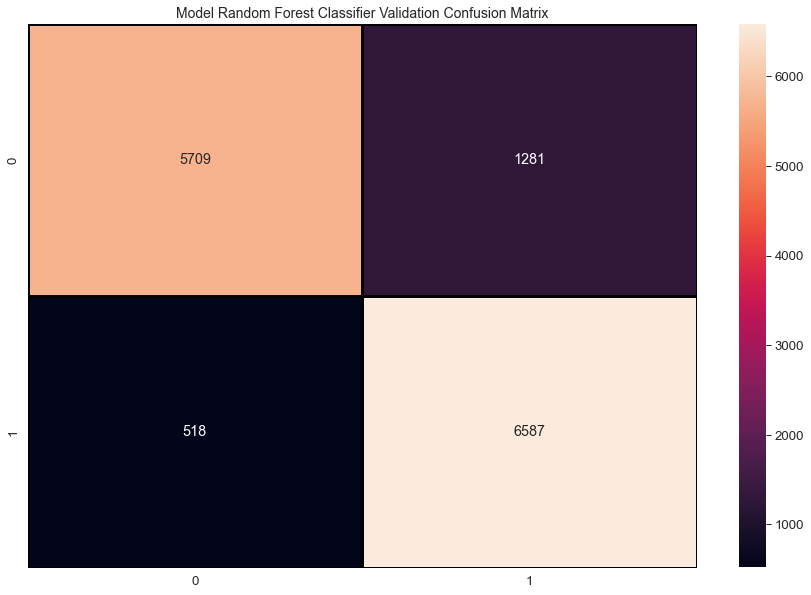

In [36]:
print('Model Random Forest Classifier Validation Classification Report:\n ', classification_report(y_test, rf_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rf_m_1_pred_vaild_cpu),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Model Random Forest Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Gradient Boosting Classifier

Model Gradient Boosting Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.863     0.705     0.776      6990
           1      0.754     0.890     0.816      7105

    accuracy                          0.798     14095
   macro avg      0.809     0.797     0.796     14095
weighted avg      0.808     0.798     0.796     14095



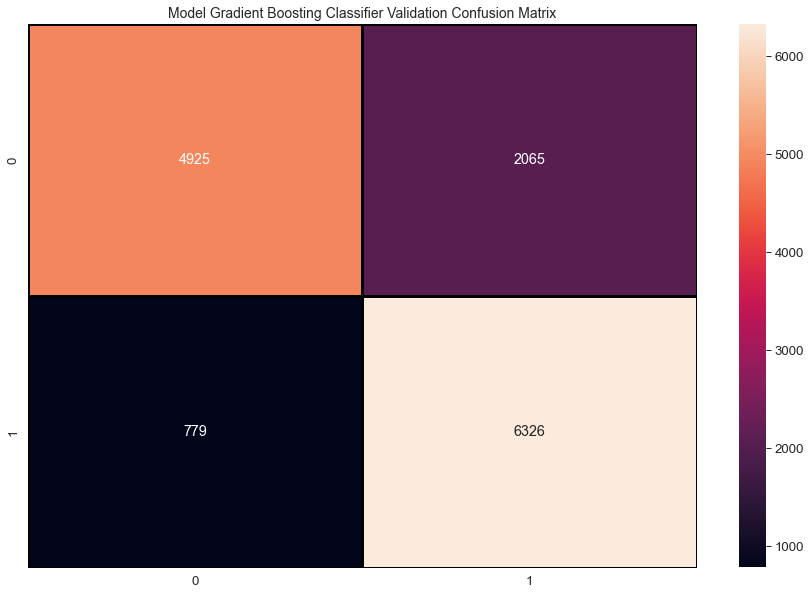

In [37]:
print('Model Gradient Boosting Classifier Validation Classification Report:\n ', classification_report(y_test, gb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, gb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Gradient Boosting Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Histogram-based Gradient Boosting Classification Tree

Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:
                precision    recall  f1-score   support

           0      0.850     0.763     0.804      6990
           1      0.788     0.868     0.826      7105

    accuracy                          0.816     14095
   macro avg      0.819     0.815     0.815     14095
weighted avg      0.819     0.816     0.815     14095



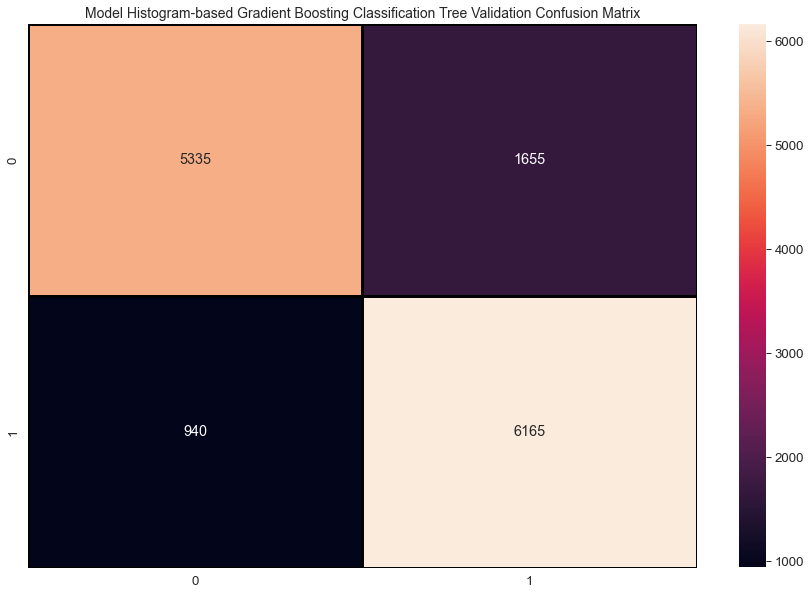

In [38]:
print('Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:\n ', classification_report(y_test, hgb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, hgb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Histogram-based Gradient Boosting Classification Tree Validation Confusion Matrix",fontsize=14)
plt.show()

#### AdaBoost Classifier

Model AdaBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.841     0.710     0.770      6990
           1      0.753     0.868     0.806      7105

    accuracy                          0.790     14095
   macro avg      0.797     0.789     0.788     14095
weighted avg      0.797     0.790     0.788     14095



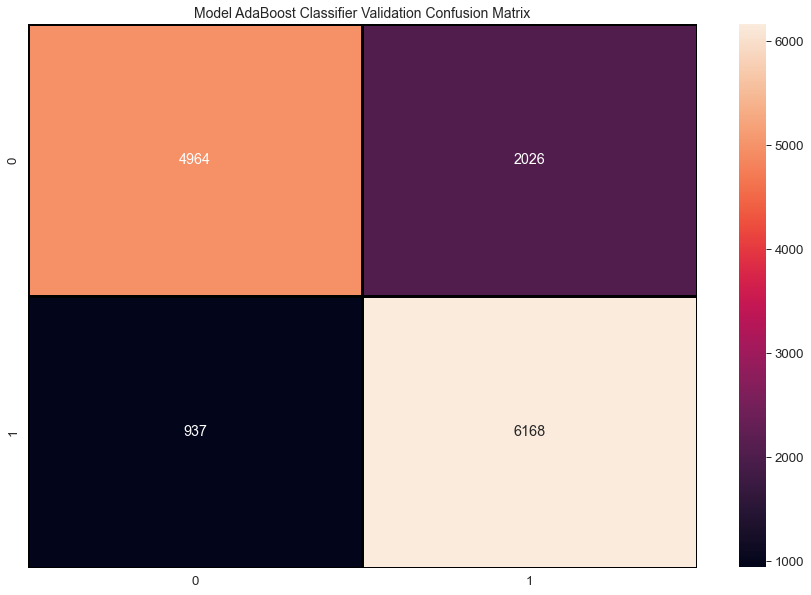

In [39]:
print('Model AdaBoost Classifier Validation Classification Report:\n ', classification_report(y_test, ad_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, ad_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model AdaBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Extra Trees Classifier

Model Extra Trees Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.927     0.806     0.862      6990
           1      0.831     0.938     0.881      7105

    accuracy                          0.872     14095
   macro avg      0.879     0.872     0.872     14095
weighted avg      0.879     0.872     0.872     14095



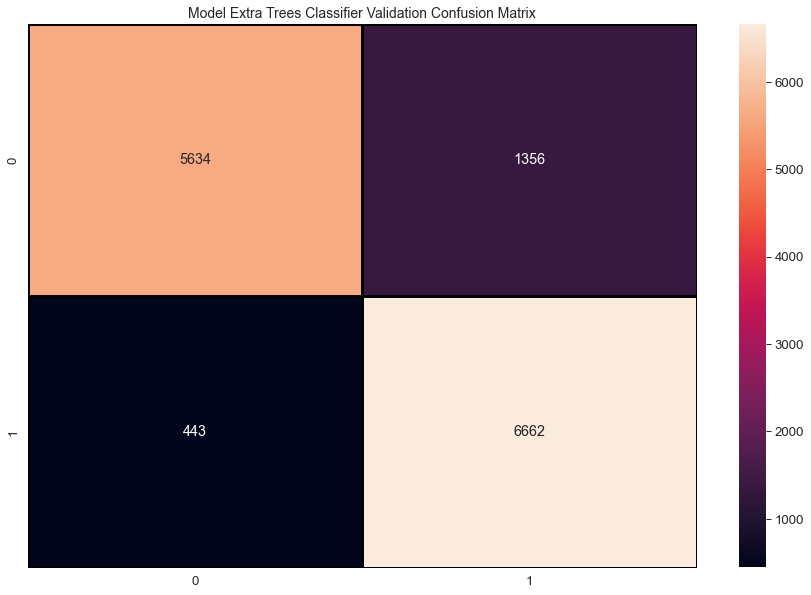

In [40]:
print('Model Extra Trees Classifier Validation Classification Report:\n ', classification_report(y_test, et_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, et_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Extra Trees Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### K Neighbors Classifier

Model K Neighbors Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.862     0.695     0.770      6990
           1      0.748     0.890     0.813      7105

    accuracy                          0.794     14095
   macro avg      0.805     0.793     0.791     14095
weighted avg      0.805     0.794     0.792     14095



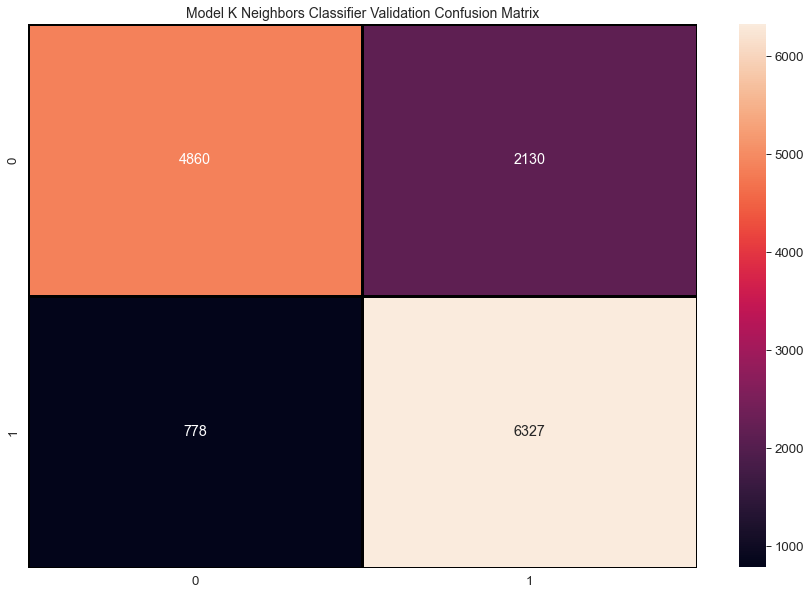

In [41]:
print('Model K Neighbors Classifier Validation Classification Report:\n ', classification_report(y_test, knn_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, knn_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model K Neighbors Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Naive Bayes Classifier 

Model Naive Bayes Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.854     0.600     0.705      6990
           1      0.696     0.899     0.784      7105

    accuracy                          0.751     14095
   macro avg      0.775     0.750     0.745     14095
weighted avg      0.774     0.751     0.745     14095



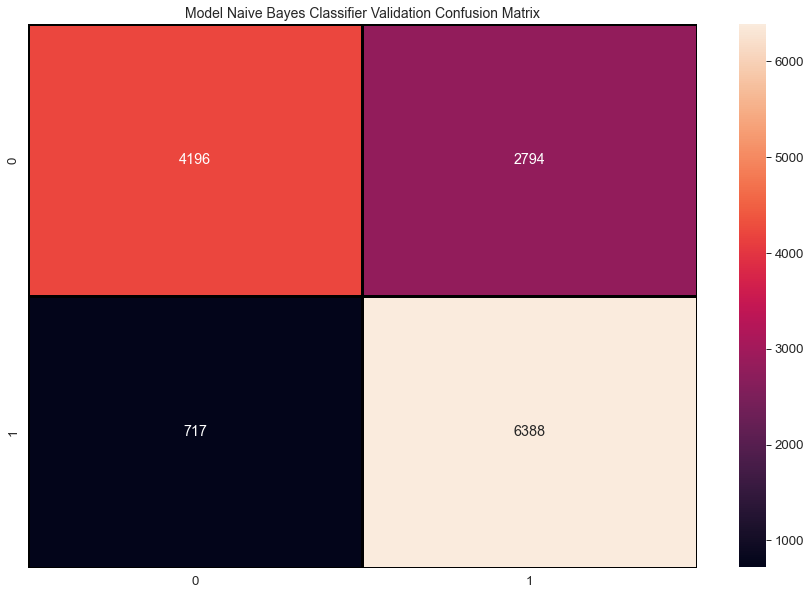

In [42]:
print('Model Naive Bayes Classifier Validation Classification Report:\n ', classification_report(y_test, nb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, nb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Naive Bayes Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Naive Bayes Classifier for Multivariate Bernoulli

Model Naive Bayes Classifier for Multivariate Bernoulli Validation Classification Report:
                precision    recall  f1-score   support

           0      0.811     0.619     0.702      6990
           1      0.696     0.859     0.769      7105

    accuracy                          0.740     14095
   macro avg      0.754     0.739     0.735     14095
weighted avg      0.753     0.740     0.736     14095



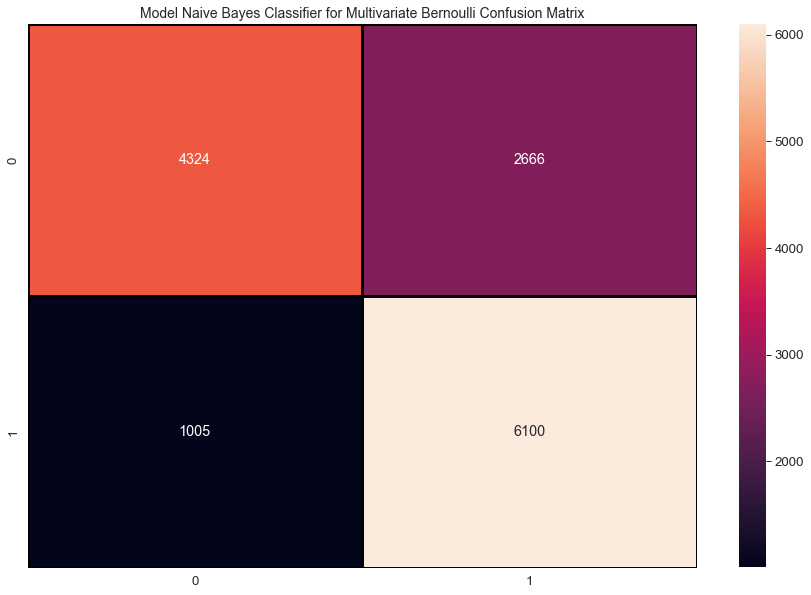

In [43]:
print('Model Naive Bayes Classifier for Multivariate Bernoulli Validation Classification Report:\n ', classification_report(y_test, bnb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, bnb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Naive Bayes Classifier for Multivariate Bernoulli Confusion Matrix",fontsize=14)
plt.show()

#### Decision Tree Classifier

Model Decision Tree Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.818     0.817     0.817      6990
           1      0.820     0.822     0.821      7105

    accuracy                          0.819     14095
   macro avg      0.819     0.819     0.819     14095
weighted avg      0.819     0.819     0.819     14095



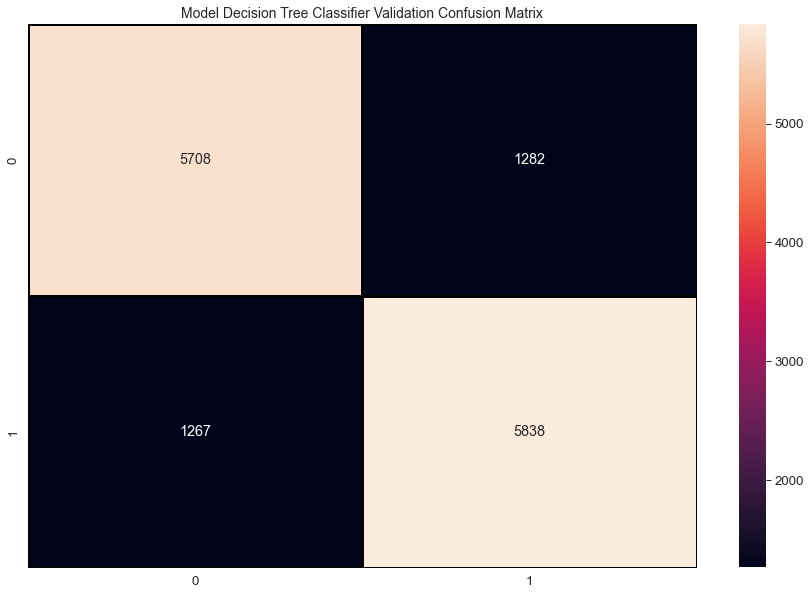

In [44]:
print('Model Decision Tree Classifier Validation Classification Report:\n ', classification_report(y_test, dt_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, dt_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Decision Tree Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression Classifier

Model Logistic Regression Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.871     0.615     0.721      6990
           1      0.706     0.910     0.795      7105

    accuracy                          0.764     14095
   macro avg      0.788     0.762     0.758     14095
weighted avg      0.788     0.764     0.758     14095



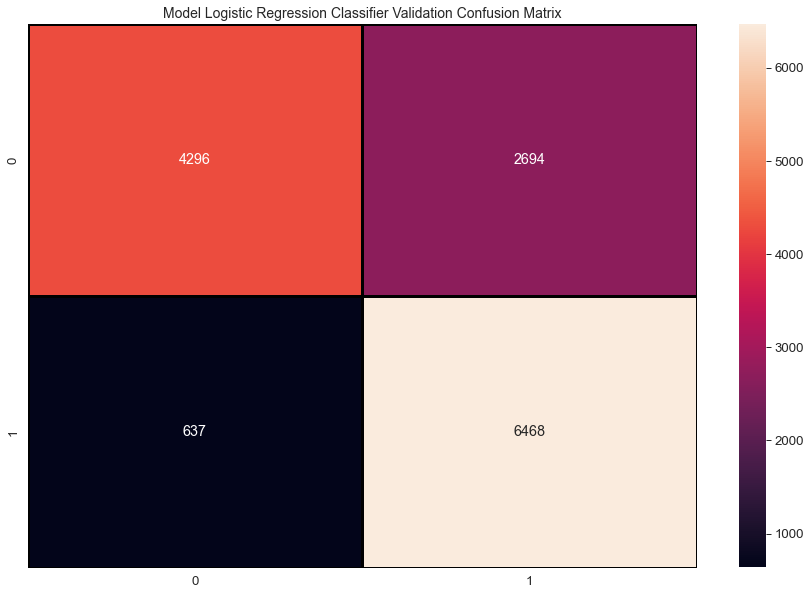

In [45]:
print('Model Logistic Regression Classifier Validation Classification Report:\n ', classification_report(y_test, lg_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lg_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression CV Classifier

Model Logistic Regression CV Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.870     0.614     0.720      6990
           1      0.706     0.910     0.795      7105

    accuracy                          0.763     14095
   macro avg      0.788     0.762     0.757     14095
weighted avg      0.787     0.763     0.758     14095



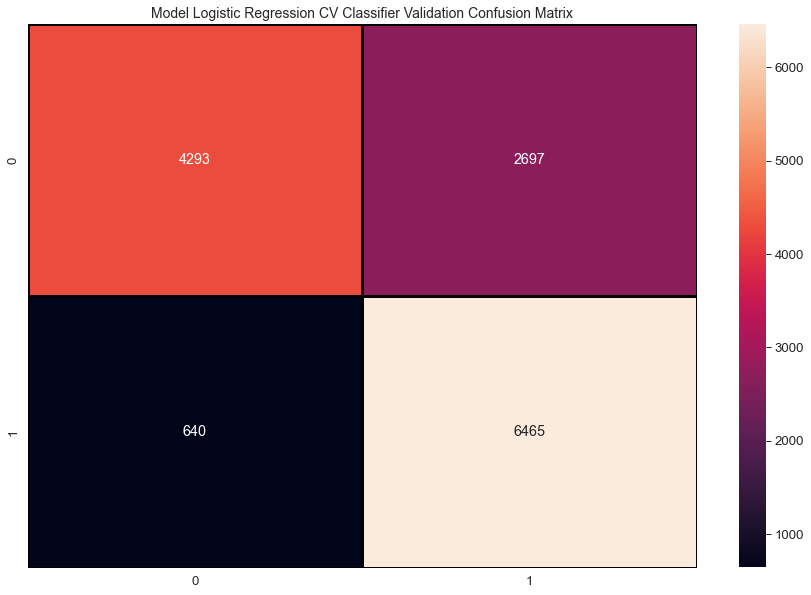

In [46]:
print('Model Logistic Regression CV Classifier Validation Classification Report:\n ', classification_report(y_test, lgcv_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lgcv_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression CV Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Stochastic Gradient Descent Classifier

Model Stochastic Gradient Descent Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.928     0.559     0.697      6990
           1      0.688     0.957     0.801      7105

    accuracy                          0.760     14095
   macro avg      0.808     0.758     0.749     14095
weighted avg      0.807     0.760     0.749     14095



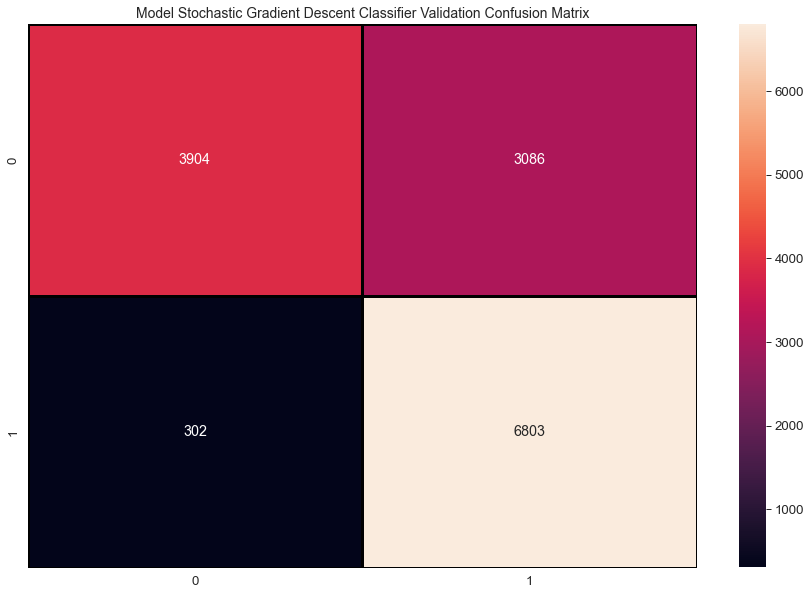

In [47]:
print('Model Stochastic Gradient Descent Classifier Validation Classification Report:\n ', classification_report(y_test, sgdc_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, sgdc_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Stochastic Gradient Descent Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Perceptron Classifier

Model Linear Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.649     0.800     0.717      6990
           1      0.745     0.575     0.649      7105

    accuracy                          0.687     14095
   macro avg      0.697     0.688     0.683     14095
weighted avg      0.698     0.687     0.683     14095



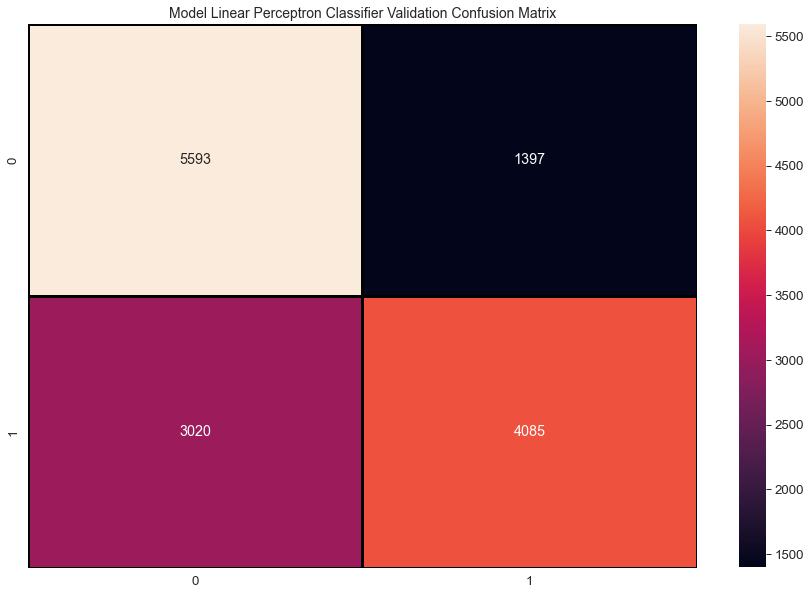

In [48]:
print('Model Linear Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, lpc_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lpc_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### XGBoost Classifier

Model XGBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.844     0.789     0.816      6990
           1      0.805     0.856     0.830      7105

    accuracy                          0.823     14095
   macro avg      0.824     0.823     0.823     14095
weighted avg      0.824     0.823     0.823     14095



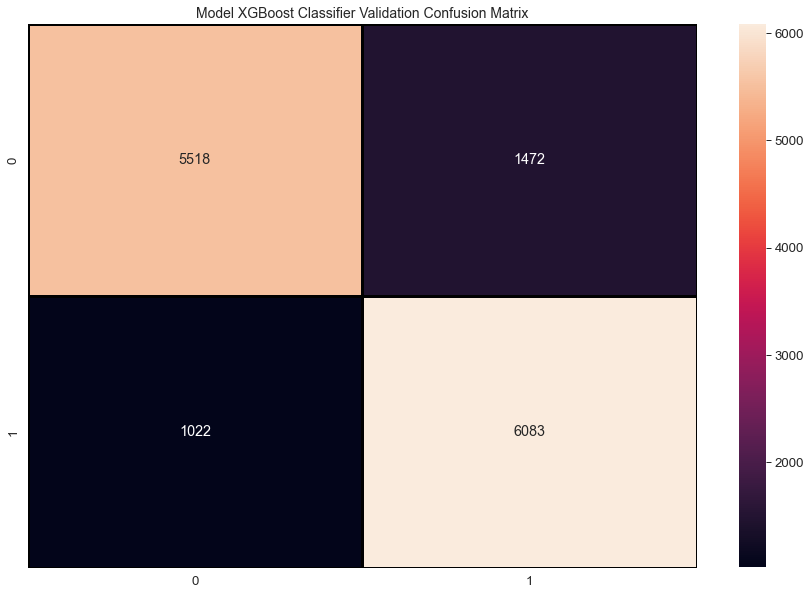

In [49]:
print('Model XGBoost Classifier Validation Classification Report:\n ', classification_report(y_test, xgb_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, xgb_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model XGBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Support Vector Machines Classifier

Model Support Vector Machines Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.897     0.621     0.734      6990
           1      0.714     0.930     0.808      7105

    accuracy                          0.777     14095
   macro avg      0.806     0.776     0.771     14095
weighted avg      0.805     0.777     0.771     14095



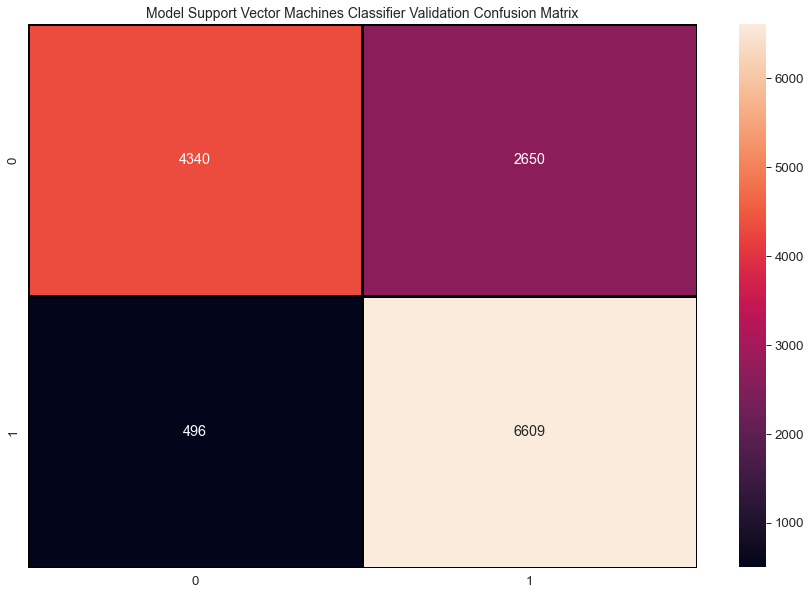

In [50]:
print('Model Support Vector Machines Classifier Validation Classification Report:\n ', classification_report(y_test, svm_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, svm_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Support Vector Machines Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Linear Support Vector Classification

Model Linear Support Vector Classificationr Validation Classification Report:
                precision    recall  f1-score   support

           0      0.899     0.587     0.710      6990
           1      0.697     0.935     0.799      7105

    accuracy                          0.763     14095
   macro avg      0.798     0.761     0.755     14095
weighted avg      0.797     0.763     0.755     14095



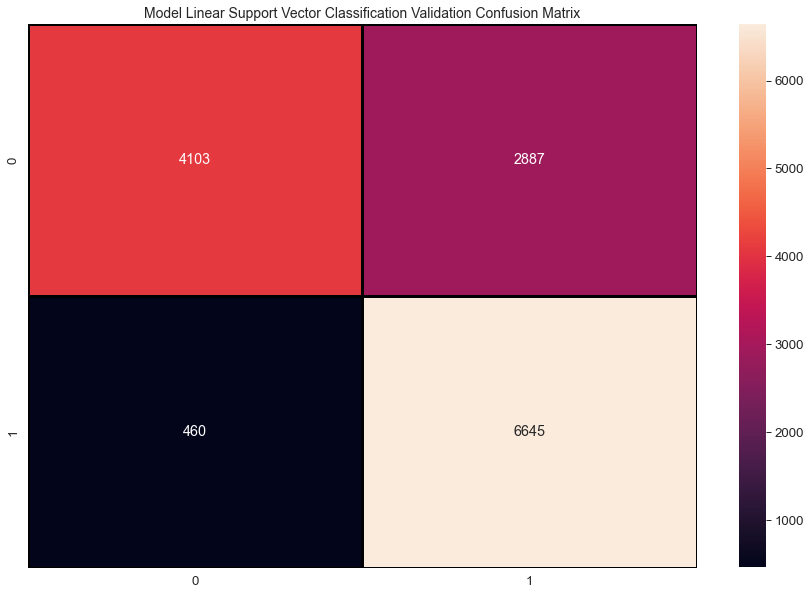

In [51]:
print('Model Linear Support Vector Classificationr Validation Classification Report:\n ', classification_report(y_test, lsvm_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lsvm_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Support Vector Classification Validation Confusion Matrix",fontsize=14)
plt.show()

#### Multilayer Perceptron Classifier

Model Multilayer Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.849     0.702     0.768      6990
           1      0.749     0.878     0.808      7105

    accuracy                          0.790     14095
   macro avg      0.799     0.790     0.788     14095
weighted avg      0.799     0.790     0.789     14095



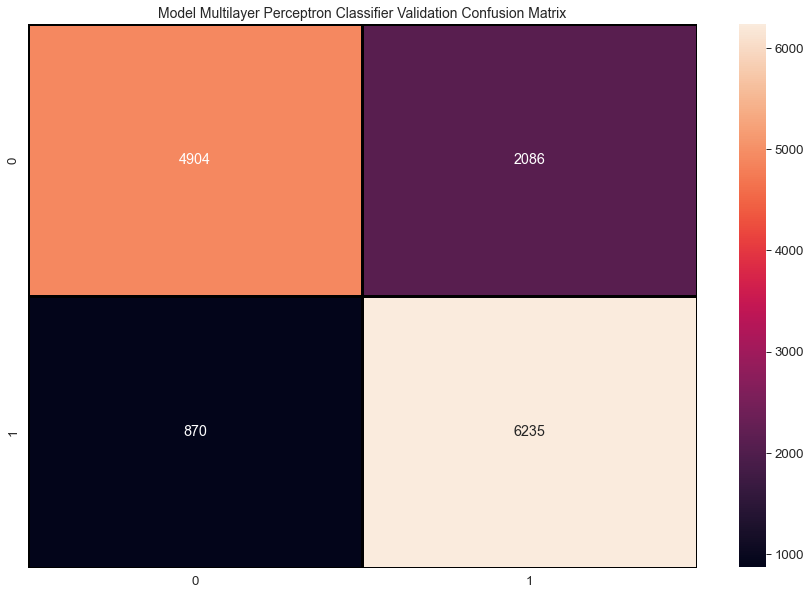

In [52]:
print('Model Multilayer Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, mlp_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, mlp_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Multilayer Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

# 15. Machine Learning Models Optimization

##  random grid for CPU Models

### Random Forest Classifier

In [53]:
# Features which make predictions of the model better
n_estimators = [int(x) for x in np.linspace(50, 500, num = 30)]
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 20)]
min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 20)]
max_features = ['sqrt', 'log2', 'auto']
max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)]
max_leaf_nodes.append(None)
min_impurity_decrease = [0.0, 0.2, 0.5, 0.75]

# Features which will make the model training easier
bootstrap = [True, False]
oob_score = [False, True]
n_jobs = [-1]
random_state = [None]
verbose = [0]
warm_start = [False]
class_weight = [None, 'balanced', 'balanced_subsample']
ccp_alpha = [0.0]
max_samples = [None]

# Create the random grid
random_grid_rf = {'n_estimators': n_estimators,
            'criterion': criterion,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'max_features': max_features,
            'max_leaf_nodes' : max_leaf_nodes, 
            'min_impurity_decrease' : min_impurity_decrease,
            'bootstrap' : bootstrap,
            'oob_score' : oob_score,
            'n_jobs' : n_jobs, 
            'random_state' : random_state,
            'verbose' : verbose,
            'warm_start' : warm_start, 
            'class_weight' : class_weight,
            'ccp_alpha' : ccp_alpha,
            'max_samples' : max_samples
            }

### Gradient Boosting Classifier

In [54]:
loss = ['log_loss', 'deviance', 'exponential']
learning_rate = [0.0, 0.1, 0.2, 0.5, 0.75]
n_estimators = [int(x) for x in np.linspace(50, 500, num = 20)]
subsample = [1.0, 2.0, 4.0, 6.0, 8.0, 10.0]
criterion = ['friedman_mse', 'friedman_mse', 'squared_error', 'mse']
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)]
min_weight_fraction_leaf = [0.0, 0.1, 0.2, 0.5, 0.75]
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
min_impurity_decrease = [0.0, 0.1, 0.2, 0.5, 0.75]

init = [None]
random_state = [None]
max_features = ['sqrt', 'log2', 'auto']
verbose = [0]
max_leaf_nodes = [None]
warm_start = [False]
validation_fraction = [0.1]
n_iter_no_change = [None]
tol = [0.0001]
ccp_alpha = [0.0]

# Create the random grid
random_grid_gb = {'loss': loss,
            'learning_rate': learning_rate,
            'n_estimators': n_estimators,
            'subsample': subsample,
            'criterion': criterion,
            'min_samples_split': min_samples_split,
            'min_samples_leaf' : min_samples_leaf, 
            'min_weight_fraction_leaf' : min_weight_fraction_leaf,
            'max_depth' : max_depth,
            'min_impurity_decrease' : min_impurity_decrease,
            'init' : init, 
            'random_state' : random_state,
            'max_features' : max_features,
            'verbose' : verbose, 
            'max_leaf_nodes' : max_leaf_nodes,
            'warm_start' : warm_start,
            'validation_fraction' : validation_fraction,
            'n_iter_no_change' : n_iter_no_change, 
            'tol' : tol,
            'ccp_alpha' : ccp_alpha
            }

### Histogram-based Gradient Boosting Classification Tree

In [55]:
loss= ['log_loss', 'auto', 'binary_crossentropy', 'categorical_crossentropy']
learning_rate=[0.1] 
max_iter= [int(x) for x in np.linspace(50, 100, num = 10)] 
max_leaf_nodes=[int(x) for x in np.linspace(20, 60, num = 20)] 
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] 
min_samples_leaf=[int(x) for x in np.linspace(10, 40, num = 10)]
l2_regularization=[0.0, 0.1, 0.6]
max_bins=[int(x) for x in np.linspace(100, 255, num = 20)]

categorical_features=[None] 
monotonic_cst=[None] 
warm_start=[False]
early_stopping=['auto']
scoring=['loss'] 
validation_fraction=[0.1]
n_iter_no_change=[int(x) for x in np.linspace(10, 40, num = 10)]
tol=[1e-07] 
verbose=[0]
random_state=[None]

random_grid_hgb = {'loss' : loss,
                'learning_rate' : learning_rate,
                'max_iter' : max_iter,
                'max_leaf_nodes' : max_leaf_nodes,
                'max_depth' : max_depth,
                'min_samples_leaf' : min_samples_leaf,
                'l2_regularization' : l2_regularization,
                'max_bins' : max_bins,
                'categorical_features' : categorical_features,
                'monotonic_cst' : monotonic_cst,
                'warm_start' : warm_start,
                'early_stopping' : early_stopping,
                'scoring' : scoring,
                'validation_fraction' : validation_fraction,
                'n_iter_no_change' : n_iter_no_change,
                'tol' : tol,
                'verbose' : verbose,
                'random_state' : random_state
                    }

### AdaBoost Classifier

In [56]:
base_estimator=[DecisionTreeClassifier(max_depth=1)] 
n_estimators= [int(x) for x in np.linspace(50, 500, num = 20)] 
learning_rate=[1.0] 
algorithm=['SAMME','SAMME.R'] 
random_state=[None] 

random_grid_ad = {'base_estimator' : base_estimator,
                'n_estimators' : n_estimators,
                'learning_rate' : learning_rate,
                'algorithm' : algorithm,
                'random_state' : random_state
}

### Extra Trees Classifier

In [57]:
n_estimators = [int(x) for x in np.linspace(100, 500, num = 20)]
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)]
min_weight_fraction_leaf = [0.0]
max_features = ['sqrt', 'log2', None]
max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)]
#max_leaf_nodes.append(None)

min_impurity_decrease=[0.0]
bootstrap=[False] 
oob_score=[True,False] 
n_jobs=[None] 
random_state=[None] 
verbose=[0] 
warm_start=[False] 
class_weight=['balanced', 'balanced_subsample', None] 
ccp_alpha=[0.0] 
max_samples = [int(x) for x in np.linspace(1, 20, num = 10)] 
max_samples.append(None)

random_grid_et = {'n_estimators' : n_estimators,
                'criterion' : criterion,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf,
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_features' : max_features,
                'max_leaf_nodes' : max_leaf_nodes,
                'min_impurity_decrease' : min_impurity_decrease,
                'bootstrap' : bootstrap,
                'oob_score' : oob_score,
                'n_jobs' : n_jobs,
                'random_state' : random_state,
                'verbose' : verbose,
                'warm_start': warm_start,
                'class_weight' : class_weight,
                'ccp_alpha' : ccp_alpha,
                'max_samples' : max_samples
}

### Decision Tree Classifier

In [58]:
criterion = ['gini','entropy', 'log_loss'] 
splitter = ['best', 'random'] 
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] 
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] 
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] 
min_weight_fraction_leaf = [0.0] 
max_features = [None, 'auto', 'log2'] 
random_state = [None] 
max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)]
max_leaf_nodes.append(None)

min_impurity_decrease=[0.0] 
class_weight=[None] 
ccp_alpha=[0.0] 

random_grid_dt = {'criterion' : criterion,
                'splitter' : splitter,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf,
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_features' : max_features,
                'random_state' : random_state,
                'max_leaf_nodes' : max_leaf_nodes, 
                'min_impurity_decrease' : min_impurity_decrease,
                'class_weight' : class_weight,
                'ccp_alpha' : ccp_alpha                
}

### Logistic Regression Classifiers

In [59]:
penalty = ['l2','l1', '‘elasticnet'] 
dual = [False, True]
tol = [0.0001] 
C = [1.0] 
fit_intercept = [True, False]
intercept_scaling = [1]
class_weight = [None, 'balanced']
random_state = [None] 
solver = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'] 
max_iter = [int(x) for x in np.linspace(50, 250, num = 10)]  
multi_class = ['auto', 'ovr', 'multinomial'] 
verbose = [0] 
warm_start = [False] 
n_jobs = [None] 
l1_ratio = [None]

random_grid_lg = {'penalty' : penalty,
                'dual' : dual,
                'tol' : tol,
                'C' : C,
                'fit_intercept' : fit_intercept,
                'intercept_scaling' : intercept_scaling,
                'class_weight' : class_weight,
                'random_state' : random_state,
                'solver' : solver,
                'max_iter' : max_iter,
                'multi_class' : multi_class,
                'verbose' : verbose,
                'warm_start' : warm_start,
                'n_jobs' : n_jobs,
                'l1_ratio' : l1_ratio
}

### Logistic Regression CV Classifier

In [60]:
Cs = [int(x) for x in np.linspace(5, 50, num = 10)] 
fit_intercept = [True, False] 
cv = [int(x) for x in np.linspace(3, 7, num = 5)] 
dual = [False, False]
penalty = ['l2', 'l1', 'elasticnet'] 
scoring = [None] 
solver=['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
tol = [0.0001] 
max_iter = [100] 
class_weight = [None, 'balanced'] 
n_jobs = [None] 
verbose = [0] 
refit = [True] 
intercept_scaling = [1.0] 
multi_class = ['auto', 'ovr', 'multinomial'] 
random_state = [None]
l1_ratios = [None]

random_grid_lgcv = {'Cs' : Cs,
                'fit_intercept' : fit_intercept,
                'cv' : cv,
                'dual' : dual,
                'penalty' : penalty,
                'scoring' : scoring,
                'solver' : solver,
                'tol' : tol,
                'max_iter' : max_iter,
                'class_weight' : class_weight,
                'n_jobs' : n_jobs,
                'verbose' : verbose,
                'refit' : refit,
                'intercept_scaling' : intercept_scaling,
                'multi_class' : multi_class,
                'random_state' : random_state,
                'l1_ratios' : l1_ratios
}

### Stochastic Gradient Descent Classifier

In [61]:
loss=['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty=['l2', 'l1', 'elasticnet'] 
alpha=[0.0001]
l1_ratio=[0.15] 
fit_intercept=[True, False] 
max_iter = [int(x) for x in np.linspace(900, 5000, num = 15)]
tol=[0.001]
shuffle=[True, False] 
verbose=[0] 
epsilon=[0.1] 
n_jobs=[None] 
random_state=[None] 
learning_rate=['optimal'] 
eta0 = [0.0] 
power_t = [0.5] 
early_stopping=[False, True]
validation_fraction=[0.1]
n_iter_no_change = [int(x) for x in np.linspace(3, 25, num = 15)] 
class_weight=[None, 'balanced'] 
warm_start=[False]
average=[False]

random_grid_sgdc = {'loss' : loss,
                'penalty' : penalty, 
                'alpha' : alpha, 
                'l1_ratio' : l1_ratio,
                'fit_intercept' : fit_intercept,
                'max_iter' : max_iter,
                'tol' : tol, 
                'shuffle' : shuffle, 
                'verbose' : verbose,
                'epsilon' : epsilon, 
                'n_jobs' : n_jobs, 
                'random_state' : random_state, 
                'learning_rate' : learning_rate, 
                'eta0' : eta0,
                'power_t' : power_t, 
                'early_stopping' : early_stopping,
                'validation_fraction' : validation_fraction, 
                'n_iter_no_change' : n_iter_no_change,
                'class_weight' : class_weight,
                'warm_start' : warm_start,
                'average' : average
}

### Linear Perceptron Classifier

In [62]:
penalty = [None, 'l2', 'l1'] 
alpha = [0.0001] 
l1_ratio = [0.15] 
fit_intercept=[True, False]
max_iter = [int(x) for x in np.linspace(900, 5000, num = 15)]
tol=[0.001] 
shuffle=[True] 
verbose=[0] 
eta0=[1.0] 
n_jobs=[None] 
random_state=[0] 
early_stopping=[False] 
validation_fraction=[0.1] 
n_iter_no_change=[5]
class_weight=[None] 
warm_start=[False]

random_grid_lpc = {'penalty' : penalty,
                'alpha' : alpha,
                'l1_ratio' : l1_ratio,
                'fit_intercept' : fit_intercept,
                'max_iter' : max_iter,
                'tol' : tol,
                'shuffle' : shuffle,
                'verbose' : verbose,
                'eta0' : eta0,
                'n_jobs' : n_jobs,
                'random_state' : random_state,
                'early_stopping' : early_stopping,
                'validation_fraction' : validation_fraction,
                'n_iter_no_change' : n_iter_no_change,
                'class_weight' : class_weight,
                'warm_start' : warm_start,
}

### Support Vector Machines Classifiers

In [63]:
C=[1.0]
kernel=['rbf', 'linear', 'poly', 'sigmoid']
degree = [int(x) for x in np.linspace(1, 15, num = 10)] 
gamma = ['scale', 'auto']
coef0=[0.0] 
shrinking=[True, False] 
probability=[False, True] 
tol=[0.001]
cache_size=[int(x) for x in np.linspace(750, 600, num = 20)]
class_weight=[None, 'balanced'] 
verbose=[False] 
max_iter=  [int(x) for x in np.linspace(-5, 5, num = 8)] 
decision_function_shape=['ovr', 'ovo'] 
break_ties=[False] 
random_state=[None]

random_grid_svm = {'C' : C,
                'kernel' : kernel,
                'degree' : degree,
                'gamma' : gamma,
                'coef0' : coef0,
                'shrinking' : shrinking,
                'probability' : probability,
                'tol' : tol,
                'cache_size' : cache_size,
                'class_weight': class_weight,
                'verbose' : verbose,
                'max_iter' : max_iter,
                'decision_function_shape' : decision_function_shape,
                'break_ties' : break_ties,
                'random_state' : random_state
}

### Linear Support Vector Classification

In [64]:
penalty = ['l2', 'l1']
loss = ['squared_hinge', 'hinge']
dual=[True, False]
tol=[0.0001]
C=[1.0] 
multi_class=['ovr', 'crammer_singer'] 
fit_intercept=[True, False] 
intercept_scaling = [int(x) for x in np.linspace(1, 10, num = 10)] 
class_weight=[None] 
verbose=[0]
random_state=[None]
max_iter=[int(x) for x in np.linspace(600, 8000, num = 30)]

random_grid_lsvm = {'penalty' : penalty,
                'loss' : loss, 
                'dual' : dual,
                'tol' : tol,
                'C' : C,
                'multi_class' : multi_class,
                'fit_intercept' : fit_intercept,
                'intercept_scaling' : intercept_scaling,
                'class_weight' : class_weight,
                'verbose' : verbose,
                'random_state' : random_state,
                'max_iter' : max_iter
}

## Hyperparameters using CPU

In [65]:
'''
        Random Forest Classifier
'''

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(rf, random_grid_rf, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.0],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 6, 11, 16, 21, 27, 32,
                                                      37, 42, 47, 53, 58, 63,
                                                      68, 73, 79, 84, 89, 94,
                                                      100, None],
                                        'max_features': ['sqrt', 'log2',
                                                         'a...
                                                             27, 32, 37, 42, 47,
                                                             53, 58, 63, 68, 73,
                                                             79, 84, 89, 94,
                                                             100],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20],
                                        'n_estimators': [50, 65, 81, 96, 112,
                                                         127, 143, 158, 174,
                                                         189, 205, 220, 236,
                                                         251, 267, 282, 298,
                                                         313, 329, 344, 360,
                                                         375, 391, 406, 422,
                                                         437, 453, 468, 484,
                                                         500],
                                        'n_jobs': [-1],
                                        'oob_score': [False, True],
                                        'random_state': [None], 'verbose': [0],
                                        'warm_start': [False]})

In [66]:
'''
        Gradient Boosting Classifier
'''

gb = GradientBoostingClassifier()

gb_random = RandomizedSearchCV(gb, random_grid_gb, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
gb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0],
                                        'criterion': ['friedman_mse',
                                                      'friedman_mse',
                                                      'squared_error', 'mse'],
                                        'init': [None],
                                        'learning_rate': [0.0, 0.1, 0.2, 0.5,
                                                          0.75],
                                        'loss': ['log_loss', 'deviance',
                                                 'exponential'],
                                        'max_depth': [1, 6, 11, 16, 21, 27, 32,
                                                      37, 42, 47, 53, 58, 63,
                                                      68, 73, 79, 84, 8...
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 20],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.5,
                                                                     0.75],
                                        'n_estimators': [50, 73, 97, 121, 144,
                                                         168, 192, 215, 239,
                                                         263, 286, 310, 334,
                                                         357, 381, 405, 428,
                                                         452, 476, 500],
                                        'n_iter_no_change': [None],
                                        'random_state': [None],
                                        'subsample': [1.0, 2.0, 4.0, 6.0, 8.0,
                                                      10.0],
                                        'tol': [0.0001],
                                        'validation_fraction': [0.1],
                                        'verbose': [0], 'warm_start': [False]})

In [67]:
'''
        Histogram-based Gradient Boosting Classification Tree
'''

hgb = HistGradientBoostingClassifier()

hgb_random = RandomizedSearchCV(hgb, random_grid_hgb, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
hgb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=HistGradientBoostingClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'categorical_features': [None],
                                        'early_stopping': ['auto'],
                                        'l2_regularization': [0.0, 0.1, 0.6],
                                        'learning_rate': [0.1],
                                        'loss': ['log_loss', 'auto',
                                                 'binary_crossentropy',
                                                 'categorical_crossentropy'],
                                        'max_bins': [100, 108, 116, 124, 132,
                                                     140, 148, 157, 165, 173,
                                                     1...
                                        'max_iter': [50, 55, 61, 66, 72, 77, 83,
                                                     88, 94, 100],
                                        'max_leaf_nodes': [20, 22, 24, 26, 28,
                                                           30, 32, 34, 36, 38,
                                                           41, 43, 45, 47, 49,
                                                           51, 53, 55, 57, 60],
                                        'min_samples_leaf': [10, 13, 16, 20, 23,
                                                             26, 30, 33, 36,
                                                             40],
                                        'monotonic_cst': [None],
                                        'n_iter_no_change': [10, 13, 16, 20, 23,
                                                             26, 30, 33, 36,
                                                             40],
                                        'random_state': [None],
                                        'scoring': ['loss'], 'tol': [1e-07],
                                        'validation_fraction': [0.1],
                                        'verbose': [0], 'warm_start': [False]})

In [68]:
'''
        AdaBoost Classifier
'''

ad = AdaBoostClassifier()

ad_random = RandomizedSearchCV(ad, random_grid_ad, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
ad_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_iter=150, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'base_estimator': [DecisionTreeClassifier(max_depth=1)],
                                        'learning_rate': [1.0],
                                        'n_estimators': [50, 73, 97, 121, 144,
                                                         168, 192, 215, 239,
                                                         263, 286, 310, 334,
                                                         357, 381, 405, 428,
                                                         452, 476, 500],
                                        'random_state': [None]})

In [69]:
'''   
        Extra Trees Classifier
'''

et = ExtraTreesClassifier()

et_random = RandomizedSearchCV(et, random_grid_et, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
et_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'ccp_alpha': [0.0],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 6, 11, 16, 21, 27, 32,
                                                      37, 42, 47, 53, 58, 63,
                                                      68, 73, 79, 84, 89, 94,
                                                      100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'ma...
                                        'min_impurity_decrease': [0.0],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 20],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 20],
                                        'min_weight_fraction_leaf': [0.0],
                                        'n_estimators': [100, 121, 142, 163,
                                                         184, 205, 226, 247,
                                                         268, 289, 310, 331,
                                                         352, 373, 394, 415,
                                                         436, 457, 478, 500],
                                        'n_jobs': [None],
                                        'oob_score': [True, False],
                                        'random_state': [None], 'verbose': [0],
                                        'warm_start': [False]})

In [70]:
'''
            Decision Tree Classifier
'''

dt = DecisionTreeClassifier()

dt_random = RandomizedSearchCV(dt, random_grid_dt, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
dt_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0],
                                        'class_weight': [None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 6, 11, 16, 21, 27, 32,
                                                      37, 42, 47, 53, 58, 63,
                                                      68, 73, 79, 84, 89, 94,
                                                      100, None],
                                        'max_features': [None, 'auto', 'log2'],
                                        'max_leaf_nodes': [1, 3, 5, 7, 9, 11,
                                                           13, 15, 17, 20,
                                                           None],
                                        'min_impurity_decrease': [0.0],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 20],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 20],
                                        'min_weight_fraction_leaf': [0.0],
                                        'random_state': [None],
                                        'splitter': ['best', 'random']})

In [71]:
'''
            Logistic Regression Classifiers
'''

lg = LogisticRegression()

lg_random = RandomizedSearchCV(lg, random_grid_lg, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
lg_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=150, n_jobs=-1,
                   param_distributions={'C': [1.0],
                                        'class_weight': [None, 'balanced'],
                                        'dual': [False, True],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': [1],
                                        'l1_ratio': [None],
                                        'max_iter': [50, 72, 94, 116, 138, 161,
                                                     183, 205, 227, 250],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'n_jobs': [None],
                                        'penalty': ['l2', 'l1', '‘elasticnet'],
                                        'random_state': [None],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.0001], 'verbose': [0],
                                        'warm_start': [False]})

In [72]:
'''
            Stochastic Gradient Descent Classifier
'''

sgdc = SGDClassifier()

sgdc_random = RandomizedSearchCV(sgdc, random_grid_sgdc, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
sgdc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SGDClassifier(), n_iter=150, n_jobs=-1,
                   param_distributions={'alpha': [0.0001], 'average': [False],
                                        'class_weight': [None, 'balanced'],
                                        'early_stopping': [False, True],
                                        'epsilon': [0.1], 'eta0': [0.0],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0.15],
                                        'learning_rate': ['optimal'],
                                        'loss': ['hinge', 'log_loss', 'log',
                                                 'modified_huber',
                                                 'squar...
                                                 'squared_epsilon_insensitive'],
                                        'max_iter': [900, 1192, 1485, 1778,
                                                     2071, 2364, 2657, 2950,
                                                     3242, 3535, 3828, 4121,
                                                     4414, 4707, 5000],
                                        'n_iter_no_change': [3, 4, 6, 7, 9, 10,
                                                             12, 14, 15, 17, 18,
                                                             20, 21, 23, 25],
                                        'n_jobs': [None],
                                        'penalty': ['l2', 'l1', 'elasticnet'],
                                        'power_t': [0.5],
                                        'random_state': [None],
                                        'shuffle': [True, False],
                                        'tol': [0.001],
                                        'validation_fraction': [0.1],
                                        'verbose': [0], 'warm_start': [False]})

In [73]:
'''
            Linear Perceptron Classifier
'''

lpc = Perceptron()

lpc_random = RandomizedSearchCV(lpc, random_grid_lpc, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
lpc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=Perceptron(), n_iter=150, n_jobs=-1,
                   param_distributions={'alpha': [0.0001],
                                        'class_weight': [None],
                                        'early_stopping': [False],
                                        'eta0': [1.0],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0.15],
                                        'max_iter': [900, 1192, 1485, 1778,
                                                     2071, 2364, 2657, 2950,
                                                     3242, 3535, 3828, 4121,
                                                     4414, 4707, 5000],
                                        'n_iter_no_change': [5],
                                        'n_jobs': [None],
                                        'penalty': [None, 'l2', 'l1'],
                                        'random_state': [0], 'shuffle': [True],
                                        'tol': [0.001],
                                        'validation_fraction': [0.1],
                                        'verbose': [0], 'warm_start': [False]})

In [74]:
'''
            Support Vector Machines Classifiers
'''

svm = SVC()

svm_random = RandomizedSearchCV(svm, random_grid_svm, n_iter=150, cv = 3, n_jobs = -1)

# Fit the random search model
svm_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=150, n_jobs=-1,
                   param_distributions={'C': [1.0], 'break_ties': [False],
                                        'cache_size': [750, 742, 734, 726, 718,
                                                       710, 702, 694, 686, 678,
                                                       671, 663, 655, 647, 639,
                                                       631, 623, 615, 607,
                                                       600],
                                        'class_weight': [None, 'balanced'],
                                        'coef0': [0.0],
                                        'decision_function_shape': ['ovr',
                                                                    'ovo'],
                                        'degree': [1, 2, 4, 5, 7, 8, 10, 11, 13,
                                                   15],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid'],
                                        'max_iter': [-5, -3, -2, 0, 0, 2, 3, 5],
                                        'probability': [False, True],
                                        'random_state': [None],
                                        'shrinking': [True, False],
                                        'tol': [0.001], 'verbose': [False]})

## Build the Optmization Models Using CPU

In [75]:
# Random Forest Classifier
rf_op_m_1_cpu = rf_random.best_estimator_

print('Parameters currently in use:\n')
print(rf_op_m_1_cpu.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 360, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [76]:
# Gradient Boosting Classifier
gb_op_m_1_cpu = gb_random.best_estimator_

print('Parameters currently in use:\n')
print(gb_op_m_1_cpu.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 37, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 9, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 334, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [77]:
# Histogram-based Gradient Boosting Classification Tree
hgb_op_m_1_cpu = hgb_random.best_estimator_

print('Parameters currently in use:\n')
print(hgb_op_m_1_cpu.get_params())

Parameters currently in use:

{'categorical_features': None, 'early_stopping': 'auto', 'l2_regularization': 0.6, 'learning_rate': 0.1, 'loss': 'auto', 'max_bins': 165, 'max_depth': 11, 'max_iter': 100, 'max_leaf_nodes': 57, 'min_samples_leaf': 10, 'monotonic_cst': None, 'n_iter_no_change': 13, 'random_state': None, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [78]:
# AdaBoost Classifier
ad_op_m_1_cpu = ad_random.best_estimator_

print('Parameters currently in use:\n')
print(ad_op_m_1_cpu.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1.0, 'n_estimators': 500, 'random_state': None}


In [79]:
# Extra Trees Classifier
et_op_m_1_cpu = et_random.best_estimator_

print('Parameters currently in use:\n')
print(et_op_m_1_cpu.get_params())

Parameters currently in use:

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 53, 'max_features': None, 'max_leaf_nodes': 11, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 478, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [80]:
# Decision Tree Classifier
dt_op_m_1_cpu = dt_random.best_estimator_

print('Parameters currently in use:\n')
print(dt_op_m_1_cpu.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 32, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [81]:
# Logistic Regression Classifiers
lg_op_m_1_cpu = lg_random.best_estimator_

print('Parameters currently in use:\n')
print(lg_op_m_1_cpu.get_params())

Parameters currently in use:

{'C': 1.0, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 72, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [82]:
# Stochastic Gradient Descent Classifier
sgdc_op_m_1_cpu = sgdc_random.best_estimator_

print('Parameters currently in use:\n')
print(sgdc_op_m_1_cpu.get_params())

Parameters currently in use:

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': True, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log_loss', 'max_iter': 5000, 'n_iter_no_change': 23, 'n_jobs': None, 'penalty': 'elasticnet', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [83]:
# Linear Perceptron Classifier
lpc_op_m_1_cpu = lpc_random.best_estimator_

print('Parameters currently in use:\n')
print(lpc_op_m_1_cpu.get_params())

Parameters currently in use:

{'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': False, 'l1_ratio': 0.15, 'max_iter': 900, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l1', 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [84]:
# Support Vector Machines Classifiers
svm_op_m_1_cpu = svm_random.best_estimator_

print('Parameters currently in use:\n')
print(svm_op_m_1_cpu.get_params())

Parameters currently in use:

{'C': 1.0, 'break_ties': False, 'cache_size': 663, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 4, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 5, 'probability': True, 'random_state': None, 'shrinking': False, 'tol': 0.001, 'verbose': False}


## Predict y_test Using CPU

In [85]:
# Random Forest Classifier
rf_op_m_1_pred_vaild_cpu = rf_op_m_1_cpu.predict(X_test)

# Gradient Boosting Classifier
gb_op_m_1_pred_vaild_cpu = gb_op_m_1_cpu.predict(X_test)

# Histogram-based Gradient Boosting Classification Tree
hgb_op_m_1_pred_vaild_cpu = hgb_op_m_1_cpu.predict(X_test)

# AdaBoost Classifier
ad_op_m_1_pred_vaild_cpu = ad_op_m_1_cpu.predict(X_test)

# Extra Trees Classifier
et_op_m_1_pred_vaild_cpu = et_op_m_1_cpu.predict(X_test)

# Decision Tree Classifier
dt_op_m_1_pred_vaild_cpu = dt_op_m_1_cpu.predict(X_test)

# Logistic Regression Classifier
lg_op_m_1_pred_vaild_cpu = lg_op_m_1_cpu.predict(X_test)

# Stochastic Gradient Descent Classifier
sgdc_op_m_1_pred_vaild_cpu =  sgdc_op_m_1_cpu.predict(X_test)

# Linear Perceptron Classifier
lpc_op_m_1_pred_vaild_cpu =  lpc_op_m_1_cpu.predict(X_test)

# Support Vector Machines Classifiers
svm_op_m_1_pred_vaild_cpu = svm_op_m_1_cpu.predict(X_test)

## Evaluate the Models CPU

### Accuracy Score

In [86]:
# Random Forest Classifier
Valid_accuracy_rf_op_m_1_cpu = accuracy_score(y_test, rf_op_m_1_pred_vaild_cpu)

# Gradient Boosting Classifier
Valid_accuracy_gb_op_m_1_cpu = accuracy_score(y_test, gb_op_m_1_pred_vaild_cpu)

# Histogram-based Gradient Boosting Classification Tree
Valid_accuracy_hgb_op_m_1_cpu = accuracy_score(y_test, hgb_op_m_1_pred_vaild_cpu)

# AdaBoost Classifier
Valid_accuracy_ad_op_m_1_cpu = accuracy_score(y_test, ad_op_m_1_pred_vaild_cpu)

# Extra Trees Classifier
Valid_accuracy_et_op_m_1_cpu = accuracy_score(y_test, et_op_m_1_pred_vaild_cpu)

# Decision Tree Classifier
Valid_accuracy_dt_op_m_1_cpu = accuracy_score(y_test, dt_op_m_1_pred_vaild_cpu)

# Logistic Regression Classifier
Valid_accuracy_lg_op_m_1_cpu = accuracy_score(y_test, lg_op_m_1_pred_vaild_cpu)

# Stochastic Gradient Descent Classifier
Valid_accuracy_sgdc_op_m_1_cpu = accuracy_score(y_test, sgdc_op_m_1_pred_vaild_cpu)

# Linear Perceptron Classifier
Valid_accuracy_lpc_op_m_1_cpu = accuracy_score(y_test, lpc_op_m_1_pred_vaild_cpu)

# Support Vector Machines Classifiers
Valid_accuracy_svm_op_m_1_cpu = accuracy_score(y_test, svm_op_m_1_pred_vaild_cpu)


cpu_ml_op_m_1_valid_compare = pd.DataFrame({"Optimization CPU Models": [
                                "Random Forest Classifier", 
                                "Gradient Boosting Classifier",
                                "Histogram-based Gradient Boosting Classification Tree",
                                "AdaBoost Classifier",
                                "Extra Trees Classifier",
                                "Decision Tree Classifier",
                                "Logistic Regression Classifier",
                                "Stochastic Gradient Descent Classifier",
                                "Linear Perceptron Classifier",
                                "Support Vector Machines Classifiers",
                                ],

                "Optimization CPU Models Accuracy": [
                                Valid_accuracy_rf_op_m_1_cpu, 
                                Valid_accuracy_gb_op_m_1_cpu,
                                Valid_accuracy_hgb_op_m_1_cpu,
                                Valid_accuracy_ad_op_m_1_cpu,
                                Valid_accuracy_et_op_m_1_cpu,
                                Valid_accuracy_dt_op_m_1_cpu,
                                Valid_accuracy_lg_op_m_1_cpu,
                                Valid_accuracy_sgdc_op_m_1_cpu,
                                Valid_accuracy_lpc_op_m_1_cpu,
                                Valid_accuracy_svm_op_m_1_cpu,
                                ],
                        })        
print(tabulate(cpu_ml_op_m_1_valid_compare.sort_values(by="Optimization CPU Models Accuracy", ascending=False), headers = 'keys', tablefmt = 'psql'))
fig = px.bar(cpu_ml_op_m_1_valid_compare.sort_values(by="Optimization CPU Models Accuracy", ascending=True), x = "Optimization CPU Models Accuracy", y = "Optimization CPU Models", title = "Model Machines Learning Optimization Validation Accuracy")
fig.show()

+----+-------------------------------------------------------+------------------------------------+
|    | Optimization CPU Models                               |   Optimization CPU Models Accuracy |
|----+-------------------------------------------------------+------------------------------------|
|  1 | Gradient Boosting Classifier                          |                           0.838382 |
|  0 | Random Forest Classifier                              |                           0.832565 |
|  2 | Histogram-based Gradient Boosting Classification Tree |                           0.817737 |
|  3 | AdaBoost Classifier                                   |                           0.803335 |
|  5 | Decision Tree Classifier                              |                           0.800213 |
|  6 | Logistic Regression Classifier                        |                           0.763604 |
|  4 | Extra Trees Classifier                                |                           0.763107 |


### Classification Report and Confusion Matrix

#### Random Forest Classifier

Model Random Forest Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.905     0.740     0.814      6990
           1      0.783     0.923     0.848      7105

    accuracy                          0.833     14095
   macro avg      0.844     0.832     0.831     14095
weighted avg      0.844     0.833     0.831     14095



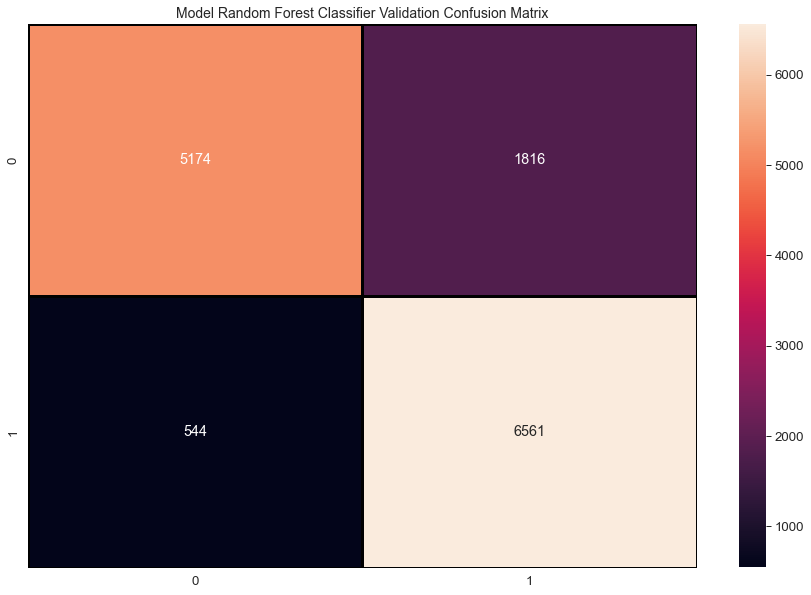

In [87]:
print('Model Random Forest Classifier Validation Classification Report:\n ', classification_report(y_test, rf_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rf_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Random Forest Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Gradient Boosting Classifier

Model Gradient Boosting Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.871     0.791     0.829      6990
           1      0.811     0.885     0.847      7105

    accuracy                          0.838     14095
   macro avg      0.841     0.838     0.838     14095
weighted avg      0.841     0.838     0.838     14095



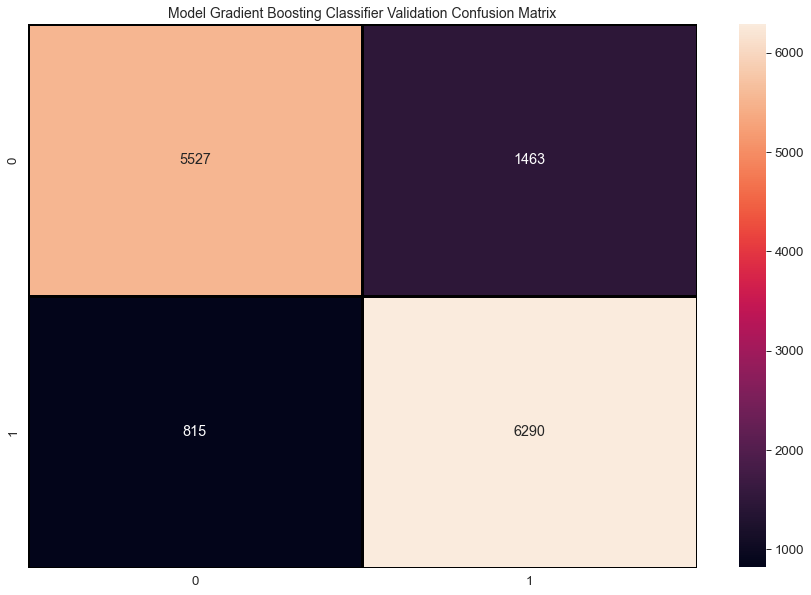

In [88]:
print('Model Gradient Boosting Classifier Validation Classification Report:\n ', classification_report(y_test, gb_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, gb_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Gradient Boosting Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Histogram-based Gradient Boosting Classification Tree

Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:
                precision    recall  f1-score   support

           0      0.852     0.765     0.806      6990
           1      0.790     0.869     0.828      7105

    accuracy                          0.818     14095
   macro avg      0.821     0.817     0.817     14095
weighted avg      0.821     0.818     0.817     14095



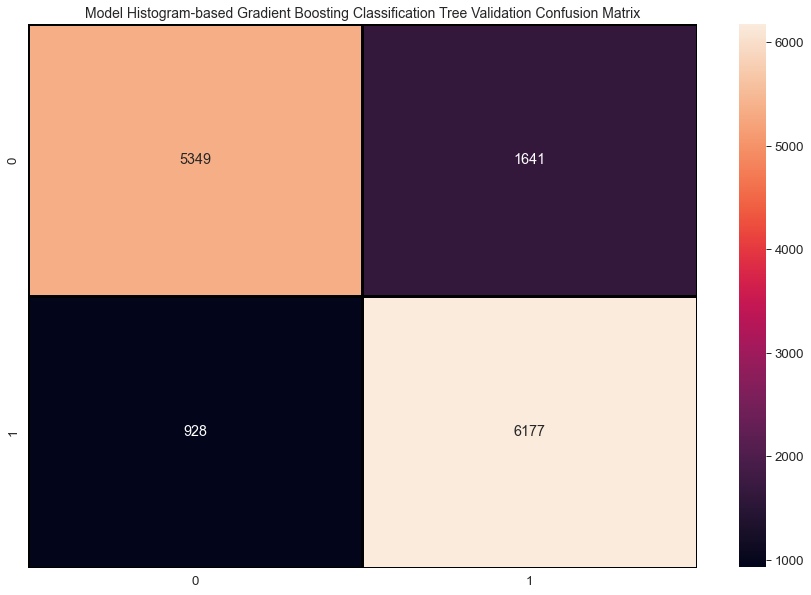

In [89]:
print('Model Histogram-based Gradient Boosting Classification Tree Validation Classification Report:\n ', classification_report(y_test, hgb_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, hgb_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Histogram-based Gradient Boosting Classification Tree Validation Confusion Matrix",fontsize=14)
plt.show()

#### AdaBoost Classifier

Model AdaBoost Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.841     0.710     0.770      6990
           1      0.753     0.868     0.806      7105

    accuracy                          0.790     14095
   macro avg      0.797     0.789     0.788     14095
weighted avg      0.797     0.790     0.788     14095



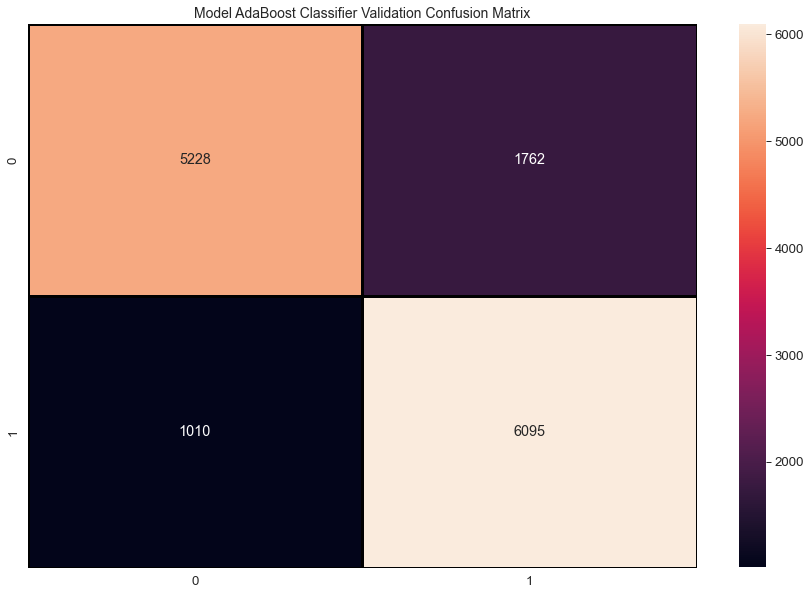

In [90]:
print('Model AdaBoost Classifier Validation Classification Report:\n ', classification_report(y_test, ad_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, ad_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model AdaBoost Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Extra Trees Classifier

Model Extra Trees Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.927     0.567     0.703      6990
           1      0.692     0.956     0.803      7105

    accuracy                          0.763     14095
   macro avg      0.810     0.762     0.753     14095
weighted avg      0.809     0.763     0.754     14095



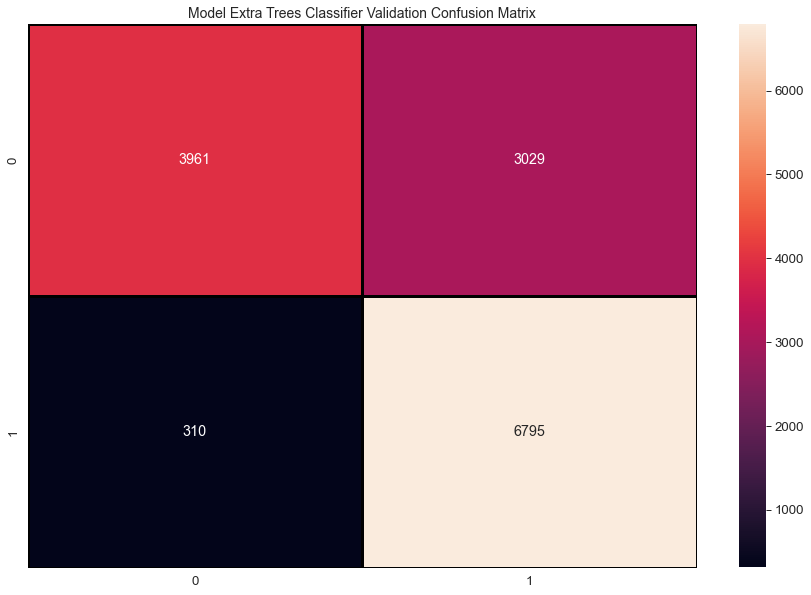

In [91]:
print('Model Extra Trees Classifier Validation Classification Report:\n ', classification_report(y_test, et_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, et_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Extra Trees Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Decision Tree Classifier

Model Decision Tree Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.791     0.811     0.801      6990
           1      0.809     0.789     0.799      7105

    accuracy                          0.800     14095
   macro avg      0.800     0.800     0.800     14095
weighted avg      0.800     0.800     0.800     14095



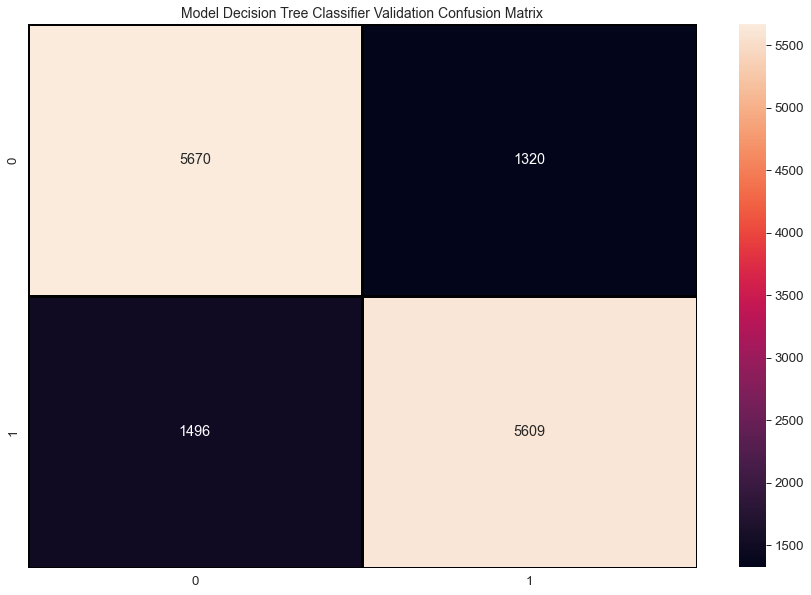

In [92]:
print('Model Decision Tree Classifier Validation Classification Report:\n ', classification_report(y_test, dt_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, dt_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Decision Tree Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Logistic Regression Classifier

Model Logistic Regression Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.870     0.615     0.721      6990
           1      0.706     0.910     0.795      7105

    accuracy                          0.764     14095
   macro avg      0.788     0.762     0.758     14095
weighted avg      0.788     0.764     0.758     14095



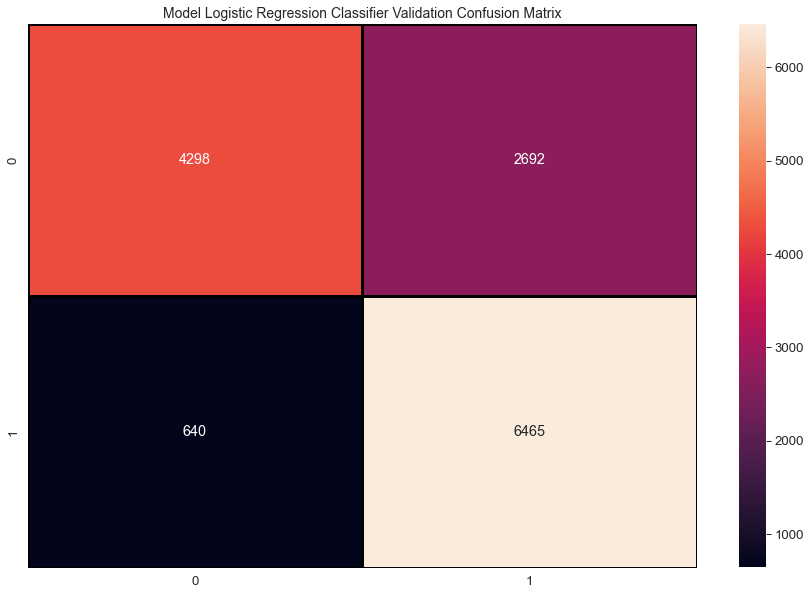

In [93]:
print('Model Logistic Regression Classifier Validation Classification Report:\n ', classification_report(y_test, lg_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lg_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Logistic Regression Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Stochastic Gradient Descent Classifier

Model Stochastic Gradient Descent Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.852     0.632     0.726      6990
           1      0.711     0.892     0.792      7105

    accuracy                          0.763     14095
   macro avg      0.782     0.762     0.759     14095
weighted avg      0.781     0.763     0.759     14095



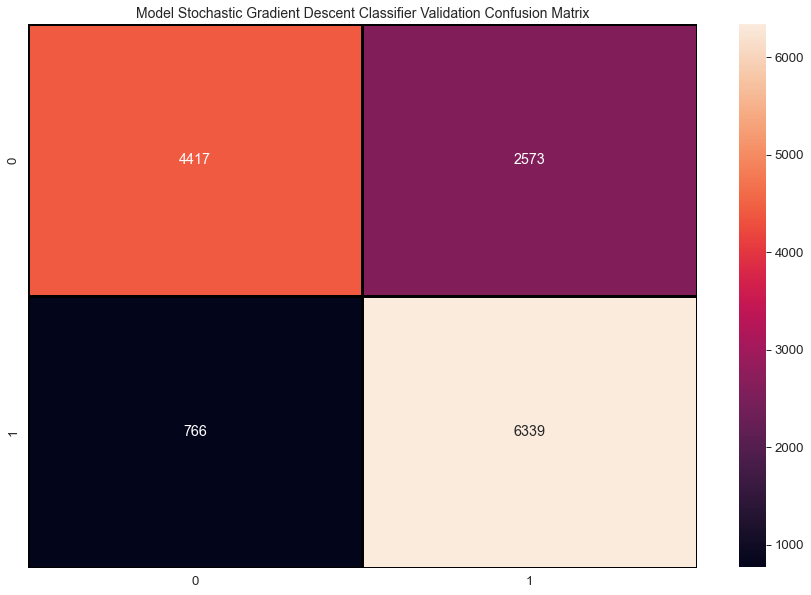

In [94]:
print('Model Stochastic Gradient Descent Classifier Validation Classification Report:\n ', classification_report(y_test, sgdc_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, sgdc_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Stochastic Gradient Descent Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

##### Linear Perceptron Classifier

Model Linear Perceptron Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.792     0.625     0.699      6990
           1      0.695     0.838     0.760      7105

    accuracy                          0.733     14095
   macro avg      0.743     0.732     0.729     14095
weighted avg      0.743     0.733     0.730     14095



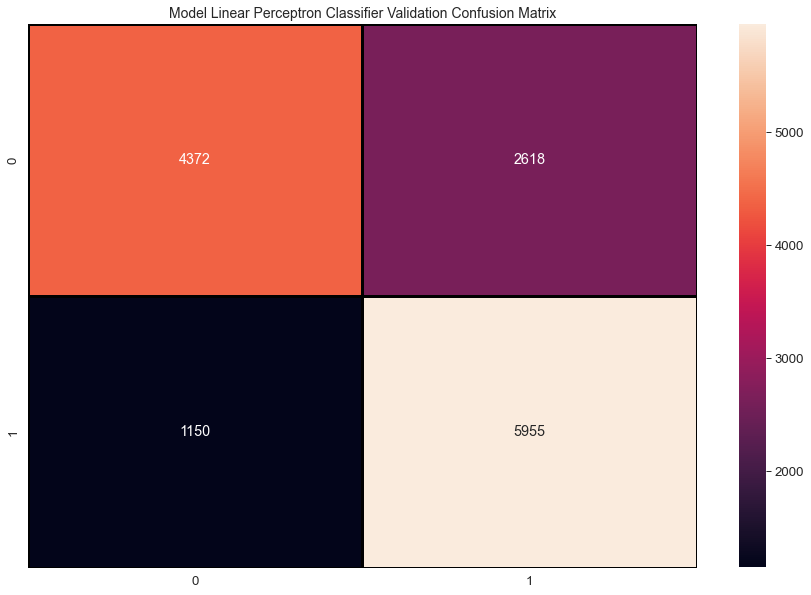

In [95]:
print('Model Linear Perceptron Classifier Validation Classification Report:\n ', classification_report(y_test, lpc_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, lpc_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Linear Perceptron Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

#### Support Vector Machines Classifier

Model Support Vector Machines Classifier Validation Classification Report:
                precision    recall  f1-score   support

           0      0.697     0.601     0.645      6990
           1      0.654     0.742     0.695      7105

    accuracy                          0.672     14095
   macro avg      0.675     0.672     0.670     14095
weighted avg      0.675     0.672     0.671     14095



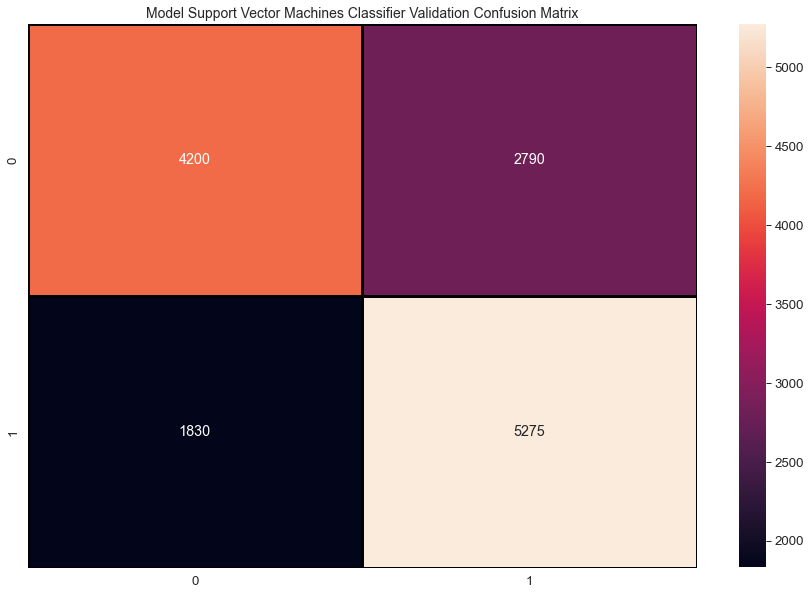

In [96]:
print('Model Support Vector Machines Classifier Validation Classification Report:\n ', classification_report(y_test, svm_op_m_1_pred_vaild_cpu, digits = 3))

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, svm_op_m_1_pred_vaild_cpu),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Model Support Vector Machines Classifier Validation Confusion Matrix",fontsize=14)
plt.show()

# 16. Accuracy Score Summary  

## Standered Machien Learning Models 

### Predication Using CPU

In [97]:
print(tabulate(cpu_ml_m_1_valid_compare.sort_values(by="Standered CPU Models Accuracy", ascending=False), headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------+---------------------------------+
|    | Standered CPU Models                                  |   Standered CPU Models Accuracy |
|----+-------------------------------------------------------+---------------------------------|
|  0 | Random Forest Classifier                              |                        0.872366 |
|  4 | Extra Trees Classifier                                |                        0.872366 |
| 13 | XGBoost Classifiers                                   |                        0.823058 |
|  8 | Decision Tree Classifier                              |                        0.819156 |
|  2 | Histogram-based Gradient Boosting Classification Tree |                        0.815892 |
|  1 | Gradient Boosting Classifier                          |                        0.798226 |
|  5 | K Neighbors Classifier                                |                        0.793686 |
| 16 | Multilayer Perceptron C

In [98]:
fig = px.bar(cpu_ml_m_1_valid_compare.sort_values(by="Standered CPU Models Accuracy", ascending= True ), x = "Standered CPU Models Accuracy", y = "Standered CPU Models", title = "Model Machines Learning CPU Validation Accuracy")
fig.show()

## Machine Learning Optmization Models

### Predication Using CPU

In [99]:
print(tabulate(cpu_ml_op_m_1_valid_compare.sort_values(by="Optimization CPU Models Accuracy", ascending=False), headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------+------------------------------------+
|    | Optimization CPU Models                               |   Optimization CPU Models Accuracy |
|----+-------------------------------------------------------+------------------------------------|
|  1 | Gradient Boosting Classifier                          |                           0.838382 |
|  0 | Random Forest Classifier                              |                           0.832565 |
|  2 | Histogram-based Gradient Boosting Classification Tree |                           0.817737 |
|  3 | AdaBoost Classifier                                   |                           0.803335 |
|  5 | Decision Tree Classifier                              |                           0.800213 |
|  6 | Logistic Regression Classifier                        |                           0.763604 |
|  4 | Extra Trees Classifier                                |                           0.763107 |


In [100]:
fig = px.bar(cpu_ml_op_m_1_valid_compare.sort_values(by="Optimization CPU Models Accuracy", ascending= True ), x = "Optimization CPU Models Accuracy", y = "Optimization CPU Models", title = "Model Machines Learning Optimization CPU Validation Accuracy")
fig.show()

## Compare the Machine Learning Models Accuracy 

In [101]:
cpu_ml_m_1_valid_compare = pd.DataFrame(cpu_ml_m_1_valid_compare) 

cpu_ml_op_m_1_valid_compare = pd.DataFrame(cpu_ml_op_m_1_valid_compare) 

All_ML_Accuracy_result = pd.concat([cpu_ml_m_1_valid_compare.set_index('Standered CPU Models'),
                                     cpu_ml_op_m_1_valid_compare.set_index('Optimization CPU Models')], axis=1)

All_ML_Accuracy_result = All_ML_Accuracy_result.sort_values(by="Standered CPU Models Accuracy", ascending=False)
pd.DataFrame(All_ML_Accuracy_result)

,Standered CPU Models Accuracy,Optimization CPU Models Accuracy
Random Forest Classifier,0.872,0.833
Extra Trees Classifier,0.872,0.763
XGBoost Classifiers,0.823,NaN
Decision Tree Classifier,0.819,0.800
Histogram-based Gradient Boosting Classification Tree,0.816,0.818
Gradient Boosting Classifier,0.798,0.838
K Neighbors Classifier,0.794,NaN
Multilayer Perceptron Classifier,0.790,NaN
AdaBoost Classifier,0.790,0.803
Support Vector Machines Classifiers,0.777,0.672
